API KEY: ae89b22675ec02f644309a2de249121f

Install the "tmdbsimple" package: https://pypi.python.org/pypi/tmdbsimple

        `pip install tmdbsimple`
        
tmdbsimple is a wrapper for the TMDB API, providing python functions that perform some of the basic API requests. 

In [207]:
import tmdbsimple as tmdb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib2
import imdb
import time
import numpy as np
%matplotlib inline

In [2]:
tmdb.API_KEY = 'ae89b22675ec02f644309a2de249121f'

# Search for a movie, get its genre and poster

In [65]:
# Search for a movie by its title
search = tmdb.Search()
response = search.movie(query='The Princess Bride')
s = search.results[0]

ia = imdb.IMDb()
s_result = ia.search_movie('The Princess Bride')
s2 = ia.get_movie(s_result[0].movieID)

In [66]:
# Grab info from the search result
print "TMDb info for " + "The Princess Bride - ID:", s['id'], ", Genre IDs:", s['genre_ids']
print "IMDb info for " + "The Princess Bride - ID:", s_result[0].movieID

TMDb info for The Princess Bride - ID: 2493 , Genre IDs: [12, 10751, 14, 35, 10749]
IMDb info for The Princess Bride - ID: 0093779


In [68]:
# Get the genres, and the poster url
movie = tmdb.Movies(s['id']).info()
genres = movie['genres']
print [str(i["name"]) for i in genres]

poster_url = movie['poster_path']

['Adventure', 'Family', 'Fantasy', 'Comedy', 'Romance']


In [33]:
#get genres from IMDb 
[str(i) for i in s2.get('genres')]

['Adventure', 'Family', 'Fantasy', 'Romance']

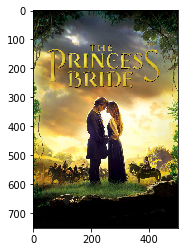

In [53]:
# Get the poster by its url and display it
img_url = 'https://image.tmdb.org/t/p/w500' + poster_url
img=plt.imread(urllib2.urlopen(img_url), format='jpeg')
plt.imshow(img)

# Get the top 10 most popular movies and their genres

In [ ]:
movies = tmdb.Movies().popular()['results']
top10 = movies[:10]

In [55]:
genres = tmdb.Genres().list()
for movie in top10:
    m = tmdb.Movies(movie['id']).info()
    genre_names = ' '.join([d['name'] for d in m['genres']])
    print movie['title'],":",genre_names

Beauty and the Beast : Fantasy Music Romance
Logan : Action Drama Science Fiction
Sing : Animation Comedy Drama Family Music
Jurassic World : Action Adventure Science Fiction Thriller
Fantastic Beasts and Where to Find Them : Adventure Action Fantasy
Finding Dory : Adventure Animation Comedy Family
Interstellar : Adventure Drama Science Fiction
Mad Max: Fury Road : Action Adventure Science Fiction Thriller
Rogue One: A Star Wars Story : Action Drama Science Fiction War
Split : Horror Thriller


# Exploratory Data Analysis

## Download sample of movies from TMDb

There are currently 450259 movie IDs in the TMDb database (some are for movies that have since been deleted though). For EDA we take a random subset of 25,000 ids and exclude the IDs that correspond to deleted movies, bringing us to 13,320 movies. Finally, we ignore any movies without corresponding IMDb data, bringing us to just shy of 10,000 movies for our sample (9969 to be exact). 

In [3]:
import multiprocessing 
import random 

In [15]:
# get movie, genre pairs from TMDb
latest_id = tmdb.Movies().latest()['id']

def worker(i):
    try:
        movie = tmdb.Movies(i).info()
    except:
        movie = ""
    return [i, movie]

ids = list(range(1,latest_id))
random.shuffle(ids)
ids = ids[1:25000] #take random sample of 25,000 IDs 

p = multiprocessing.Pool()
ans = p.map(worker,ids)

global movie_dictionary 
movie_dictionary = {}
for i in ans:
    if i[1]: #only add the non-deleted movies to movie dictionary
        movie_dictionary[i[0]] = i[1] 


In [35]:
print "Number of movies in sample:",len(movie_dictionary)

Number of movies in sample: 13320


In [104]:
#write the movie information to a file
import csv
with open('movie_dict.csv','wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in movie_dictionary.items():
        ln = [key]
        for k, v in value.items():
            ln.append(k)
            try:
                ln.append(v.encode('utf-8'))
            except:
                ln.append(v)
        writer.writerow(ln)

In [107]:
#determine movies with an IMDb equivalent and write the IMDb_id and title to one file and 
#the subset of movie information (now our "EDA movie sample") to another

with open('EDA_movies.csv','wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in movie_dictionary.items():
        if value['imdb_id']:
            writer.writerow([str(value['original_title'].encode('utf-8')),str(value['imdb_id'])])

with open('EDA_TMDb_movies.csv','wb') as csv_file2:
    writer2 = csv.writer(csv_file2)
    for key, value in movie_dictionary.items():
        ln = [key]
        for k, v in value.items():
            ln.append(k)
            try:
                ln.append(v.encode('utf-8'))
            except:
                ln.append(v)
        if value['imdb_id']:
            writer2.writerow(ln)


In [32]:
#This is for future reference so we don't need to re-request the same movie information 

#IDs we current have pulled from TMDb
current_ids = [427541, 219285, 39713, 80749, 240420, 370705, 74086, 332967, 11041, 271595, 288808, 50043, 130385, 285202, 323597, 153629, 406005, 389147, 97471, 353373, 114323, 108776, 244107, 362313, 448717, 343270, 239495, 6424, 408207, 140093, 426434, 103031, 172903, 2055, 102197, 10880, 259038, 424045, 380378, 10877, 259012, 264178, 165327, 42661, 373491, 375102, 295175, 26100, 24848, 2623, 10459, 164620, 267226, 343213, 430217, 145830, 376412, 48144, 293207, 259759, 24639, 279894, 174709, 387166, 426218, 110141, 118515, 240347, 224943, 233953, 324376, 308796, 156157, 401417, 203404, 28355, 293693, 118197, 177938, 430864, 149081, 435744, 141523, 4597, 388410, 327948, 164014, 183141, 96093, 411227, 389457, 370044, 178571, 15593, 244021, 350203, 132795, 43539, 48240, 153399, 340649, 323332, 60844, 419404, 250219, 287578, 388689, 373384, 430340, 333900, 290253, 134505, 306491, 273824, 104553, 58783, 114773, 275464, 2659, 245924, 28341, 226838, 285747, 268891, 209712, 287420, 418496, 138261, 445585, 290808, 431860, 221934, 289242, 61689, 297690, 251754, 159987, 362337, 60162, 147209, 244503, 258713, 372863, 292672, 310865, 301258, 11836, 395154, 407648, 201912, 401858, 182529, 77091, 117071, 47099, 361590, 10188, 320432, 266816, 332774, 294504, 258001, 102884, 443791, 426949, 263735, 99544, 431673, 184289, 378974, 411778, 251244, 222815, 41860, 228340, 86539, 107220, 428943, 40020, 393726, 267425, 220512, 255694, 320943, 215052, 202345, 164021, 147243, 181047, 390852, 132441, 410257, 265991, 392640, 33692, 141683, 161051, 322034, 277590, 276689, 278639, 199862, 284746, 219850, 274049, 211094, 307956, 215775, 296484, 324906, 382915, 323353, 138109, 207379, 236967, 368009, 100029, 322967, 51315, 43924, 404213, 281456, 295511, 393816, 105863, 259200, 221834, 445609, 143008, 355800, 28963, 285267, 201980, 429361, 421546, 550, 204489, 15922, 81236, 108875, 426387, 4973, 337038, 240285, 45912, 445961, 425515, 264519, 254038, 223523, 443129, 28458, 402672, 103631, 229494, 396250, 252666, 439943, 313085, 275391, 16850, 171388, 108551, 98544, 202722, 317666, 17831, 224621, 298026, 107022, 139095, 333245, 382086, 244859, 324719, 355749, 7267, 422490, 191731, 48762, 122514, 276863, 447087, 68421, 319094, 406947, 124666, 142217, 146255, 254372, 62692, 47263, 58511, 319747, 6719, 112387, 344708, 247733, 18636, 449345, 401002, 9140, 125063, 358053, 121243, 69028, 200245, 180073, 377500, 1897, 19465, 371038, 311342, 59627, 321193, 408119, 131554, 54797, 291392, 136964, 309110, 363001, 253114, 372232, 228879, 260436, 405083, 310684, 223759, 362099, 261085, 387233, 211276, 114662, 295491, 281274, 235813, 440753, 234973, 3178, 410340, 48177, 111668, 343336, 241184, 329703, 64004, 291487, 225408, 188114, 15377, 13084, 129231, 368169, 233414, 429140, 60146, 411181, 168735, 31936, 398244, 148355, 229916, 189336, 253986, 350413, 207793, 159424, 30836, 405624, 57333, 145448, 380730, 276993, 369018, 306519, 305118, 171694, 332144, 401304, 395140, 76091, 153555, 123754, 392279, 205304, 302157, 392150, 50612, 4775, 449311, 69979, 160348, 121599, 231785, 9093, 424336, 1370, 239098, 153016, 368332, 148079, 229901, 95075, 306202, 243623, 115123, 291080, 306012, 171263, 365017, 238598, 342376, 412431, 424403, 184144, 215849, 7684, 92602, 390219, 286693, 47875, 211748, 95819, 329468, 333182, 169070, 395995, 259908, 34646, 181196, 269812, 139547, 244126, 153995, 340969, 216257, 90911, 424936, 166019, 299557, 332257, 293044, 223168, 175356, 40878, 85858, 94801, 148501, 335927, 26016, 60429, 58084, 167880, 99323, 47822, 40001, 3024, 100982, 81537, 174818, 124266, 149119, 309696, 443316, 384869, 383874, 339463, 124753, 424876, 181177, 412604, 418992, 365102, 208909, 198935, 125100, 139146, 422824, 2672, 75593, 357194, 166329, 91867, 13141, 158029, 179605, 216622, 219394, 247602, 301861, 376339, 342528, 282999, 206941, 2366, 14692, 155695, 281500, 167609, 209957, 225183, 373520, 412806, 373831, 12951, 286255, 321360, 123779, 294295, 115799, 115738, 108957, 261517, 154658, 367761, 179300, 449141, 405637, 433336, 62330, 49360, 52860, 378389, 14434, 250752, 16454, 185851, 98357, 325665, 291602, 265255, 166286, 81122, 59341, 305054, 55194, 75963, 341477, 258109, 143938, 375494, 310457, 107934, 27600, 360565, 37754, 329718, 444528, 85682, 183, 63515, 345560, 89393, 194707, 309972, 105134, 98679, 294611, 68650, 385004, 281167, 267544, 402548, 99727, 113348, 81166, 430079, 116126, 243834, 277272, 333928, 388197, 292029, 19185, 377817, 436158, 76398, 385570, 88423, 128086, 35061, 14953, 281424, 433793, 2356, 4240, 87387, 257181, 84466, 165226, 438950, 64969, 247991, 29358, 233552, 89874, 334601, 81297, 139015, 117584, 394450, 431641, 158943, 339837, 312371, 321121, 230725, 171977, 123368, 67585, 69680, 28397, 66815, 149389, 420127, 389393, 347475, 288460, 273799, 262778, 58172, 186500, 135982, 356176, 199342, 138881, 321482, 218866, 285294, 245137, 209325, 391335, 274906, 89549, 213205, 247851, 326354, 329615, 106340, 325268, 16944, 223372, 329414, 45734, 363365, 229671, 329574, 345175, 205086, 103748, 91400, 205437, 398771, 159910, 110828, 16, 411063, 244395, 238085, 196443, 175904, 103004, 156448, 387485, 354238, 397202, 183574, 196802, 143080, 61640, 119920, 153834, 327459, 449907, 204499, 333775, 124108, 193836, 441877, 174376, 351017, 412531, 320679, 441150, 82435, 399286, 307804, 98816, 45626, 21572, 91250, 188665, 268782, 364507, 30116, 234610, 267454, 109633, 28053, 410235, 355816, 77544, 409859, 170556, 213384, 393717, 342519, 77487, 234757, 67000, 107137, 155937, 75832, 43953, 382717, 354667, 273076, 202658, 5819, 382117, 353785, 239702, 92462, 95571, 130564, 137205, 334775, 357458, 423386, 442404, 219928, 64177, 79571, 355131, 248258, 415500, 402082, 96716, 255697, 183186, 75270, 90822, 145359, 429810, 314081, 425583, 63615, 84695, 111528, 94510, 367867, 155350, 15493, 186695, 324616, 178553, 209303, 90225, 373364, 114494, 258946, 313560, 308083, 263917, 212000, 341373, 317089, 105580, 101015, 55130, 46467, 185680, 188531, 76734, 83326, 173967, 264940, 199006, 21359, 376760, 316800, 332916, 314001, 435901, 175414, 395733, 303392, 208702, 96424, 46153, 96343, 253954, 104989, 12950, 406825, 400013, 17340, 59921, 314177, 275019, 48492, 196082, 152481, 148929, 430854, 128377, 185712, 438032, 125014, 424989, 168938, 323290, 420307, 373751, 192895, 37413, 357815, 304588, 59389, 145671, 205392, 10605, 347411, 383107, 203303, 284943, 368361, 385946, 366365, 432675, 121523, 294935, 179776, 361366, 354740, 351716, 91367, 245826, 134843, 338556, 38802, 316829, 236374, 420938, 332481, 50272, 179897, 295776, 191033, 5686, 411480, 167493, 377193, 230806, 21396, 377494, 287230, 228131, 262915, 324354, 446285, 134354, 50306, 24259, 249028, 173206, 378512, 344514, 384117, 218432, 228433, 131829, 326029, 264478, 417691, 369246, 69259, 318459, 214535, 188893, 424561, 116186, 18289, 357990, 77119, 401107, 44610, 3324, 134371, 316300, 310414, 154652, 42286, 245404, 342430, 410578, 144488, 266107, 225646, 339600, 315527, 285198, 98824, 324890, 266487, 182099, 193292, 261414, 316760, 72293, 314588, 438317, 321439, 384406, 83542, 58524, 109732, 126030, 329843, 295098, 96570, 324366, 381201, 370240, 108883, 257253, 69301, 406599, 317410, 250435, 254306, 221262, 365022, 411218, 421875, 39281, 44149, 333542, 144383, 103737, 62634, 171575, 277756, 267146, 116666, 140566, 13949, 102154, 431384, 309782, 213851, 229476, 445036, 230590, 152783, 246634, 292600, 170981, 380551, 389253, 20892, 238999, 395157, 72718, 356160, 186709, 189255, 72176, 22451, 38242, 144150, 352887, 75770, 319324, 36650, 203485, 80494, 368537, 139556, 449953, 221550, 225622, 120428, 119327, 198638, 407820, 82707, 274716, 50937, 97645, 128105, 335906, 152878, 308593, 232384, 269116, 389042, 120960, 409648, 137775, 298988, 262185, 49164, 165613, 419304, 324227, 410210, 167208, 104352, 195340, 404382, 195300, 371092, 301156, 85182, 304221, 136287, 320107, 94022, 382962, 207378, 358528, 393823, 33532, 357738, 352540, 296958, 139320, 252822, 171972, 82427, 158036, 445146, 414059, 430657, 80926, 148828, 93179, 268949, 435235, 450107, 255888, 145624, 236412, 87535, 388310, 113930, 119643, 113235, 164684, 60418, 37945, 379454, 1971, 5373, 367859, 149362, 298045, 269865, 22077, 341149, 316098, 256506, 430807, 427133, 125477, 132146, 364039, 32762, 39885, 247807, 78314, 351486, 15575, 388264, 282089, 263530, 420672, 171420, 351818, 197435, 12428, 149922, 60189, 389970, 44071, 208759, 32902, 431947, 417971, 95213, 359383, 414755, 112882, 123732, 445245, 419325, 218855, 362864, 176732, 88464, 232339, 248543, 77272, 17981, 206668, 58341, 233180, 314822, 83129, 311140, 69548, 169114, 76523, 62365, 183746, 97050, 119592, 347929, 241728, 293950, 16582, 335688, 102823, 449075, 294858, 349263, 429547, 270282, 134292, 332515, 76257, 363215, 424040, 256962, 233302, 327765, 57063, 108513, 142145, 411102, 239742, 123035, 232421, 86780, 44518, 134147, 12478, 103656, 271984, 392942, 1662, 337895, 104232, 321163, 181449, 118676, 443817, 16237, 344606, 54215, 99762, 344320, 283787, 435843, 1212, 210661, 53568, 50752, 59844, 265883, 441198, 328126, 97472, 46627, 303720, 95408, 289965, 359577, 139115, 399961, 71781, 385667, 324503, 104353, 6835, 339371, 10897, 87358, 367993, 90711, 136620, 187192, 257238, 344378, 122512, 15296, 53891, 188472, 381575, 110021, 427058, 430410, 288270, 313941, 51249, 74034, 378284, 254627, 127, 394430, 396288, 329653, 297289, 264133, 122894, 369484, 368181, 219313, 378856, 324729, 184854, 113785, 145618, 123828, 109982, 283159, 284430, 257401, 220209, 322443, 362227, 374402, 82201, 284155, 23025, 80651, 397139, 431205, 386547, 442323, 305555, 403388, 148582, 333744, 350256, 413214, 275172, 377941, 272318, 332720, 410720, 387938, 103646, 289738, 281485, 330178, 358525, 40181, 337697, 178026, 207332, 206236, 129631, 436684, 117579, 61590, 404328, 13455, 388131, 434267, 255788, 179972, 83768, 139021, 351678, 392206, 106443, 222233, 265820, 197605, 357939, 214275, 236006, 261088, 159408, 214447, 210676, 95742, 318744, 274137, 313974, 95309, 161734, 44668, 122381, 414091, 89035, 333602, 270085, 279980, 65081, 287873, 420901, 253569, 278087, 175290, 272463, 138753, 317380, 196374, 163364, 330514, 381836, 43564, 223823, 246683, 411644, 241622, 156723, 450221, 146515, 344925, 445682, 440644, 167567, 382139, 331799, 62564, 223762, 41922, 322813, 72430, 272518, 339479, 115758, 343311, 121845, 332490, 122511, 277319, 422992, 89533, 380604, 382095, 121666, 407672, 42413, 275317, 134947, 24183, 450115, 33219, 292595, 36428, 60033, 185076, 311414, 172630, 162838, 292192, 18247, 267043, 356492, 420461, 386438, 177598, 381104, 241165, 443143, 65505, 258807, 343263, 375939, 372500, 169660, 405316, 148040, 156579, 128176, 227476, 66477, 193813, 70142, 292375, 70613, 246397, 242975, 404746, 255060, 435848, 79342, 92071, 107625, 389115, 249390, 362573, 236818, 187858, 108281, 446423, 364474, 272192, 217743, 152046, 429520, 76186, 34301, 290407, 123592, 2047, 15048, 200238, 291962, 278617, 244453, 200333, 294178, 358091, 46701, 31401, 243138, 297125, 351591, 262391, 182711, 322648, 19817, 432735, 390928, 41827, 400153, 299252, 227393, 98279, 321045, 91510, 359230, 291023, 96565, 45067, 130347, 134484, 352424, 146445, 14426, 396631, 202779, 305280, 226532, 261739, 107678, 155766, 372649, 36015, 227462, 16690, 92254, 311043, 45615, 363843, 271807, 175715, 56514, 107510, 253614, 111127, 448859, 446728, 289388, 153891, 244335, 355717, 123723, 214470, 85010, 44278, 417800, 429593, 283882, 159677, 85979, 29074, 228558, 4788, 282076, 252986, 286127, 255261, 346390, 328122, 263322, 391352, 63043, 233138, 14405, 274655, 45094, 114478, 413490, 294222, 149419, 229046, 412097, 309977, 100397, 272189, 185926, 37882, 114394, 233912, 304975, 354523, 185889, 391828, 214602, 214001, 71840, 437159, 375810, 163537, 168106, 418791, 443505, 290532, 230921, 353001, 291039, 222571, 377785, 257271, 264845, 23508, 313260, 211774, 150901, 290470, 146395, 9125, 268736, 51283, 147800, 83890, 203754, 144446, 357689, 176442, 58851, 362523, 200576, 366374, 446470, 316762, 74963, 241170, 229408, 249972, 149455, 323643, 5423, 349012, 347059, 312455, 298811, 434459, 320307, 240127, 163208, 127914, 28893, 394759, 118348, 14985, 308224, 306207, 350350, 275527, 423709, 75142, 337016, 392958, 248390, 76452, 336383, 169681, 277809, 62115, 27343, 384523, 311515, 281101, 341007, 312213, 143747, 309905, 81382, 347095, 78620, 124772, 18463, 96062, 369305, 303600, 404019, 303913, 137015, 278017, 327582, 285711, 223899, 230189, 366092, 402231, 68482, 122017, 31136, 81505, 423969, 179818, 26985, 116045, 98068, 93406, 177970, 406710, 373893, 396647, 305424, 293496, 270668, 95916, 159716, 209221, 89778, 263635, 400687, 215294, 181060, 341502, 95814, 340142, 227805, 266263, 84996, 105975, 58335, 123298, 355956, 94877, 173156, 58548, 338532, 195837, 417722, 362469, 171103, 398124, 389777, 255093, 10543, 449637, 327688, 92360, 201187, 379073, 81067, 406391, 259030, 176573, 140245, 332147, 231678, 166979, 431138, 68126, 185301, 57342, 228754, 136952, 77640, 443779, 294123, 380170, 377807, 225058, 479, 182852, 385462, 31873, 339540, 40229, 373348, 306995, 2866, 14784, 107242, 150801, 416758, 162131, 194892, 437747, 389904, 296118, 40016, 237839, 436359, 177589, 56605, 159851, 303432, 424934, 41362, 262321, 118980, 253568, 321256, 121259, 433453, 179648, 153745, 124090, 55414, 184447, 76558, 143292, 262382, 215098, 123868, 405397, 183315, 194547, 269311, 160729, 446309, 93048, 267579, 93879, 261488, 203205, 232217, 43463, 354721, 346494, 147646, 449796, 227305, 266089, 99117, 70924, 295284, 381273, 86046, 34945, 8801, 177628, 392639, 61273, 55882, 424643, 378344, 440051, 170784, 422522, 393721, 324823, 407378, 309256, 385215, 167043, 38776, 137369, 340624, 205446, 106772, 74761, 447197, 332194, 320658, 370182, 1160, 406375, 169337, 47690, 333227, 396293, 102535, 344764, 42039, 384301, 320706, 269077, 276129, 349492, 158156, 63080, 410364, 297146, 108638, 362482, 306291, 254846, 49012, 419869, 270245, 325879, 370430, 160804, 10412, 433204, 129194, 132562, 2033, 433983, 384839, 385169, 157847, 437519, 392808, 92598, 80262, 13144, 60677, 40182, 377375, 336373, 154227, 5388, 264201, 19661, 51741, 4170, 90861, 79113, 221676, 112150, 274253, 45984, 213461, 19159, 255751, 436702, 357681, 130898, 372095, 221031, 275255, 432503, 405215, 95030, 116013, 155016, 100694, 110517, 148892, 362631, 270934, 327020, 76468, 412766, 218348, 180348, 209693, 133732, 113535, 137302, 225701, 144068, 139713, 36986, 411171, 405831, 214647, 193206, 109898, 309154, 330705, 223156, 14890, 219953, 131306, 262386, 177271, 436617, 61107, 313156, 330354, 416493, 274133, 4913, 134711, 255608, 379615, 12018, 205025, 9491, 195127, 418505, 377991, 318037, 374908, 280855, 139209, 83088, 407179, 392412, 364211, 434760, 178594, 314003, 309157, 262080, 65350, 65798, 306148, 418709, 27039, 412428, 70575, 215780, 383403, 442378, 14038, 219988, 100199, 164410, 141861, 238057, 71554, 162066, 146459, 439439, 85042, 335916, 277754, 319157, 224141, 7473, 18900, 442098, 296171, 146484, 12745, 151818, 333947, 398449, 166074, 262230, 334322, 428043, 15409, 268871, 398522, 105294, 415585, 60839, 391327, 192351, 341004, 91018, 216653, 86018, 256525, 330974, 208193, 376878, 209885, 141279, 177490, 240507, 429872, 147616, 213113, 122720, 385984, 241430, 306545, 117319, 211420, 117596, 147096, 281380, 194454, 194099, 420451, 316610, 224352, 295325, 111870, 89810, 227948, 240418, 7021, 244405, 393363, 418703, 76177, 24058, 409474, 323426, 301973, 19607, 441588, 163374, 165690, 288609, 68788, 333586, 412880, 275749, 390378, 74142, 252564, 323575, 199257, 117960, 141039, 391785, 255219, 210825, 373043, 100212, 322275, 54078, 394443, 244348, 259497, 63726, 209026, 291153, 6911, 298930, 290610, 11512, 375254, 275744, 164454, 399428, 245184, 164536, 348681, 217437, 32956, 263509, 120168, 246607, 176866, 298596, 422614, 136185, 309711, 170925, 40013, 30703, 189705, 91941, 353927, 307509, 116763, 337743, 277332, 176793, 292180, 358067, 348901, 36330, 152640, 220320, 32288, 109495, 425370, 357231, 107415, 312619, 360990, 406041, 7798, 366187, 430331, 18530, 198635, 188036, 42, 81794, 393474, 117981, 200892, 205876, 439895, 136678, 28136, 447936, 9764, 131216, 410618, 412070, 434659, 55750, 444109, 240591, 118425, 433368, 384958, 248879, 148933, 81355, 360178, 325578, 74842, 291092, 38425, 411365, 368889, 385106, 229594, 50318, 253814, 350465, 156745, 397415, 190348, 257333, 117551, 446097, 69394, 238593, 45431, 429559, 7959, 301282, 114580, 217561, 187873, 93911, 315388, 103061, 27234, 158780, 86225, 340376, 47660, 53899, 330097, 161974, 215523, 146125, 104298, 95432, 300287, 369587, 438268, 313496, 282151, 375881, 214278, 411044, 74024, 172906, 449779, 312642, 41041, 382992, 302832, 263453, 352645, 11188, 140075, 84332, 336331, 17127, 291502, 395165, 426452, 241313, 449261, 343183, 95582, 52972, 209235, 72783, 92155, 440858, 47673, 20821, 109094, 373535, 154060, 301165, 219409, 180722, 101734, 183102, 259216, 252896, 276124, 27143, 401179, 124014, 97845, 96196, 196573, 113087, 189930, 140523, 83457, 390802, 62113, 74691, 378014, 367986, 413004, 109924, 277010, 233828, 168979, 91661, 220002, 127889, 254481, 286227, 250879, 55060, 399221, 95484, 313818, 66362, 423384, 206272, 375451, 70956, 49209, 150692, 56267, 401615, 156497, 74211, 373629, 232267, 200699, 190101, 295394, 29097, 54959, 407366, 102836, 126842, 255051, 86510, 430612, 73305, 367913, 169927, 368856, 199620, 342460, 311604, 281981, 157014, 56252, 392791, 234138, 270148, 274733, 109084, 85137, 82046, 210718, 269830, 267318, 27123, 406360, 433194, 196663, 403839, 233393, 285781, 84958, 241858, 92743, 427010, 23010, 72919, 319365, 108584, 405300, 41542, 289156, 230822, 114783, 278676, 130813, 123340, 377884, 296870, 389162, 421092, 183553, 165702, 405141, 308072, 277458, 310450, 199465, 5941, 93314, 333966, 65335, 254444, 30347, 185130, 165679, 196464, 427585, 270642, 383181, 27351, 388327, 9998, 264685, 422429, 268297, 447654, 388452, 65059, 49771, 235077, 424996, 320858, 173195, 170065, 316170, 112001, 125280, 354547, 149420, 232775, 143164, 227913, 226891, 409730, 369826, 262724, 245733, 105153, 137899, 194339, 315736, 413610, 191935, 25245, 337342, 403948, 121497, 206319, 445547, 131033, 27447, 167954, 326886, 434380, 190025, 434271, 229862, 49273, 12006, 104486, 373436, 60493, 71329, 239350, 11805, 314133, 321745, 356695, 252218, 221994, 130134, 441016, 195119, 422157, 35232, 394993, 256189, 101873, 307707, 377630, 64211, 171984, 418962, 403773, 421842, 279229, 267298, 315415, 408924, 176404, 348670, 194014, 63922, 369987, 389867, 289297, 68720, 203138, 442483, 9187, 196630, 282472, 372859, 205993, 158341, 211747, 181094, 333798, 391552, 267911, 227103, 238609, 377808, 22783, 173166, 82093, 278, 231343, 209101, 445998, 186844, 79478, 171111, 169998, 185467, 220253, 186417, 368445, 384899, 331301, 383772, 324111, 235451, 271679, 230100, 213708, 194110, 287263, 125855, 37468, 253043, 336545, 408744, 424475, 249948, 413136, 390248, 75694, 298960, 76292, 197620, 239157, 107647, 271319, 304139, 335162, 248558, 247711, 286805, 377597, 259166, 189351, 154529, 245267, 331209, 339231, 13311, 283510, 164681, 308778, 343287, 301254, 182620, 428779, 42027, 233871, 409438, 205239, 134664, 248369, 110795, 150609, 111580, 62162, 439030, 423834, 32156, 53589, 347136, 412042, 309070, 202969, 37549, 313046, 169183, 262466, 217344, 122132, 329831, 137653, 438273, 193661, 250171, 352034, 234341, 402360, 143498, 108914, 66568, 195897, 28081, 313371, 221072, 330895, 280470, 156154, 49377, 391584, 64808, 238549, 407276, 385156, 321026, 403022, 77463, 187108, 244531, 149157, 331364, 291217, 121635, 2871, 80943, 307340, 121229, 410436, 115125, 155244, 198794, 25955, 429277, 417165, 38830, 270542, 239645, 175286, 317951, 15129, 231048, 26090, 325040, 256765, 208747, 390426, 179461, 290446, 262550, 24147, 348103, 201283, 346968, 79841, 151290, 5663, 343937, 333006, 308106, 98808, 55229, 298595, 32773, 377829, 341445, 25235, 128303, 325068, 291844, 334339, 1582, 138518, 338271, 376125, 315441, 420678, 257082, 218822, 213277, 71174, 47132, 185477, 179222, 219989, 100610, 58532, 84719, 245984, 29677, 287747, 41526, 148342, 318331, 421714, 30224, 193362, 386674, 73049, 132842, 296529, 95244, 211439, 277560, 10869, 28521, 247185, 43894, 68013, 187477, 378061, 124425, 404337, 249552, 55540, 409904, 379190, 413520, 238772, 191678, 377195, 135057, 201313, 253180, 83952, 208378, 322137, 108387, 378936, 438893, 172084, 27441, 219494, 203298, 192964, 9748, 337747, 78984, 334356, 101922, 175837, 188944, 172740, 151966, 290255, 191802, 405411, 1207, 276365, 253080, 264039, 393301, 404905, 367053, 158108, 73906, 391457, 187999, 111904, 219167, 105200, 106279, 444638, 268413, 222047, 386544, 217896, 290916, 436678, 381353, 76873, 329752, 388928, 255587, 36283, 317729, 308788, 335005, 441691, 105752, 29113, 424418, 195708, 333237, 233558, 146989, 297282, 345338, 380414, 289911, 263232, 292033, 107522, 397262, 114367, 262771, 374193, 60983, 414047, 233755, 295356, 101644, 35854, 317008, 225981, 127736, 37221, 358365, 213237, 270208, 165373, 402930, 233584, 103225, 372895, 109139, 141049, 375317, 145358, 195604, 141258, 226082, 127805, 121661, 323197, 299048, 225148, 292198, 167165, 447425, 272907, 393785, 43239, 137185, 185166, 65963, 33110, 319199, 185062, 276904, 432991, 79902, 109273, 390359, 341579, 33059, 42747, 99882, 408217, 162516, 341889, 218059, 381778, 267745, 401502, 312805, 45649, 71198, 206854, 416470, 303016, 350490, 164214, 3378, 393981, 156128, 134108, 374812, 440183, 12379, 74080, 228221, 424879, 171611, 303188, 154681, 291020, 201272, 174416, 437291, 42804, 432185, 268107, 340765, 185509, 81063, 135217, 362232, 168667, 279568, 445457, 237012, 393612, 300380, 414976, 157974, 243305, 205336, 71875, 439485, 169774, 295877, 429558, 407120, 37349, 51593, 192615, 116112, 194208, 236848, 71670, 154823, 231533, 99968, 354859, 418438, 392778, 351440, 30743, 146986, 258362, 322605, 306253, 74208, 15987, 104463, 335128, 153294, 269295, 290169, 158265, 180466, 75107, 288924, 175659, 222494, 79924, 155248, 284136, 191220, 408892, 282003, 288562, 402775, 92486, 374669, 5449, 132368, 436199, 192587, 267581, 283469, 137103, 389195, 133485, 30773, 198297, 25875, 159308, 3916, 78173, 383989, 420553, 299482, 271474, 19843, 172091, 267547, 380415, 361651, 206434, 69134, 447010, 315091, 70297, 248043, 228710, 286211, 143395, 326914, 314097, 154323, 391977, 307889, 370231, 315151, 247140, 216795, 264289, 414127, 99976, 422688, 298608, 316293, 177881, 128221, 105346, 167431, 221077, 215548, 337409, 310982, 166757, 68262, 429112, 386564, 168839, 66465, 250613, 315819, 105721, 403375, 308489, 314878, 90647, 88890, 19964, 94218, 392116, 86928, 287915, 51756, 144009, 317847, 145783, 350976, 53995, 431407, 410142, 42110, 273375, 288887, 449445, 337730, 431371, 401088, 298768, 382651, 408685, 168864, 223073, 6821, 313934, 34723, 85870, 279670, 347038, 316908, 75573, 52976, 65674, 175631, 165181, 195608, 440764, 335820, 292976, 142624, 404152, 80188, 374453, 270850, 344403, 350065, 126643, 62929, 389210, 266285, 350785, 108469, 259587, 92924, 172077, 247009, 82811, 127036, 147685, 25566, 200573, 89109, 425555, 9117, 345398, 212029, 208945, 78623, 268959, 36970, 168710, 294543, 244099, 365108, 380264, 320661, 253826, 222550, 358551, 219780, 233570, 408134, 237825, 68309, 203552, 306440, 264854, 252670, 228118, 146901, 435442, 378516, 230697, 164868, 216935, 242284, 398091, 100379, 105566, 355448, 164475, 163481, 148883, 395772, 310107, 184864, 27242, 225206, 239984, 221596, 17291, 337488, 194395, 148125, 61284, 94324, 6277, 146738, 27977, 343391, 410183, 344397, 334836, 416507, 80203, 289197, 47231, 350388, 383409, 44820, 434309, 110492, 410215, 297256, 115681, 241821, 263144, 427685, 97435, 430317, 145532, 348561, 67523, 33719, 329189, 378523, 97718, 270445, 318794, 7280, 105021, 372321, 233086, 83965, 301531, 375621, 113554, 134730, 303643, 33827, 103163, 266176, 303229, 158656, 126063, 302325, 445221, 349785, 83969, 10489, 346473, 142406, 5175, 369446, 248474, 377206, 100365, 28754, 362486, 241638, 302142, 356196, 104383, 438558, 327543, 284533, 281397, 359669, 352474, 177270, 215007, 56258, 228342, 290605, 153401, 396976, 400380, 123067, 225866, 347172, 369114, 45913, 44208, 408641, 329523, 373485, 439350, 424732, 374400, 221220, 102586, 8701, 356720, 301548, 328026, 366658, 91923, 407128, 425027, 251672, 4845, 367141, 391121, 417561, 142588, 178286, 57955, 147298, 319361, 101545, 362210, 183727, 240010, 115003, 192207, 346198, 194475, 284554, 30311, 40541, 441525, 186614, 262720, 248725, 268889, 145875, 94262, 202677, 151472, 363377, 111231, 421871, 12333, 447288, 260203, 133109, 109214, 112880, 52293, 75323, 152611, 358256, 363045, 113129, 160601, 303710, 68175, 145919, 232769, 110507, 420779, 89207, 100789, 362314, 303857, 139070, 433736, 442915, 444150, 402159, 92305, 376013, 296639, 338984, 244548, 290038, 267309, 327679, 337538, 200308, 158713, 107526, 275048, 147803, 322347, 149931, 65839, 80535, 124390, 109474, 270702, 241233, 371275, 40418, 120212, 190390, 138948, 229525, 23743, 372739, 231686, 63736, 325819, 249180, 164865, 111747, 58280, 98492, 60770, 33487, 45634, 288378, 179965, 102523, 154459, 318377, 194624, 430655, 344627, 165831, 439056, 362733, 351736, 366354, 149117, 81717, 240766, 9928, 129073, 355539, 107143, 7192, 349546, 20706, 176264, 1335, 208224, 283074, 155428, 213983, 425129, 350784, 250248, 339357, 275916, 197327, 158523, 216020, 325870, 315377, 276360, 420417, 331030, 391507, 261784, 158894, 105053, 357870, 266434, 54800, 331281, 26367, 450172, 216472, 169754, 83826, 223032, 16473, 257159, 296281, 133028, 74053, 398438, 1710, 308592, 331989, 316296, 50341, 175942, 373528, 144846, 33938, 329056, 196244, 127708, 162547, 376688, 220409, 151355, 302091, 390, 286098, 119973, 428988, 350983, 118006, 257258, 159732, 115612, 13979, 6296, 419954, 270676, 406949, 40733, 196340, 188738, 190541, 363036, 413360, 183998, 24380, 432433, 439060, 269933, 129456, 351074, 410000, 99508, 119225, 322355, 299992, 208831, 155643, 375237, 263375, 149024, 378219, 54019, 170875, 439840, 406830, 19567, 368055, 326068, 366593, 338032, 32926, 312537, 386951, 302967, 73673, 84567, 113913, 433486, 42750, 175098, 89367, 166618, 258146, 446268, 432319, 285958, 381772, 240436, 129535, 188616, 236835, 200162, 154863, 102036, 128163, 361905, 81931, 257857, 128258, 287231, 313019, 272292, 246179, 366673, 151335, 67036, 319027, 384394, 178051, 262366, 17018, 265267, 198154, 130642, 134968, 196623, 440073, 170600, 55116, 82470, 127753, 51378, 45190, 145656, 194548, 219828, 174210, 393078, 441429, 386705, 370596, 387324, 316028, 46053, 411228, 242920, 68847, 293141, 34638, 324673, 97122, 430176, 156038, 383450, 297194, 230998, 72780, 320045, 160782, 152579, 141971, 355976, 101445, 347650, 134332, 102558, 428015, 370610, 402048, 12934, 405154, 200809, 341030, 367652, 330340, 120749, 447318, 135684, 419150, 60720, 348826, 160326, 394817, 72455, 378737, 119491, 45432, 254180, 76137, 171753, 90688, 227181, 192439, 299448, 227326, 427224, 199344, 242273, 394801, 95897, 154119, 17499, 392761, 97505, 330105, 406706, 312965, 307400, 229060, 420445, 161028, 136606, 145590, 210007, 184562, 339579, 263897, 181506, 45143, 83411, 363713, 241090, 407783, 87403, 130464, 131668, 1790, 124176, 98904, 2786, 121556, 317702, 160504, 431522, 273582, 294555, 104968, 286461, 366761, 446658, 309308, 168784, 279247, 254374, 318314, 85544, 124814, 248577, 104109, 310537, 241535, 80009, 206159, 186531, 202899, 301757, 144086, 279978, 238147, 228387, 349356, 344640, 3258, 316482, 255782, 178337, 92905, 218523, 181042, 127316, 262592, 209225, 40260, 292890, 430457, 312858, 348398, 379335, 437850, 62139, 6249, 93714, 50954, 228077, 330358, 122717, 80958, 23965, 335847, 258142, 76598, 312246, 124277, 4096, 9621, 87743, 376132, 279584, 86583, 140153, 441515, 102452, 6852, 330526, 70314, 223068, 64007, 102048, 80881, 45061, 314035, 252693, 54433, 15730, 112712, 308776, 336722, 261281, 181593, 374738, 112719, 326845, 334852, 413817, 345910, 398971, 287787, 218107, 418400, 337563, 16926, 347618, 380086, 337526, 107963, 89022, 283631, 139255, 126746, 386149, 68351, 48178, 145646, 297175, 265423, 86381, 174856, 257782, 80738, 129954, 5785, 186397, 273091, 21257, 317530, 172638, 448332, 282668, 387514, 363573, 350634, 104891, 169221, 157163, 271942, 27221, 400121, 360710, 362301, 50131, 171270, 88645, 248163, 92966, 436018, 101350, 283857, 74366, 264981, 415421, 1693, 442754, 22146, 56311, 9783, 275604, 147389, 21035, 73376, 44355, 171168, 448033, 234289, 406332, 202666, 153141, 224081, 377881, 295581, 376900, 219229, 12257, 100107, 262156, 256464, 218941, 50637, 404315, 423334, 387668, 399995, 253380, 300309, 183748, 253386, 339749, 12027, 310811, 438147, 389813, 74355, 189024, 284366, 408621, 419490, 171870, 180874, 247182, 248382, 189495, 159741, 294563, 265067, 435649, 34299, 112198, 305085, 85647, 142527, 91834, 45355, 149915, 384497, 308344, 90273, 249760, 121962, 396523, 317259, 71193, 65284, 296526, 284290, 445334, 66898, 261077, 339269, 62928, 314912, 250087, 428394, 335379, 29522, 20114, 165285, 23257, 389827, 258906, 205918, 114148, 404483, 35796, 238173, 165724, 370968, 273959, 341657, 227811, 103080, 304464, 38501, 198981, 312410, 111678, 150598, 13973, 175152, 425113, 402550, 336563, 106889, 260543, 411645, 391662, 135981, 170021, 35588, 278934, 178657, 168984, 404955, 401272, 243612, 124648, 95217, 75479, 142707, 61955, 6219, 414051, 315652, 738, 409539, 148375, 189728, 265378, 345129, 99501, 302475, 225231, 218599, 225713, 58035, 227507, 75430, 252852, 2034, 40135, 157324, 161481, 86299, 69848, 327852, 120216, 268520, 365241, 414347, 43432, 256453, 80628, 200639, 206780, 167750, 18656, 40203, 88016, 54146, 73488, 269510, 195068, 445125, 416254, 140917, 394045, 355501, 386605, 2568, 143166, 290830, 30035, 146086, 349657, 166040, 222975, 281391, 64269, 222454, 32823, 124945, 118304, 24199, 185107, 115284, 431959, 222269, 111789, 17618, 100427, 214239, 136640, 80283, 176135, 283274, 162914, 274111, 224162, 72448, 327728, 362595, 360277, 421722, 297187, 359009, 277812, 155879, 42357, 190819, 89438, 3829, 136746, 187225, 74818, 89588, 400418, 6220, 438017, 325120, 336211, 357507, 159412, 447232, 142263, 439702, 260559, 206099, 251888, 248532, 61829, 173034, 269836, 382498, 429016, 280048, 423754, 298322, 175197, 149445, 388908, 126286, 152600, 401017, 217343, 415944, 87584, 265391, 47532, 132908, 67991, 104933, 146692, 106358, 239227, 114047, 154221, 126522, 276477, 372253, 449768, 287999, 138884, 156080, 318058, 287988, 374120, 67318, 433364, 403918, 155104, 171700, 412152, 10688, 157459, 420433, 190279, 231123, 310118, 207497, 65169, 283502, 211287, 164975, 378751, 288813, 53762, 243208, 336938, 220187, 282698, 101494, 196039, 294126, 372861, 404544, 156355, 144114, 200022, 289955, 443229, 47753, 111636, 385058, 318145, 240673, 140563, 96676, 130111, 30186, 132714, 242319, 443451, 92243, 179732, 435827, 407653, 310466, 409430, 81966, 258101, 272644, 124776, 412495, 370292, 421800, 392332, 192932, 253288, 354036, 163429, 429057, 229006, 431619, 398376, 138619, 436186, 41568, 335143, 125183, 142447, 391450, 377919, 65211, 211549, 293664, 136819, 291127, 8476, 368393, 89358, 383455, 426312, 235528, 206730, 8463, 100645, 375318, 372858, 316785, 216119, 265557, 121048, 117878, 115410, 222889, 235578, 138916, 40200, 200299, 122203, 277201, 138001, 94046, 307324, 255775, 172948, 260346, 187241, 449336, 205309, 117293, 110082, 132390, 156288, 145551, 278251, 304987, 261424, 305962, 169043, 19782, 350638, 171149, 218086, 9405, 390045, 257467, 372778, 238224, 262697, 428749, 168670, 109210, 273604, 388367, 332186, 75644, 77051, 267441, 56319, 223111, 397373, 287808, 162195, 132912, 215891, 272747, 25879, 71854, 195181, 304690, 305865, 80750, 203096, 381968, 262558, 66750, 392802, 62308, 159713, 310207, 363495, 133358, 61533, 354407, 188024, 413729, 317299, 83835, 30650, 275180, 143602, 101313, 369110, 368665, 278620, 5272, 134236, 445953, 252022, 249295, 22152, 43512, 379905, 20206, 423913, 57951, 103276, 117887, 45662, 298812, 399160, 441777, 314724, 240308, 242970, 383122, 416382, 192862, 197287, 91046, 233511, 64995, 242995, 265799, 309021, 249043, 320877, 417237, 351016, 111918, 142484, 160407, 297818, 38507, 291572, 371998, 249462, 56118, 234988, 202870, 126119, 449567, 138408, 369900, 255294, 346502, 79780, 88537, 9604, 27235, 397717, 412984, 84816, 443236, 253264, 221450, 9225, 291296, 323248, 366726, 136061, 60667, 314277, 429866, 355019, 394169, 239746, 221794, 358827, 228513, 244233, 443107, 364427, 353208, 247926, 139964, 242315, 98448, 402593, 429004, 88712, 245384, 312574, 441811, 287286, 74369, 180561, 448763, 433415, 423713, 384283, 401384, 422290, 372471, 218622, 174621, 37027, 7311, 122791, 196337, 157280, 336934, 246453, 52464, 63612, 127407, 170226, 55486, 189662, 42772, 325465, 192651, 337732, 380063, 28138, 417235, 250717, 83553, 407858, 30706, 140678, 434169, 151531, 101420, 127960, 118975, 357824, 350556, 232904, 104888, 81507, 62976, 176118, 269870, 72628, 441687, 37729, 280687, 122080, 417692, 157424, 58099, 447294, 131241, 195543, 280922, 371588, 252269, 323647, 152546, 439088, 307849, 163915, 48424, 103339, 446901, 344941, 139347, 329147, 184360, 376582, 98333, 125748, 215472, 142247, 89857, 75473, 8109, 144014, 283307, 103047, 92809, 83331, 98834, 19292, 168554, 52115, 37361, 132336, 232272, 318221, 148625, 232332, 25055, 349187, 332283, 244493, 331565, 121292, 348671, 175006, 395724, 71734, 251626, 274260, 112358, 229072, 69203, 389066, 386563, 286916, 440368, 408861, 328818, 333961, 51126, 349917, 266327, 290439, 74382, 303064, 72598, 355073, 427306, 185995, 280280, 95796, 268025, 70661, 401348, 67240, 347159, 359513, 243199, 18239, 328483, 39507, 317240, 124154, 168381, 420227, 198427, 259589, 213231, 298634, 269897, 123571, 49186, 309547, 332956, 251414, 272954, 436300, 372676, 380823, 382162, 264821, 129085, 355038, 162725, 201953, 292186, 356426, 275137, 348957, 292424, 55614, 253150, 58242, 46229, 229610, 20996, 405987, 293485, 214255, 370833, 37153, 272951, 41103, 160558, 378738, 244726, 283891, 6761, 48112, 96309, 341080, 65993, 119356, 82832, 417364, 142634, 48478, 287044, 98309, 93974, 248605, 299249, 101487, 377584, 435752, 289076, 306667, 377940, 269079, 395615, 415598, 84167, 303155, 70819, 357146, 14033, 160747, 436591, 284577, 276642, 144837, 34471, 41031, 59747, 356824, 194486, 61772, 308249, 358779, 38934, 276209, 443323, 120580, 189243, 393881, 176271, 37864, 356650, 18405, 442322, 154334, 402566, 250386, 300438, 439715, 138238, 16064, 394093, 281025, 294766, 308562, 368275, 125065, 90211, 55164, 354839, 365123, 280790, 75034, 336976, 113182, 49367, 327282, 362094, 429356, 121945, 148907, 18747, 362916, 233557, 327735, 207797, 280819, 274425, 186054, 92122, 408260, 412421, 86141, 91403, 347615, 175474, 113624, 191608, 315155, 3168, 339132, 170384, 372301, 441066, 162603, 392771, 165054, 31452, 261192, 323578, 252497, 401353, 331783, 424143, 318937, 356893, 415486, 27364, 297133, 209832, 331942, 168022, 7832, 181292, 430245, 412995, 390546, 294874, 313124, 176328, 339120, 259304, 102280, 115671, 23007, 416446, 204054, 241643, 292310, 64956, 287881, 389216, 360336, 309069, 164281, 240497, 356108, 44830, 298011, 95700, 148531, 247387, 74042, 278360, 97647, 127158, 409366, 68440, 297280, 46772, 273227, 181243, 95167, 84897, 88450, 205698, 227458, 212806, 395948, 81826, 347346, 365615, 235168, 272642, 355061, 109430, 378745, 318486, 393609, 184363, 387081, 154854, 393285, 256194, 163133, 14014, 444076, 82879, 360553, 37718, 227296, 125759, 153486, 112684, 400099, 308757, 169250, 155295, 224182, 102127, 329692, 231549, 194409, 99589, 34071, 439935, 74524, 285841, 76613, 81953, 109810, 330898, 423601, 105939, 230516, 370370, 238136, 6095, 374666, 113202, 314889, 104499, 22842, 158013, 88377, 77188, 33098, 100373, 137273, 312987, 362735, 276613, 29218, 247424, 444351, 145567, 214145, 36509, 388649, 367445, 335306, 309607, 225943, 414324, 34056, 197336, 38867, 123796, 334689, 285748, 372400, 155969, 418776, 92696, 166389, 121018, 36843, 243512, 200323, 297939, 382276, 362481, 286667, 165542, 433872, 365408, 363662, 354633, 124569, 329366, 268314, 42580, 101812, 306759, 227515, 442953, 435994, 1731, 292339, 148752, 253778, 182684, 419548, 60073, 426967, 387767, 249479, 410860, 103308, 58378, 271859, 438977, 40607, 399928, 298496, 410765, 380512, 9395, 1332, 228177, 104323, 80058, 43687, 97850, 268849, 398076, 355248, 221526, 152351, 247167, 401603, 114681, 68435, 438161, 424396, 430020, 414435, 173265, 218010, 348337, 191651, 320783, 372513, 49998, 2354, 13199, 56328, 322809, 243137, 253679, 339064, 373078, 338230, 61949, 289596, 362007, 39075, 75025, 206809, 172451, 337121, 120932, 109126, 194854, 61036, 277523, 289158, 356818, 259851, 400224, 437971, 63684, 55186, 216350, 152198, 382522, 362356, 33652, 28037, 125137, 67857, 307202, 192825, 436088, 218500, 95429, 126399, 415529, 357284, 189099, 233604, 19053, 88540, 375396, 443284, 409829, 122214, 166266, 198916, 167257, 9504, 232170, 328801, 372903, 374214, 273254, 188957, 205944, 46791, 101935, 50231, 242320, 34107, 92449, 194063, 172483, 235063, 11685, 256858, 335970, 168525, 82484, 435036, 310036, 259452, 375493, 287758, 107605, 359077, 413636, 356062, 21079, 286677, 90891, 67176, 9361, 137971, 375489, 390482, 134624, 304796, 108600, 345963, 345218, 243459, 82480, 380491, 7618, 395283, 371039, 199886, 299292, 238501, 10288, 361263, 234500, 298938, 444227, 318648, 301201, 192833, 262509, 91791, 165012, 332882, 243636, 384871, 329673, 134555, 224872, 189735, 442091, 386622, 319522, 202895, 97074, 428462, 410508, 16145, 379576, 29685, 23429, 353320, 298072, 119767, 216822, 54580, 107215, 270404, 137131, 10979, 24095, 416978, 443205, 39608, 409088, 189396, 445156, 246878, 402058, 341208, 222044, 47712, 277587, 16619, 72162, 65279, 89616, 226530, 350336, 316446, 340878, 361195, 104188, 291734, 328650, 391532, 29096, 414935, 154487, 301967, 56637, 190683, 25348, 171075, 113736, 336675, 206244, 17469, 386440, 202327, 162039, 362571, 339772, 51765, 107501, 174246, 45545, 7239, 426044, 48734, 337706, 415921, 359507, 435569, 226728, 370731, 276191, 88065, 393080, 280499, 241716, 284642, 21896, 103274, 190865, 401856, 322929, 165021, 141206, 76956, 69169, 311993, 71596, 312179, 375648, 118015, 406083, 325854, 299093, 353468, 203491, 300275, 165090, 310342, 7365, 264720, 157979, 25104, 244259, 188200, 38530, 384015, 370506, 298789, 160602, 358334, 349651, 202914, 47684, 314046, 353896, 148463, 400445, 92279, 319044, 44234, 151694, 393705, 184167, 202065, 352676, 17280, 291596, 218437, 115137, 322356, 159453, 425145, 365353, 318111, 6566, 420684, 197892, 433651, 341331, 24381, 339055, 420386, 366361, 270323, 340084, 216207, 246629, 157422, 439412, 365, 412644, 59449, 171281, 116817, 153017, 320447, 229031, 228109, 281465, 268601, 82547, 398626, 59305, 297341, 167014, 175080, 394996, 140632, 389912, 312960, 119644, 135811, 57236, 124847, 259343, 19407, 230663, 353382, 31092, 442476, 212518, 282968, 211065, 365712, 68582, 403977, 416256, 10145, 12510, 4415, 45845, 276968, 444101, 41718, 27214, 198601, 329608, 425469, 205031, 30052, 316393, 146861, 183131, 188691, 217848, 140742, 376264, 242931, 165833, 220740, 183489, 426904, 50758, 249153, 160323, 330042, 210401, 123060, 373505, 336194, 27764, 263484, 48622, 269034, 127028, 200142, 283140, 72671, 192571, 364283, 175999, 322798, 389467, 122521, 442919, 17288, 164845, 93496, 391766, 448746, 92196, 274353, 7242, 24394, 396324, 131432, 51267, 244722, 279725, 443422, 436381, 241269, 332031, 124133, 278350, 448312, 129460, 449148, 313797, 435655, 438476, 125009, 251876, 247706, 249511, 69599, 438244, 423677, 115452, 151011, 130487, 239404, 32162, 139349, 348211, 16990, 335612, 269568, 215867, 364134, 373782, 425137, 75415, 135924, 355530, 37866, 309421, 369893, 410965, 202932, 107798, 273324, 270528, 234723, 398420, 270400, 82348, 365359, 212982, 141843, 199118, 6510, 179444, 210920, 74490, 37828, 280433, 328482, 157175, 141153, 401583, 442451, 220938, 306787, 249190, 172145, 395688, 344424, 351576, 249402, 379625, 188311, 189548, 189483, 179388, 105747, 298355, 26677, 362253, 269798, 154239, 183037, 358627, 185363, 422242, 36390, 150821, 61832, 200858, 297672, 82325, 307928, 251655, 4311, 361899, 67193, 271246, 268076, 114821, 433029, 429488, 208306, 25340, 65735, 182255, 175491, 184452, 58922, 397797, 166541, 22421, 100871, 305080, 82020, 445760, 341769, 245009, 2688, 7145, 214864, 420041, 301103, 177865, 101225, 158517, 329440, 77540, 143096, 162541, 11970, 265939, 389541, 233376, 32887, 15818, 431948, 271019, 142485, 161554, 190730, 85709, 73204, 364934, 384727, 15182, 170262, 149260, 249320, 98874, 111499, 427057, 312145, 224321, 111840, 121645, 155705, 56953, 414748, 174188, 303169, 398693, 421157, 417717, 367306, 40138, 265413, 156609, 285009, 93325, 246276, 259003, 103700, 209838, 159226, 403037, 179233, 356290, 101607, 258152, 119600, 338413, 284647, 294665, 259782, 211037, 283872, 332926, 182041, 119383, 9875, 77237, 366026, 55871, 315716, 362713, 115372, 338391, 209068, 151605, 426126, 150463, 4816, 166841, 329127, 307141, 246916, 6915, 83445, 144157, 179538, 51464, 68340, 27210, 446450, 317415, 213890, 81481, 372013, 86962, 442402, 33348, 306577, 167406, 93638, 291644, 376008, 47222, 66385, 245187, 362727, 33969, 154400, 184322, 183543, 342599, 331282, 152210, 17144, 126694, 12631, 117363, 83272, 6935, 140711, 334209, 112464, 77371, 382439, 396908, 107429, 277654, 304780, 241617, 313021, 378455, 170668, 449628, 154016, 448643, 228479, 25269, 279394, 402139, 256505, 82871, 92025, 2088, 426722, 112271, 216590, 72072, 48992, 357979, 271409, 227017, 361354, 50332, 68234, 145980, 327218, 212098, 443041, 132447, 263363, 158321, 45798, 370215, 11777, 153907, 307634, 413352, 349403, 208965, 352936, 312082, 401978, 148817, 254973, 395579, 127499, 418881, 450189, 424042, 299137, 301745, 84070, 328598, 448856, 281135, 431796, 240397, 174664, 368732, 335167, 142111, 336101, 27376, 418361, 262590, 140332, 321298, 161073, 418323, 326754, 13512, 444233, 144138, 158836, 42461, 290782, 110699, 106936, 142036, 142468, 175352, 331343, 332411, 364675, 244542, 343762, 183217, 12201, 27690, 242379, 446838, 322210, 315122, 432252, 323010, 273001, 134398, 250746, 223267, 232018, 71413, 430913, 231793, 213401, 36897, 3376, 373003, 432720, 154008, 236515, 223510, 125846, 44737, 157008, 138434, 258996, 360383, 215675, 348044, 147427, 125203, 29524, 89783, 345344, 110010, 424982, 280726, 381632, 48341, 393038, 414648, 211802, 110870, 90872, 110519, 10882, 137506, 311716, 170801, 431129, 170628, 265468, 362564, 415006, 137769, 136453, 437623, 440711, 418951, 316634, 289558, 203393, 134736, 139897, 396937, 40105, 351288, 445063, 351358, 47347, 71993, 263481, 85960, 317565, 438808, 285526, 56884, 71366, 360045, 215120, 275884, 135324, 222820, 205319, 160806, 339888, 66370, 51023, 5127, 71800, 146623, 279630, 12861, 66036, 81660, 26167, 425928, 438448, 176492, 70429, 396136, 403802, 132735, 244518, 67226, 427881, 149820, 440284, 387865, 64301, 241732, 308928, 6001, 359447, 176827, 173690, 80284, 424380, 420335, 61374, 400755, 381598, 26277, 126244, 281984, 18173, 231784, 166239, 42416, 193739, 219718, 287524, 115973, 326438, 145512, 381288, 84507, 296126, 39076, 180676, 284245, 192689, 373369, 357728, 417421, 85720, 403774, 193280, 82824, 397886, 169313, 11390, 223827, 194822, 352981, 329792, 32276, 315332, 423730, 264619, 346961, 409441, 181127, 158592, 170805, 437791, 242672, 199501, 440619, 393332, 131253, 424730, 171999, 3859, 449189, 25363, 36569, 437162, 60860, 7973, 201509, 263000, 105802, 66229, 383073, 294228, 219784, 156815, 285869, 109549, 62951, 13948, 275882, 372217, 73997, 49878, 441021, 219665, 423393, 371900, 40746, 80246, 1505, 413659, 87113, 225936, 138615, 313618, 139449, 329611, 222133, 2435, 140308, 16003, 405142, 120009, 140836, 412448, 45136, 132170, 227583, 297378, 329103, 301798, 180970, 373234, 309687, 3913, 320729, 118803, 375634, 99289, 110670, 54449, 307179, 440680, 81120, 246796, 295517, 57583, 255760, 23901, 74283, 370881, 177803, 359205, 327959, 283999, 393934, 127411, 77251, 367063, 72322, 341627, 94096, 83879, 152269, 145955, 306751, 250995, 71311, 396556, 221218, 290168, 264815, 266183, 337778, 166723, 354670, 42727, 318968, 180941, 358620, 433051, 226114, 283051, 411257, 16644, 393454, 239410, 252544, 7310, 95295, 175614, 174526, 303026, 349141, 257919, 409495, 286533, 236208, 143055, 219304, 59873, 399142, 16297, 440064, 251940, 123730, 269722, 363403, 190077, 284374, 140827, 126310, 13240, 197321, 267715, 233061, 97840, 289137, 288029, 29148, 371633, 159093, 78956, 117816, 281842, 236735, 388871, 111002, 20934, 213574, 35916, 81960, 322990, 435794, 252631, 46962, 169956, 36029, 62538, 231447, 312302, 289298, 237851, 150210, 272461, 295223, 439047, 281029, 63628, 288069, 286110, 326063, 411815, 56865, 253279, 33292, 346922, 181698, 99912, 368049, 286358, 275258, 327732, 274782, 222872, 210684, 102865, 413147, 332696, 365362, 125747, 11052, 262926, 92793, 50068, 180226, 354015, 220190, 135874, 426726, 145264, 219090, 178170, 328602, 138065, 172083, 279500, 412799, 381289, 201828, 222354, 130915, 306054, 199796, 282984, 83779, 295864, 64420, 149690, 382581, 63036, 117197, 30058, 275861, 208701, 370927, 60135, 194570, 206587, 440429, 261202, 83908, 128070, 391279, 95347, 38847, 227433, 304000, 318757, 103519, 102, 139205, 364431, 305509, 215273, 372559, 159577, 123211, 346490, 25667, 146647, 225218, 188682, 405454, 257843, 398110, 113947, 90983, 221757, 40747, 398590, 150351, 314342, 402188, 157667, 310740, 192856, 112609, 438357, 304154, 433244, 13090, 154575, 70908, 257625, 367128, 33778, 217069, 429048, 425767, 189252, 229911, 191339, 332582, 293019, 129188, 259392, 329330, 21018, 446080, 311605, 320711, 424664, 374227, 118088, 285828, 231115, 391590, 347007, 57653, 212049, 52749, 71196, 90256, 168300, 102332, 223603, 389024, 201102, 6598, 82952, 421716, 229524, 431291, 8870, 400421, 362850, 239787, 435929, 357083, 290311, 343734, 18822, 333395, 106675, 441229, 348784, 210746, 193294, 341003, 429313, 302016, 211540, 233385, 273175, 39028, 219086, 299595, 269134, 255252, 153748, 92466, 184578, 84456, 93061, 275775, 105974, 219558, 315379, 157294, 149716, 223959, 93578, 387209, 311603, 359825, 407924, 290085, 295433, 303324, 356743, 210928, 43378, 395180, 421649, 257246, 196748, 255077, 428588, 370701, 121333, 323344, 308696, 403287, 256830, 189935, 218545, 327028, 204699, 236339, 244007, 120436, 113903, 359911, 257109, 333365, 56410, 67109, 414031, 48486, 191969, 292495, 404532, 130524, 394490, 365148, 154580, 417915, 412868, 34117, 216636, 406483, 4389, 269946, 389175, 166951, 420517, 135320, 129189, 392589, 219998, 46518, 145821, 230727, 307964, 71799, 343588, 112172, 236496, 417148, 110924, 393145, 61128, 165071, 174609, 368145, 358386, 281995, 109820, 156471, 111928, 232025, 177320, 153301, 388269, 182690, 115461, 234765, 434597, 178413, 86164, 20601, 378685, 295544, 219655, 123980, 300300, 243255, 152335, 81059, 3949, 171459, 153134, 32256, 219685, 288416, 5112, 139605, 347967, 198298, 20416, 136939, 399982, 368956, 91616, 402956, 37243, 212050, 83795, 427981, 971, 353129, 304460, 357247, 322917, 390557, 116725, 68376, 409416, 72650, 238946, 79882, 412406, 75577, 22052, 432269, 269855, 154543, 247431, 285182, 282805, 273038, 133516, 368246, 143617, 389825, 278580, 115091, 406865, 177315, 351228, 286634, 120156, 84667, 266200, 433410, 308282, 17836, 98738, 231318, 302635, 72539, 261073, 363692, 35574, 338919, 279306, 119567, 329302, 443475, 342298, 176400, 53245, 386482, 414401, 273712, 156928, 367506, 409802, 244521, 194566, 445932, 117824, 100569, 104685, 123182, 222338, 198855, 110293, 20443, 394509, 71638, 359123, 169702, 406765, 170182, 318481, 57702, 1241, 196572, 315369, 314401, 442751, 369613, 228252, 65821, 255300, 159400, 328117, 65670, 332131, 156750, 223062, 195656, 45742, 413077, 260243, 350516, 374432, 428299, 389304, 155055, 394978, 372140, 15271, 41248, 32656, 270368, 409125, 236482, 277442, 40128, 313264, 12481, 145146, 269337, 23101, 321198, 248599, 156022, 390534, 317435, 65045, 80769, 181626, 348279, 305504, 119758, 69591, 32641, 18744, 281832, 386679, 324100, 343972, 203719, 291426, 316379, 81514, 86967, 218575, 370405, 14035, 232136, 57830, 102099, 448244, 220057, 350547, 182005, 249318, 219535, 430889, 254801, 241824, 53991, 439252, 389829, 79557, 157869, 196353, 173428, 188479, 28677, 103701, 38732, 311647, 435754, 293851, 361324, 79903, 245447, 111705, 187496, 318950, 160243, 402782, 142930, 108577, 422389, 181002, 448819, 197985, 289726, 288078, 265660, 155446, 309491, 69470, 194665, 1400, 69049, 85301, 331214, 395809, 336651, 239843, 248740, 30147, 54904, 46885, 332821, 421235, 425718, 431733, 414937, 138387, 423952, 38210, 162580, 415167, 266991, 74546, 26323, 57755, 15486, 243677, 355289, 281302, 268974, 436458, 321724, 196036, 50747, 105899, 442709, 48368, 185754, 235664, 240166, 316746, 413038, 121361, 138766, 433074, 281401, 436875, 89511, 252397, 436953, 36677, 380262, 42289, 126385, 51916, 49606, 391012, 300756, 240337, 209427, 395071, 203257, 93756, 88977, 369879, 222205, 65220, 4067, 38379, 313039, 106868, 228305, 318498, 290603, 43734, 220167, 239323, 350424, 290219, 339515, 296182, 44509, 404546, 379235, 390822, 143853, 24954, 253615, 229779, 147107, 109115, 363487, 312848, 45583, 256419, 86726, 94760, 315319, 318188, 177101, 312764, 36823, 21885, 294388, 23362, 272466, 142286, 253650, 73035, 218219, 364982, 149456, 185034, 259136, 239302, 320297, 216382, 91507, 107583, 96519, 396394, 322104, 70218, 344351, 130177, 428329, 23041, 404525, 404246, 444194, 41421, 304623, 354816, 22119, 94478, 180504, 138022, 228362, 91318, 100671, 394128, 300658, 137764, 259157, 175526, 102456, 300472, 439683, 334935, 27814, 85364, 284848, 335303, 415707, 430919, 238142, 70847, 433715, 315363, 93461, 318187, 253119, 101543, 52445, 352186, 275762, 378741, 294371, 356785, 286926, 162132, 112148, 376689, 179255, 68726, 62828, 136274, 211528, 226313, 342041, 310405, 420913, 122902, 418268, 159059, 160042, 174258, 301943, 137191, 356551, 133156, 395072, 15479, 150328, 280046, 382205, 297238, 10280, 7273, 38046, 332760, 316221, 413863, 28106, 230057, 223177, 141933, 99717, 187483, 96079, 319807, 131167, 77141, 111084, 333968, 16781, 128268, 165408, 293335, 184883, 443277, 56836, 145376, 303654, 215234, 341971, 373058, 266738, 402502, 442209, 19024, 208077, 266127, 439508, 390527, 85112, 189058, 227435, 210118, 191931, 182166, 11503, 327043, 171516, 166759, 298252, 146898, 217445, 396102, 218288, 289941, 382301, 64332, 79848, 87101, 236654, 289992, 70406, 273743, 21134, 76289, 28374, 85002, 284510, 62125, 383869, 130743, 256066, 20395, 378872, 249255, 149347, 334090, 56507, 286310, 245853, 114325, 242653, 75335, 59645, 364852, 43877, 366976, 186881, 96613, 111639, 3866, 332463, 78979, 396311, 412169, 151493, 51607, 22366, 365447, 328169, 75428, 322204, 438652, 39704, 235471, 170296, 429202, 436918, 419938, 127423, 248047, 338411, 62704, 174356, 77279, 405, 1249, 388006, 440814, 282769, 18212, 215249, 146259, 368157, 74115, 176861, 384277, 253822, 226857, 435970, 407998, 204761, 433892, 296630, 183184, 253275, 127172, 398149, 440437, 42195, 345214, 281253, 129796, 180334, 183475, 143071, 178770, 186238, 204304, 194006, 206584, 332745, 433326, 330541, 46747, 339797, 147240, 344588, 398767, 315371, 106709, 369026, 60036, 393852, 84025, 141603, 29485, 364890, 427945, 248666, 191531, 447662, 186326, 154289, 417592, 355247, 123717, 288062, 134083, 405563, 221982, 141816, 140350, 111964, 59729, 423620, 448824, 136175, 170174, 185308, 29602, 72400, 41342, 230477, 328955, 281775, 345279, 276951, 427463, 310350, 305425, 270420, 56093, 142358, 194293, 274039, 444669, 304750, 150805, 176507, 238246, 271342, 309470, 358700, 179117, 111923, 445510, 144819, 235361, 134576, 145654, 134386, 2278, 247399, 436413, 282179, 401653, 70198, 112845, 63534, 318020, 114881, 234900, 101805, 410802, 413890, 54390, 15384, 404649, 221578, 127544, 229964, 207479, 190817, 51021, 442864, 111649, 225303, 162536, 7870, 383406, 66862, 203840, 46421, 99619, 115716, 391913, 109579, 82439, 288942, 59951, 424925, 205496, 309873, 96760, 247089, 402666, 391354, 441861, 298512, 27673, 377893, 380012, 432948, 249126, 434152, 343994, 264037, 126470, 264190, 50920, 30647, 242191, 406714, 166783, 169088, 342836, 262999, 218395, 203799, 437990, 449258, 183316, 210469, 292058, 46347, 169955, 97574, 53909, 198360, 108742, 370032, 390746, 268597, 256696, 227604, 446443, 195536, 410190, 4607, 137906, 77476, 445123, 18504, 84876, 7609, 433495, 116562, 270298, 179613, 441287, 291408, 42572, 90844, 309401, 172258, 255779, 248482, 328384, 359691, 57167, 253636, 347092, 28738, 185139, 234356, 32069, 134130, 337918, 77594, 353562, 333506, 191940, 13220, 280599, 295393, 6515, 288872, 446, 56268, 26656, 175370, 406793, 247715, 24657, 271258, 255, 159590, 431434, 216820, 93665, 313963, 448404, 342983, 33150, 263013, 287293, 166173, 282109, 239492, 449049, 170928, 372478, 341651, 3047, 399095, 296848, 3600, 419162, 287009, 76372, 423430, 398652, 394178, 47296, 326439, 419192, 311874, 170832, 284200, 379539, 320722, 395908, 64461, 11703, 175441, 117357, 235242, 348131, 393878, 122319, 421492, 75206, 365226, 440892, 374527, 367849, 261428, 222875, 352668, 298362, 171138, 8758, 211220, 442640, 31507, 340170, 439808, 56538, 373731, 356596, 355445, 197798, 382235, 287184, 145564, 444458, 22880, 273052, 51224, 105199, 131032, 57224, 216774, 95909, 247601, 350812, 224108, 266520, 427218, 310912, 444112, 207156, 113921, 367788, 226045, 303712, 223949, 334960, 49982, 415468, 136609, 22680, 417559, 339664, 43434, 254100, 190312, 220039, 33181, 128999, 414882, 377298, 276215, 254985, 117614, 409855, 231057, 207745, 225525, 90678, 415899, 125096, 219569, 113957, 123816, 246869, 203941, 316085, 36554, 287192, 340538, 16422, 211614, 157886, 163945, 404206, 91962, 314726, 243641, 13739, 73939, 90004, 73258, 312376, 325038, 22279, 411002, 266221, 177047, 42255, 427082, 71597, 443704, 2224, 67302, 421399, 377575, 361190, 321922, 300091, 140083, 269372, 386976, 129407, 351780, 86729, 331501, 256541, 363721, 396780, 78628, 201706, 387953, 198291, 441583, 420720, 59313, 228911, 108682, 314529, 217160, 379351, 336, 162167, 194070, 126463, 171299, 135504, 437570, 9505, 382774, 322700, 353476, 375159, 276534, 5292, 15231, 260376, 168076, 103022, 357950, 174016, 93196, 308435, 136372, 62894, 158103, 73976, 336220, 19428, 127553, 139243, 87637, 439187, 265767, 249049, 404911, 294823, 401599, 417163, 122018, 401517, 46596, 129876, 291026, 171606, 337800, 405313, 19793, 297918, 339173, 185329, 226111, 176337, 321359, 22943, 257617, 366334, 252720, 305682, 110515, 186305, 118563, 123962, 290815, 361862, 148806, 207649, 301822, 151474, 198717, 71335, 101447, 85125, 165962, 449700, 68564, 49171, 428156, 314324, 335531, 411817, 1196, 353014, 75547, 320002, 222608, 146410, 247535, 76028, 43625, 152473, 270803, 161844, 444124, 242828, 388223, 322614, 215279, 213622, 419905, 146550, 138275, 280307, 96054, 44275, 205670, 91027, 429369, 235680, 383537, 284113, 386437, 257025, 229324, 397922, 20312, 357656, 310288, 92639, 432040, 288749, 239726, 54839, 413441, 388533, 204135, 332498, 184061, 218253, 401083, 43561, 384657, 356449, 56114, 214538, 14864, 67282, 249101, 300782, 201920, 225606, 418459, 278958, 318358, 383395, 141080, 19496, 380778, 431704, 420112, 100720, 272520, 19907, 15929, 370432, 307244, 120318, 185031, 436652, 383565, 395049, 69462, 316794, 62464, 324709, 154318, 92226, 221059, 382896, 107009, 302857, 2634, 382670, 355936, 448869, 44016, 381206, 394825, 431571, 270709, 83987, 218541, 125018, 298607, 411829, 30416, 174473, 167209, 153088, 394868, 132423, 399381, 447164, 97223, 397612, 158800, 340104, 287541, 189115, 400076, 163436, 32933, 98664, 117427, 387434, 53133, 326892, 248381, 97680, 238910, 364962, 178443, 69675, 251609, 260208, 378901, 368690, 31506, 228918, 5043, 231182, 258988, 174159, 445582, 22124, 67417, 120372, 306598, 103495, 435553, 228452, 131264, 428140, 80305, 376609, 78094, 159351, 164268, 48257, 297395, 80181, 383656, 275218, 395453, 257026, 338362, 383905, 144985, 168061, 28852, 188504, 432862, 39695, 195385, 132561, 124990, 241893, 337028, 303368, 410067, 31838, 264696, 157623, 447789, 99638, 24712, 322023, 212327, 57810, 182234, 104576, 428263, 386984, 384025, 368123, 59710, 300587, 330701, 267654, 5172, 440966, 298934, 10912, 295506, 73901, 15112, 258260, 42754, 290952, 108110, 114324, 215982, 236286, 432492, 196313, 328796, 145994, 38035, 254497, 338680, 57809, 285493, 22187, 29526, 439443, 193844, 149375, 353094, 424588, 58652, 385548, 166642, 205034, 302678, 371735, 253390, 353173, 385665, 1235, 428042, 210246, 368757, 11408, 33286, 290502, 232505, 340083, 44158, 38692, 444396, 132140, 181750, 209613, 16591, 79822, 62695, 65196, 317645, 387713, 301799, 141658, 147545, 121974, 232121, 45240, 83210, 399309, 315448, 428515, 217385, 112542, 273646, 225222, 292585, 222665, 152205, 264491, 156403, 339990, 42494, 147699, 40831, 64826, 358999, 228173, 306506, 202438, 21197, 71284, 63541, 142010, 162181, 205938, 70125, 331914, 109333, 85703, 384978, 51217, 227029, 8346, 92861, 147647, 285289, 74989, 305467, 352136, 206768, 337153, 84036, 54070, 34712, 403023, 7182, 270573, 242784, 349992, 13930, 211532, 128560, 217967, 50522, 355913, 106869, 224723, 311516, 298342, 24775, 50733, 368366, 326007, 408224, 439214, 93380, 123860, 284202, 141065, 220234, 331604, 352525, 77291, 332030, 423177, 218201, 359713, 286571, 305346, 72848, 80991, 101982, 310265, 318291, 342617, 199189, 139033, 374428, 290048, 48868, 142277, 278118, 165595, 221290, 35271, 370410, 324991, 313378, 364071, 201858, 11943, 204497, 12603, 295643, 326405, 9468, 46031, 128245, 319923, 418240, 229706, 234322, 6997, 281057, 150253, 243556, 424309, 158087, 89739, 400045, 278962, 62786, 169360, 268053, 419353, 285770, 389752, 225878, 410502, 63161, 209700, 237948, 86971, 146069, 170194, 215377, 147463, 349280, 353388, 141398, 301043, 303426, 35131, 406230, 340139, 330484, 68108, 360004, 64767, 102660, 431500, 400221, 110040, 3720, 139681, 380675, 194976, 16462, 104886, 193029, 352000, 274043, 341907, 111648, 324780, 301842, 234293, 130033, 184438, 232879, 93591, 27433, 325699, 43349, 27379, 286767, 365236, 53318, 273241, 155647, 444772, 139581, 388830, 403715, 147282, 263411, 137722, 304871, 200031, 304412, 434942, 376820, 43641, 173257, 53783, 188887, 295622, 121402, 380398, 333161, 193155, 99585, 431137, 445447, 129229, 123045, 328634, 58194, 369312, 133999, 284341, 240718, 183365, 228571, 108553, 88723, 155994, 419903, 448065, 69353, 272306, 314626, 256543, 91488, 361894, 219053, 236977, 436433, 344333, 103709, 13001, 316562, 137112, 80849, 75773, 10566, 30177, 266834, 231674, 321990, 6492, 162759, 106914, 346893, 355427, 51045, 239326, 282322, 83964, 104742, 1831, 396861, 25474, 133008, 47853, 174837, 247196, 148420, 404054, 344254, 390607, 127672, 236178, 49869, 394979, 275582, 163136, 221349, 446131, 47981, 321190, 133129, 339242, 112347, 191294, 178034, 68003, 311873, 352928, 228307, 12357, 213183, 18560, 136547, 31907, 315047, 250537, 345725, 18967, 366567, 314771, 135394, 6375, 85432, 369457, 305217, 251670, 222077, 37380, 149087, 336531, 64685, 272705, 186913, 229024, 258577, 346028, 406542, 419375, 267076, 17256, 427254, 132756, 126129, 271663, 368227, 166151, 430944, 443287, 438644, 333252, 215517, 215739, 205882, 88476, 162119, 249000, 173127, 393880, 433016, 56460, 19759, 135182, 3143, 130599, 229947, 213824, 403284, 353016, 73917, 364910, 426098, 30148, 382742, 85212, 283812, 332812, 67963, 100010, 240773, 11597, 403240, 428704, 358212, 195316, 356061, 387612, 50888, 296929, 115023, 152217, 430235, 381786, 340662, 16879, 433478, 310271, 182563, 396349, 6484, 425598, 222989, 330043, 316792, 99720, 408944, 327238, 62258, 323292, 237082, 69350, 357105, 344815, 448886, 92130, 248511, 29938, 368048, 21890, 349037, 199497, 239409, 72070, 396496, 79474, 78029, 226984, 406288, 10121, 424033, 368417, 148163, 239240, 246877, 27245, 189367, 50928, 274944, 49734, 275385, 297333, 377895, 286640, 267435, 71748, 385619, 203398, 29492, 359730, 165016, 281564, 124392, 418688, 134495, 161326, 352362, 109483, 9768, 394414, 42501, 53043, 14573, 34211, 448222, 10316, 44725, 374274, 35081, 163037, 303824, 202544, 44708, 225022, 236979, 213548, 243239, 387729, 279959, 433013, 156729, 115659, 304211, 43304, 434016, 214122, 1252, 81928, 94908, 264409, 369039, 113526, 52988, 352299, 102052, 402297, 427997, 172818, 361900, 133071, 174220, 177518, 349471, 160738, 143686, 64745, 158122, 272448, 227510, 291158, 77650, 264763, 169071, 169011, 366788, 399257, 358985, 70891, 81258, 218777, 32628, 277416, 201170, 336918, 90967, 389291, 138856, 313914, 306223, 48801, 205983, 404947, 256551, 343209, 84222, 438335, 5883, 228935, 25567, 394808, 335046, 166500, 308079, 32976, 431461, 59823, 139924, 324971, 37610, 283425, 85147, 406598, 345081, 447250, 56772, 119895, 260461, 338127, 235215, 240824, 35333, 211142, 267186, 435425, 251137, 205896, 96112, 125982, 66389, 240996, 40346, 416762, 224078, 168880, 278598, 404331, 252866, 112179, 77661, 244447, 333487, 152798, 446612, 414778, 50664, 193894, 245435, 163064, 118328, 205060, 398002, 316937, 296614, 169380, 17952, 28668, 384482, 152438, 276561, 238779, 250208, 182830, 299258, 106245, 145897, 410149, 246142, 421574, 382687, 75085, 190839, 344225, 79651, 123257, 130103, 412804, 282006, 52367, 318907, 441236, 84775, 441975, 116193, 430752, 186322, 179676, 377005, 12959, 178678, 124357, 21929, 63753, 168092, 368369, 1719, 388817, 85623, 311770, 399520, 174074, 360940, 145447, 213226, 417608, 300087, 240762, 248694, 111309, 301686, 423528, 228970, 129257, 355273, 262809, 342989, 376548, 340582, 100476, 30989, 1293, 224755, 387398, 228380, 100513, 7535, 310308, 284749, 224824, 178063, 338325, 319379, 26334, 365086, 161353, 229950, 318921, 404118, 100747, 54748, 317569, 82165, 412619, 46696, 117840, 310689, 433521, 295154, 183019, 203963, 436234, 15108, 16312, 407401, 417268, 157960, 323898, 232489, 216342, 263746, 45055, 337661, 236917, 80541, 284843, 42539, 397911, 211232, 205590, 256614, 13428, 168237, 247900, 338566, 133383, 43251, 423187, 26848, 10115, 361853, 437147, 369846, 409760, 134317, 188914, 74754, 390131, 186328, 36163, 71300, 133179, 448200, 64682, 152447, 294008, 16702, 369307, 65224, 372165, 275779, 250481, 391403, 218598, 143153, 331680, 184493, 356621, 382966, 243515, 61133, 400503, 247608, 371514, 255982, 195218, 386144, 127594, 373414, 250035, 58588, 298411, 318260, 252805, 45520, 345960, 301296, 92100, 215828, 283966, 39170, 40577, 8602, 258346, 365919, 346467, 289693, 118588, 80368, 154469, 72409, 58382, 341425, 1178, 238674, 76908, 277238, 287324, 359573, 37473, 59738, 288486, 418796, 255848, 173691, 217280, 109239, 407066, 168693, 422638, 332671, 237259, 58022, 446281, 326401, 46557, 174795, 36475, 188708, 353966, 5410, 437539, 447157, 115219, 426779, 76427, 186631, 37993, 48927, 220736, 204830, 260149, 48520, 373449, 296777, 220548, 279934, 186221, 203392, 86255, 221249, 174197, 150746, 237322, 357927, 11484, 106427, 61858, 92936, 100698, 440173, 248866, 13652, 320795, 229831, 298094, 68739, 84304, 436963, 398425, 282531, 29808, 442047, 261418, 220471, 385084, 238055, 169728, 386439, 10499, 64273, 69145, 447921, 46378, 286770, 404556, 139335, 366941, 269366, 407009, 364117, 229870, 310132, 425143, 134032, 322080, 304439, 105631, 285726, 373225, 130988, 66244, 199160, 259373, 279296, 306097, 164728, 350640, 158779, 399052, 51936, 406529, 294284, 102763, 31239, 78640, 357766, 366079, 62945, 214302, 391856, 269580, 151026, 42366, 440400, 277737, 84879, 283439, 338307, 73833, 93743, 154157, 364998, 108219, 245525, 377611, 348234, 197348, 359081, 354348, 326248, 68154, 187875, 190327, 52342, 33717, 376831, 445426, 194628, 253799, 194246, 404051, 353758, 145464, 258168, 155495, 310975, 315510, 313723, 316940, 381293, 136126, 13567, 250411, 294601, 97746, 317300, 89864, 295990, 338202, 321667, 30489, 126992, 222755, 39434, 153391, 322246, 186678, 138822, 401544, 410806, 289469, 10044, 192896, 70157, 128792, 34940, 336905, 353553, 436937, 91876, 407907, 117947, 429740, 430361, 322908, 345249, 27491, 326954, 313713, 178481, 336390, 226706, 207335, 62052, 446952, 360503, 341548, 63056, 86823, 353036, 448877, 40165, 15828, 226084, 390867, 226710, 42185, 70840, 305375, 262844, 118531, 115597, 110359, 73486, 187711, 444229, 394016, 157679, 332121, 129086, 380389, 62814, 303590, 150417, 281610, 224817, 298156, 57334, 207104, 235163, 394469, 291611, 399412, 81921, 149973, 213246, 215725, 160583, 243771, 298896, 405608, 5434, 404040, 387222, 83814, 407957, 120895, 141498, 239004, 44266, 217657, 124080, 177558, 7445, 267736, 189793, 229938, 116252, 147452, 91021, 277729, 35851, 108413, 258325, 177867, 47383, 357655, 192189, 8624, 421577, 144918, 25945, 177763, 103139, 293100, 23457, 115926, 119040, 342720, 265778, 341309, 2314, 36143, 284008, 256024, 311192, 377226, 69970, 284657, 255811, 136948, 126264, 420422, 306554, 385271, 403049, 378600, 444219, 375388, 145977, 8996, 242140, 318731, 169005, 334974, 290536, 444879, 272319, 443802, 326118, 342750, 11937, 441712, 437340, 126258, 306717, 287895, 2621, 404268, 231623, 134799, 393000, 349006, 86305, 46926, 429731, 19878, 306099, 284818, 34181, 76105, 261136, 166352, 148336, 437771, 213266, 297634, 15113, 345063, 262958, 279696, 241583, 449035, 114041, 30845, 99139, 440859, 91582, 112192, 354756, 449948, 380916, 201678, 219195, 396454, 226259, 95001, 102098, 210565, 308186, 169726, 434991, 338651, 109166, 404217, 288663, 24635, 167850, 172293, 51785, 398711, 33088, 183492, 415317, 60622, 135941, 67457, 388600, 127755, 147942, 112727, 238281, 28741, 277125, 397243, 263726, 216042, 76905, 118418, 333362, 231236, 324188, 221663, 290089, 188730, 80317, 125872, 55302, 243989, 211119, 267506, 269927, 268127, 278300, 393969, 349595, 113871, 126038, 393573, 131909, 134628, 202187, 364948, 86783, 299267, 386767, 236443, 280900, 246450, 292195, 14337, 120882, 36443, 39440, 289379, 158256, 328095, 132512, 21242, 175453, 342456, 258997, 81085, 394397, 9924, 266887, 199361, 115049, 206280, 336486, 72952, 236921, 334246, 383343, 289099, 252514, 315776, 73104, 18125, 129288, 148767, 206628, 138678, 280588, 134347, 18361, 104453, 77359, 45236, 103720, 178941, 336263, 362410, 195133, 196495, 69950, 29869, 48321, 406888, 225066, 150335, 428307, 379019, 315465, 134486, 176037, 280791, 308888, 311946, 291996, 396811, 49710, 152366, 281705, 395421, 379550, 5860, 203543, 318605, 250299, 274760, 70578, 158792, 423415, 103358, 142214, 113686, 179116, 294884, 184101, 47892, 515, 127684, 355666, 444210, 43002, 281289, 107629, 404870, 333739, 262485, 442380, 166390, 232759, 103727, 444162, 427200, 4532, 41672, 215575, 84010, 16666, 299625, 286148, 421829, 386141, 373164, 169894, 164172, 253460, 438666, 359795, 152297, 223353, 255567, 60699, 67407, 141285, 148660, 311124, 390646, 85618, 380093, 421331, 44966, 313227, 393658, 240359, 289480, 433206, 172759, 77504, 186897, 330344, 70216, 157021, 386032, 390298, 363618, 344029, 180113, 219264, 442615, 409550, 82416, 421082, 60521, 251933, 214532, 131036, 296945, 350691, 353260, 184211, 44186, 247970, 419841, 9629, 169500, 30569, 30896, 77733, 430226, 7944, 104671, 28687, 150951, 257134, 113156, 105424, 201586, 232367, 68730, 332315, 12940, 85943, 196314, 306724, 62028, 213656, 318997, 213549, 23163, 372177, 211559, 416646, 114762, 40472, 87420, 113828, 77836, 163423, 5866, 373209, 207135, 163330, 376340, 349687, 80552, 216203, 74184, 364334, 266728, 22465, 302354, 233915, 178757, 134218, 47566, 27191, 252020, 198336, 394416, 177949, 2750, 97144, 414090, 254882, 296278, 396448, 376905, 286906, 274776, 368884, 405337, 89011, 22934, 105014, 227201, 393543, 340671, 124908, 122007, 321137, 93321, 88656, 199320, 42605, 380825, 299069, 265893, 51219, 244459, 224912, 262542, 352344, 164680, 3710, 289344, 161748, 26676, 76342, 65841, 39578, 148087, 347747, 271935, 176580, 142899, 34001, 120685, 365184, 225699, 334066, 314844, 218115, 275286, 362861, 220924, 342609, 369762, 264, 211847, 154176, 274313, 68830, 125281, 149318, 246999, 384898, 106824, 419437, 348556, 318624, 128869, 66163, 164319, 436106, 246138, 127917, 430571, 82177, 103951, 97449, 85130, 347812, 209687, 48824, 164236, 310638, 171577, 392436, 441737, 388328, 308934, 213425, 220762, 288200, 201851, 33664, 198619, 71251, 391348, 55458, 697, 418327, 74229, 176322, 440418, 319320, 49364, 83159, 143387, 262123, 415884, 438991, 7505, 301241, 1491, 194382, 69731, 195810, 250637, 94873, 441323, 47348, 59223, 341586, 60179, 416901, 173892, 376798, 426759, 402120, 510, 280534, 355050, 158908, 281165, 187454, 62161, 371342, 107286, 337197, 123997, 283825, 344548, 411127, 262204, 229581, 317739, 13316, 440446, 16689, 164914, 409506, 161711, 107103, 166939, 204739, 139143, 6594, 395725, 323735, 196673, 150456, 111054, 238713, 314466, 302695, 137425, 81664, 226505, 425806, 136657, 212254, 213155, 112850, 249999, 140910, 113722, 400430, 433499, 210032, 23974, 105655, 240551, 38162, 305691, 104395, 302600, 255327, 361796, 65235, 76835, 267051, 15966, 99712, 65178, 12889, 193605, 131979, 392453, 213597, 253273, 338784, 368545, 237359, 419099, 19628, 294399, 386253, 394171, 177169, 86319, 368480, 185812, 262736, 246000, 419029, 235942, 39668, 13695, 261382, 4053, 9184, 136716, 426872, 255222, 337106, 77004, 238150, 432469, 382870, 438597, 62586, 183930, 133673, 443270, 112761, 205599, 46843, 347469, 154815, 55919, 55562, 445462, 311667, 31809, 158011, 327084, 107069, 318838, 72976, 424834, 74631, 313641, 358366, 266511, 17482, 435652, 236507, 61463, 359475, 259474, 227330, 385637, 237540, 171837, 412185, 132727, 294204, 94272, 294805, 311879, 441073, 248807, 82395, 398726, 378574, 291609, 392874, 4956, 24169, 311784, 333259, 134988, 386321, 277884, 170940, 233898, 345968, 150825, 151060, 13046, 145520, 133334, 272291, 199510, 123080, 264918, 24306, 408096, 70274, 122215, 35625, 79813, 337654, 263672, 207616, 15824, 258924, 403288, 344505, 420319, 192311, 365918, 384151, 90237, 127161, 404420, 18612, 118638, 36085, 259468, 174223, 444716, 31919, 351318, 359163, 245018, 61989, 431444, 107230, 236863, 28710, 248340, 112441, 122443, 64355, 429271, 385629, 180437, 135518, 183085, 153726, 401039, 40341, 95168, 303458, 413928, 221548, 230680, 317175, 41327, 365575, 301570, 420340, 380174, 427142, 110901, 399800, 410488, 301859, 270665, 401646, 141881, 264156, 192586, 325798, 298971, 276770, 69192, 241358, 293443, 151562, 202902, 242173, 10487, 426532, 448230, 159521, 200548, 119140, 385109, 287445, 311867, 417985, 172041, 117292, 145962, 272726, 223805, 294872, 330087, 169532, 431716, 165385, 26365, 242703, 426110, 177683, 184022, 385402, 47812, 280118, 39859, 231714, 369809, 365455, 354482, 336822, 171873, 16549, 441485, 55323, 432202, 1411, 49917, 360556, 198191, 206261, 29293, 421535, 425995, 265817, 63951, 96277, 106003, 141512, 139381, 214623, 252196, 103286, 340043, 186957, 392629, 82330, 449939, 424612, 282450, 253938, 136191, 366935, 41873, 236505, 438886, 322966, 49084, 120405, 319267, 394114, 225534, 176976, 283456, 120419, 26311, 420808, 41917, 147139, 314382, 287120, 261742, 290261, 421740, 421011, 127060, 425956, 349184, 113672, 151497, 130878, 222439, 372857, 120205, 165893, 346553, 99908, 380680, 307739, 228278, 76777, 115275, 49855, 354876, 330538, 188814, 353306, 356522, 34161, 164782, 368312, 44475, 127757, 292086, 401441, 341564, 190605, 11956, 404219, 244011, 132509, 178431, 70787, 285099, 79520, 50174, 385031, 259307, 39046, 121485, 291623, 445319, 372043, 191746, 245569, 121036, 156857, 299846, 420008, 10832, 83429, 260277, 369577, 308312, 238330, 110963, 103030, 409275, 381414, 351158, 196196, 179534, 13612, 320533, 31576, 415141, 273264, 380761, 356366, 104082, 189956, 359162, 235235, 34970, 433191, 402376, 258403, 303288, 126646, 87275, 376862, 96193, 268770, 333394, 203848, 368534, 32133, 246769, 441554, 223313, 305539, 369060, 374869, 287783, 432412, 349945, 398319, 131878, 150703, 217715, 436552, 425782, 381234, 240836, 30671, 26821, 379931, 281847, 214427, 202798, 258157, 83871, 60488, 306891, 63159, 365320, 216202, 236493, 416859, 421177, 287724, 148258, 152769, 293103, 67775, 287232, 404335, 75031, 360395, 38522, 362642, 59563, 275949, 170053, 244664, 70387, 289215, 71086, 50577, 101185, 12359, 244235, 246042, 422081, 244807, 139558, 55721, 174488, 328897, 256483, 25715, 126681, 73085, 264495, 13723, 37126, 115396, 295326, 399855, 231412, 306190, 36460, 27562, 15490, 230765, 126636, 11359, 430664, 237341, 46212, 149266, 175693, 204118, 305374, 301656, 195505, 267179, 331638, 194556, 133080, 161762, 394581, 125791, 190364, 168035, 134139, 330446, 396257, 17587, 75781, 171022, 228842, 241243, 1786, 147417, 140196, 75357, 429230, 321559, 191350, 310507, 9416, 156395, 117150, 89698, 366774, 43468, 74953, 279553, 267948, 9016, 308890, 291334, 149181, 177700, 30404, 309702, 416568, 166255, 430069, 128727, 174926, 168028, 400776, 309915, 434450, 12408, 394026, 23951, 213849, 408667, 69120, 332827, 52037, 419726, 253495, 137634, 44011, 431470, 30277, 70423, 254528, 427775, 174385, 137372, 256651, 78341, 24363, 406955, 85646, 373025, 227350, 203849, 62483, 8527, 406025, 335133, 51755, 220724, 331546, 308179, 9425, 233974, 110555, 387296, 248801, 149899, 446399, 287802, 251212, 147570, 117814, 96404, 29957, 94834, 79647, 72876, 45028, 196967, 225283, 75215, 273472, 59374, 264217, 153135, 107614, 291362, 267694, 103963, 278420, 229781, 154860, 125114, 51463, 198428, 199530, 309639, 219968, 449420, 231992, 414892, 169943, 395557, 445923, 333197, 39059, 338334, 113007, 331115, 165789, 8626, 244124, 313964, 78546, 242623, 273060, 301132, 267606, 325440, 326363, 306283, 195266, 117365, 189528, 228098, 270139, 25630, 392762, 374151, 61393, 51505, 104934, 194683, 240164, 189227, 148120, 126321, 137789, 182251, 2559, 365434, 400621, 341438, 176798, 292516, 38908, 420729, 181676, 35115, 411655, 172524, 179646, 172124, 399979, 295077, 432963, 425239, 99336, 293039, 340725, 268717, 280598, 281229, 85676, 131049, 57017, 308709, 353542, 66524, 143385, 36270, 3997, 293246, 390663, 363830, 311103, 123944, 400757, 447378, 271463, 26109, 298534, 246266, 342446, 417674, 188353, 28910, 393798, 164718, 45296, 318868, 276111, 8842, 428885, 256362, 291205, 211428, 14209, 369210, 93202, 448808, 218936, 325571, 376226, 440919, 243039, 438740, 186094, 347457, 414602, 414658, 94124, 120182, 69110, 176484, 174029, 71283, 275156, 140461, 85576, 380217, 240992, 305694, 212945, 286181, 395266, 365535, 400964, 47206, 102164, 218146, 224589, 33091, 266227, 2763, 367003, 415228, 359927, 55415, 29122, 374940, 317956, 413784, 360664, 120945, 131409, 25232, 197848, 251440, 191102, 364198, 375199, 214391, 97088, 157247, 295522, 359129, 210215, 444753, 404671, 49096, 424765, 131811, 279165, 36799, 246571, 314140, 73896, 253652, 153888, 123881, 415169, 188389, 355321, 59381, 3808, 102130, 389925, 355371, 11099, 346382, 205558, 346270, 313586, 359851, 243254, 60169, 39294, 78796, 263193, 141739, 435820, 4083, 123916, 311927, 448932, 405224, 73388, 355012, 440255, 316321, 369644, 125720, 364855, 277274, 196984, 128319, 168353, 13225, 78450, 413685, 412746, 230629, 400158, 350010, 110907, 255969, 121457, 191287, 282782, 378426, 92205, 448317, 238232, 361139, 393939, 84984, 280047, 237207, 339786, 278292, 258779, 219608, 227916, 81134, 344668, 71970, 156929, 169058, 94499, 102313, 52328, 238648, 429978, 140734, 271647, 355438, 308320, 174397, 257195, 26725, 299990, 219261, 188356, 40503, 233257, 267254, 200706, 392409, 221584, 130013, 109993, 385035, 417789, 166251, 377697, 398719, 404330, 205216, 103123, 375278, 239272, 277289, 128188, 215709, 337224, 199517, 83118, 339034, 417790, 76890, 269908, 159933, 377043, 170355, 196511, 67566, 269627, 341053, 334111, 50930, 76564, 364266, 71917, 61677, 191871, 415392, 135522, 21082, 253600, 135716, 224163, 153275, 35517, 64622, 383429, 264856, 420264, 312398, 218681, 62534, 319560, 323932, 392304, 211459, 423822, 447704, 415887, 106073, 109776, 142968, 235107, 150636, 5912, 46993, 330165, 100437, 329445, 328238, 211257, 215119, 165251, 253783, 172716, 295616, 169676, 6482, 32521, 285210, 232694, 231961, 169475, 32140, 374594, 233356, 434777, 133371, 400061, 278641, 311963, 168658, 162509, 272036, 412597, 423211, 97739, 6133, 326815, 255443, 346640, 3802, 243722, 391475, 226336, 62983, 289419, 124464, 322447, 200345, 5811, 6540, 147212, 393409, 310776, 253447, 296122, 299509, 33335, 20751, 4593, 291446, 115504, 59847, 61558, 315930, 436105, 212453, 193525, 268040, 49629, 275073, 373169, 257408, 121896, 262475, 396691, 160347, 328920, 370006, 191917, 226941, 433269, 278392, 235110, 103755, 301166, 356958, 79975, 87821, 38532, 222547, 443142, 155331, 182407, 252868, 137320, 16881, 365039, 45301, 253455, 391107, 2520, 437531, 409838, 123719, 214904, 158412, 315164, 205973, 175636, 308577, 272658, 9303, 421677, 435663, 35224, 195418, 154786, 279253, 137216, 115485, 245593, 300568, 324956, 107812, 119393, 70907, 204283, 14060, 319871, 29576, 387111, 251230, 285739, 278549, 63734, 57419, 100238, 216528, 68276, 47408, 372146, 95493, 131405, 282578, 241778, 177238, 282110, 197961, 328295, 46751, 253458, 300817, 283170, 177764, 31234, 324449, 249927, 52288, 300709, 128426, 363784, 2514, 317513, 400155, 127895, 350849, 55437, 165269, 86942, 260853, 9430, 158640, 315596, 10790, 146787, 39311, 72946, 206932, 320352, 434817, 90291, 83794, 265847, 281261, 43155, 406905, 347046, 412762, 160498, 277807, 351726, 124968, 55230, 135698, 55897, 358687, 424090, 195357, 304350, 329025, 376268, 124533, 60132, 340702, 64218, 129264, 228065, 330505, 431279, 335093, 353899, 233075, 299709, 406359, 238350, 395992, 192205, 54738, 24181, 123166, 156412, 193143, 310467, 331219, 301207, 167963, 34212, 407916, 414800, 201925, 389321, 254839, 281297, 223259, 370982, 82809, 106739, 403472, 180251, 268105, 243263, 120026, 446412, 394496, 349768, 431144, 272960, 338265, 95227, 174888, 323159, 254117, 215476, 282072, 301243, 282582, 38589, 262766, 216904, 203964, 276315, 13707, 388495, 295227, 7382, 302278, 412581, 81937, 342929, 138786, 416944, 214411, 388106, 308121, 439024, 179043, 390284, 272993, 36179, 252733, 243303, 305067, 221041, 38135, 382130, 123919, 398935, 127069, 364305, 429786, 79319, 89776, 278299, 300809, 254262, 220759, 343616, 63621, 134079, 265352, 62583, 320036, 348004, 6679, 284836, 100798, 130723, 209736, 103518, 264206, 382214, 397725, 351326, 85259, 343186, 255244, 18129, 386873, 299054, 41023, 313455, 234979, 407411, 402906, 55566, 185907, 71235, 344275, 33101, 193316, 448477, 33756, 107260, 437741, 449890, 390061, 51654, 58897, 72433, 73074, 2974, 10867, 324085, 59417, 71530, 56317, 19270, 386673, 404274, 251353, 350751, 81779, 239392, 366194, 249638, 179408, 176268, 112036, 63576, 344374, 68408, 349962, 409916, 279236, 429299, 300183, 3680, 65581, 269206, 160024, 313149, 370511, 138090, 245974, 143507, 439735, 389840, 949, 289790, 161876, 29142, 97124, 281853, 93187, 107085, 375238, 356908, 421910, 366275, 432971, 160302, 784, 225420, 64396, 81062, 226347, 415671, 43960, 162587, 88654, 403498, 207432, 37465, 229546, 180982, 215655, 260268, 369473, 227478, 266096, 141614, 350075, 264300, 86327, 343849, 29766, 200309, 69055, 160566, 133934, 165814, 431697, 148793, 14558, 74396, 362878, 280741, 19873, 422236, 220131, 64210, 107120, 6669, 88010, 103393, 78952, 104589, 371954, 26613, 359228, 160961, 93678, 55070, 60506, 203613, 69473, 334594, 447637, 301571, 289627, 318294, 332154, 1485, 378296, 107691, 152872, 416998, 230770, 338473, 120109, 424187, 105473, 185475, 204483, 51941, 163749, 105542, 292862, 442525, 436182, 153879, 337579, 150556, 295951, 119576, 193381, 369309, 135616, 353566, 189093, 183426, 428326, 279338, 201651, 135610, 327951, 215443, 86786, 394941, 104058, 173320, 21809, 56411, 77656, 184172, 399590, 100021, 226535, 370237, 119494, 76290, 11697, 392747, 392306, 18146, 301898, 430746, 121808, 193270, 102463, 256226, 202407, 150634, 273203, 277101, 275355, 379021, 165597, 118492, 78108, 291421, 223105, 93344, 238972, 59376, 121194, 335952, 314527, 20477, 160888, 149467, 728, 362588, 331167, 448959, 214179, 424166, 346244, 112203, 53725, 288548, 369415, 444029, 151299, 187765, 231965, 361815, 371470, 201658, 155146, 413010, 95719, 246417, 270182, 124798, 161742, 16381, 47160, 387306, 324466, 76410, 116567, 353588, 439746, 423069, 372727, 350737, 144511, 413056, 263863, 353544, 129340, 180973, 267805, 57573, 289353, 403521, 163090, 35573, 157331, 19536, 276563, 63247, 231974, 265163, 73052, 241189, 89139, 96319, 377011, 261125, 433462, 402443, 333223, 228563, 72584, 10017, 360673, 251629, 37122, 259626, 358963, 290946, 318063, 59955, 83709, 370021, 24732, 275341, 446236, 426731, 275023, 359909, 85515, 392846, 352226, 143591, 262121, 400658, 75764, 170792, 285024, 37436, 312420, 192092, 19751, 13608, 306978, 263476, 409714, 117926, 332027, 308564, 122377, 431730, 402689, 445891, 4361, 279681, 236077, 363436, 23438, 184747, 432790, 181854, 268578, 163183, 243693, 305364, 38472, 389589, 8613, 96022, 100044, 223731, 433883, 158061, 215999, 365325, 299145, 205580, 206781, 259955, 170688, 216819, 113160, 267738, 118286, 48950, 427242, 91597, 428235, 449615, 116414, 183569, 378668, 315066, 221652, 267575, 239022, 124926, 392449, 77877, 27025, 274312, 287037, 320794, 267100, 101949, 44980, 371916, 101885, 393377, 62311, 229077, 396542, 136785, 397376, 377435, 73173, 82733, 270313, 82190, 84459, 295858, 63886, 290472, 138951, 57381, 367780, 67038, 405181, 233955, 46453, 17786, 125476, 56096, 363851, 400835, 292360, 69610, 439370, 27869, 418842, 101768, 215832, 305024, 267122, 211351, 258535, 141960, 280594, 201292, 312938, 232657, 381229, 26331, 102852, 240428, 355664, 353491, 135007, 94129, 404378, 95755, 272288, 197768, 173620, 140907, 431807, 333675, 404192, 198144, 30946, 141340, 211512, 376115, 52548, 389, 380725, 441492, 235345, 176907, 50431, 285236, 430851, 164206, 118701, 34731, 245322, 312726, 207493, 393203, 14461, 150183, 24334, 427414, 74351, 115817, 72274, 282015, 125959, 259977, 310866, 167283, 336103, 12747, 34810, 315239, 328879, 401365, 67001, 262393, 242376, 92321, 50965, 48, 396112, 105524, 291456, 93808, 162101, 45074, 432765, 238684, 36932, 381173, 93458, 272022, 280734, 448105, 319900, 414245, 372267, 89107, 113256, 288073, 188425, 277334, 174530, 218623, 124572, 393182, 214835, 436012, 430304, 210731, 4715, 319021, 349147, 395654, 213322, 103840, 348674, 254647, 202641, 119236, 129389, 395778, 434501, 43091, 244399, 398699, 228736, 448, 134777, 392652, 193654, 429025, 134860, 289685, 24439, 50931, 24185, 216411, 153562, 171557, 220257, 85580, 286913, 198830, 388144, 91928, 151387, 291208, 6796, 424137, 316310, 317311, 197386, 374196, 149487, 257470, 339011, 233521, 102289, 168767, 229713, 44322, 281562, 141453, 412595, 278133, 368020, 87410, 106775, 274277, 325444, 417785, 139875, 104686, 16436, 292734, 447314, 342699, 161174, 378096, 409166, 252786, 40630, 288588, 89780, 234269, 391720, 219552, 349428, 223040, 45082, 303402, 172532, 436304, 188065, 247474, 34296, 42095, 203105, 217194, 330619, 172081, 338128, 168780, 427221, 184827, 268865, 305886, 73125, 325474, 272098, 169395, 141696, 9965, 62473, 74233, 383443, 257740, 68072, 212645, 12358, 200777, 344744, 123923, 199381, 385992, 395925, 244432, 246530, 377483, 314746, 319762, 149365, 427933, 321943, 208717, 432182, 144185, 163984, 311508, 149056, 237041, 187326, 303437, 4164, 439997, 104481, 256491, 292983, 61447, 153604, 412740, 41104, 206652, 349632, 392169, 212935, 354296, 66971, 98916, 167826, 181937, 44121, 186986, 126338, 61163, 330544, 265570, 404374, 387534, 84558, 432294, 36891, 84159, 298998, 245027, 147717, 241655, 26116, 168010, 443269, 39825, 157518, 203798, 186163, 97399, 69685, 187329, 388103, 188554, 188778, 267468, 347156, 193893, 186183, 411254, 238749, 26427, 3719, 172812, 278459, 63992, 183472, 258555, 257914, 54355, 391313, 29049, 183776, 411882, 45252, 47725, 99057, 430663, 284896, 5052, 173694, 381756, 215558, 170292, 231350, 332965, 439236, 401742, 245936, 408914, 427083, 259871, 449678, 336528, 376841, 440915, 76176, 224297, 150514, 436360, 284748, 399944, 97045, 260573, 144372, 395274, 100958, 402786, 147207, 217705, 369195, 277231, 229574, 215240, 268339, 424476, 84481, 42608, 33371, 359988, 14123, 106767, 444258, 57161, 211593, 225454, 322808, 362325, 385070, 349028, 262582, 435653, 12652, 32580, 299608, 339286, 226307, 203015, 362708, 104655, 159752, 401746, 293715, 324609, 203986, 182409, 26618, 378577, 402722, 358476, 132699, 227037, 272051, 298223, 99257, 293118, 62493, 213382, 337522, 276564, 63186, 161509, 306604, 295448, 289945, 204080, 435140, 229708, 199756, 53857, 278877, 70295, 312006, 394011, 411142, 329536, 193234, 220854, 6251, 300730, 442423, 321220, 132036, 271934, 418862, 320218, 256402, 248287, 390115, 370762, 354925, 169163, 403874, 381222, 430829, 285439, 6496, 37363, 332935, 282548, 123774, 14221, 94011, 413662, 445524, 409348, 322525, 379954, 227049, 4210, 400877, 438011, 3593, 33443, 222594, 300126, 78885, 424267, 261644, 187541, 323063, 388263, 175452, 149602, 267304, 234457, 304363, 126984, 272847, 368212, 12943, 279062, 261307, 319244, 396850, 423333, 306423, 182868, 326870, 403019, 363645, 371356, 448486, 420258, 281977, 70697, 366907, 240283, 398342, 323168, 261183, 219141, 207477, 322456, 145331, 59477, 403448, 325634, 379176, 71114, 263025, 21823, 363485, 207787, 422262, 209741, 334117, 166740, 343624, 34449, 236021, 126110, 138769, 282785, 248064, 312544, 15940, 227117, 240793, 333015, 290283, 258706, 223709, 87542, 280059, 236095, 382189, 256973, 339000, 333553, 409839, 5453, 137935, 314764, 370689, 38293, 269303, 36402, 49355, 269843, 389235, 121200, 334827, 118044, 130241, 139186, 77813, 426233, 282726, 295513, 222270, 204961, 392514, 379697, 386085, 300617, 87278, 381299, 296277, 267884, 381780, 115869, 107049, 223691, 40711, 83382, 45425, 21386, 260882, 436122, 389910, 268665, 211113, 404524, 329638, 190973, 20482, 46447, 149097, 55252, 264842, 175535, 187004, 83810, 163891, 135044, 75248, 115345, 40622, 86333, 226178, 88882, 447270, 4712, 218294, 247557, 56182, 78557, 240389, 322718, 162111, 399547, 39722, 348984, 328029, 70204, 167723, 5476, 85975, 424153, 361439, 45087, 237133, 170650, 96852, 11148, 120689, 290620, 246352, 42100, 144318, 285252, 242428, 364583, 310041, 98891, 182829, 294574, 248217, 290275, 230236, 426959, 394683, 330464, 152692, 360491, 441146, 409594, 51379, 122898, 34105, 393669, 449138, 290358, 295276, 106180, 240407, 15248, 376755, 258554, 273180, 284784, 284670, 228343, 417881, 7350, 61963, 287582, 91108, 33926, 59174, 224059, 319181, 109822, 429644, 432466, 236643, 10919, 101470, 86911, 302928, 194373, 116, 411154, 329107, 23106, 52681, 162738, 316515, 263929, 424197, 7227, 265294, 94544, 217430, 198207, 45054, 127445, 230026, 245042, 311929, 115545, 180483, 139843, 148536, 289663, 84145, 346908, 49138, 296922, 167968, 447528, 135503, 239772, 112551, 307302, 290091, 119106, 124824, 170988, 310229, 281133, 50465, 308115, 327423, 185549, 392455, 251912, 436548, 99447, 91312, 173100, 114999, 246168, 389073, 411134, 193097, 400527, 184687, 60010, 368008, 206858, 39710, 314677, 346817, 372038, 290121, 118747, 42634, 395295, 419953, 209400, 184841, 343833, 160365, 224901, 422012, 11540, 427778, 192362, 36397, 351718, 69892, 37078, 324618, 93135, 218114, 124136, 386885, 72474, 405143, 78867, 120859, 271182, 106220, 363325, 386517, 361512, 280237, 232722, 415422, 53782, 124121, 287690, 87919, 114258, 13659, 273181, 328406, 448992, 438076, 419484, 58624, 150014, 274033, 23243, 66706, 401253, 213818, 410107, 423541, 135665, 403060, 361733, 205827, 321845, 404608, 394863, 237867, 260567, 433996, 366836, 165143, 165403, 266264, 212863, 253163, 268653, 121147, 419674, 394943, 436602, 176480, 157551, 419989, 287154, 201223, 255444, 278325, 385460, 204768, 81102, 331502, 423958, 25468, 269281, 385083, 291066, 177460, 426327, 94347, 281953, 61294, 406120, 286367, 448729, 244937, 234136, 346188, 188713, 210784, 261874, 429089, 196352, 337216, 256978, 336897, 368888, 219727, 256207, 105111, 389395, 199839, 252998, 7603, 83900, 402583, 153700, 62791, 37240, 208985, 229373, 448910, 343016, 361482, 260768, 185802, 181790, 187969, 197205, 72878, 166543, 240379, 408841, 316359, 421134, 250291, 55214, 334406, 316269, 73445, 181539, 340735, 421215, 180796, 168143, 202037, 308462, 155796, 174264, 280685, 179292, 52144, 412294, 364285, 160319, 342788, 237294, 141030, 417187, 424614, 447126, 335880, 56747, 184654, 410118, 205968, 25135, 158685, 381840, 169933, 136708, 301478, 365820, 240505, 319290, 337381, 264103, 417434, 430311, 448915, 6176, 5334, 312808, 405879, 443970, 429463, 12544, 395850, 13085, 351118, 337767, 190766, 338355, 186249, 167569, 449946, 306905, 270354, 299372, 131854, 339945, 6487, 117282, 417621, 439928, 68964, 178955, 171976, 194978, 399530, 218080, 150424, 291116, 251219, 404691, 324936, 89731, 182544, 373502, 105144, 38858, 326239, 128908, 345449, 350980, 355820, 348823, 240679, 170096, 212165, 207981, 14615, 218051, 344133, 205235, 32282, 237089, 252717, 241664, 129923, 434643, 199741, 99039, 141055, 161883, 320990, 221722, 230644, 421638, 36086, 161009, 116216, 218549, 416210, 399987, 358975, 228603, 5082, 3972, 215447, 23511, 266184, 332538, 185377, 354826, 141969, 372361, 434685, 397072, 36973, 216802, 72619, 82451, 184693, 172523, 288604, 297685, 91296, 303521, 167519, 308887, 310642, 229008, 104797, 221272, 361493, 261365, 151667, 131314, 96854, 316397, 6646, 6708, 410221, 296952, 351209, 407063, 150988, 114721, 307240, 419488, 328938, 26101, 399469, 24330, 34992, 357338, 285595, 416884, 48330, 403818, 394076, 203970, 371886, 406884, 338176, 40117, 366337, 369243, 200409, 366782, 171729, 254768, 61587, 323556, 347150, 345576, 439775, 63961, 302501, 273667, 382105, 370394, 1355, 7778, 211411, 70449, 254874, 6826, 430466, 299824, 162227, 69463, 100976, 286312, 7795, 114496, 116393, 258615, 353803, 332274, 200163, 195669, 120884, 237678, 106737, 330787, 4884, 367313, 303251, 175830, 56723, 410046, 376559, 180560, 264779, 119307, 314224, 253749, 416748, 287564, 323746, 216103, 439063, 255307, 104189, 5565, 347419, 354551, 364413, 438899, 18763, 63391, 276554, 312329, 35808, 339061, 11129, 155071, 292248, 122371, 278511, 244927, 81242, 43042, 323228, 307490, 190015, 92667, 137777, 95319, 43809, 282555, 56244, 45632, 207891, 120555, 212999, 328008, 363542, 320444, 435385, 112954, 272979, 7597, 310301, 275294, 430582, 15241, 127768, 421188, 65595, 329315, 38784, 432203, 109917, 36028, 262663, 323833, 391132, 22555, 137174, 416645, 407654, 343111, 99779, 2884, 385980, 188286, 449267, 403231, 173774, 243141, 329505, 176046, 92042, 418783, 159605, 21324, 274287, 269218, 15724, 259301, 51259, 445616, 354177, 163917, 444995, 165188, 213746, 297158, 230616, 250519, 103591, 261185, 327854, 213583, 228086, 396520, 205579, 226602, 122835, 321537, 186043, 439152, 21476, 400353, 360197, 404004, 69777, 347729, 250495, 112885, 304828, 40810, 416824, 84811, 382720, 388675, 288584, 264061, 41567, 94585, 248946, 171437, 49103, 363047, 129040, 228246, 359890, 48396, 442715, 222611, 53420, 338630, 446946, 92976, 186171, 67526, 409668, 32231, 254566, 42647, 280441, 322898, 281712, 67848, 367513, 354983, 34468, 75339, 213360, 291265, 287436, 131510, 382259, 433108, 437500, 296215, 369264, 400848, 324045, 30383, 364928, 365685, 288023, 348692, 446802, 327510, 330115, 334611, 4658, 162365, 320972, 60128, 242252, 31736, 218418, 227380, 429913, 310828, 21899, 309797, 138787, 130731, 49451, 382820, 170872, 146537, 174000, 14562, 421952, 254453, 154584, 113585, 201986, 93138, 439561, 146196, 262427, 319629, 23133, 352789, 321357, 106901, 391434, 433694, 56629, 133226, 291706, 416456, 72245, 45198, 70099, 48289, 414736, 114986, 243898, 97259, 13657, 396266, 81645, 2025, 268062, 425939, 224203, 30053, 124167, 191212, 115335, 146619, 30745, 284574, 412510, 296116, 284195, 3147, 411407, 245571, 437714, 148538, 283358, 446564, 320119, 90638, 352150, 391145, 413233, 168687, 60220, 32029, 287139, 135440, 438897, 3072, 336423, 123475, 285851, 199647, 262584, 96969, 92705, 199930, 411037, 21715, 267942, 11929, 309875, 173248, 361841, 301540, 433225, 120296, 80105, 65292, 143946, 218881, 78372, 437119, 48722, 443379, 177722, 39734, 259831, 377721, 397991, 376151, 21852, 112403, 281846, 289851, 284001, 19958, 287876, 291183, 422512, 382323, 105401, 123098, 100244, 147967, 3112, 38547, 180230, 87087, 58523, 407, 426409, 127987, 369208, 256554, 135014, 314601, 235432, 142850, 241390, 411457, 323291, 370048, 336037, 262211, 268368, 115221, 293366, 161541, 117050, 48286, 316381, 173490, 252099, 305541, 439232, 403881, 180533, 359717, 404876, 261997, 434751, 197563, 74083, 408762, 37923, 440816, 68664, 270146, 403936, 367888, 174779, 10264, 194154, 270259, 342043, 221786, 285117, 166965, 243911, 100928, 387960, 222551, 362793, 45864, 104866, 23553, 79003, 64318, 195345, 41080, 370679, 167971, 178056, 12562, 81312, 293054, 428562, 262385, 106364, 100218, 256810, 299505, 14345, 34874, 195329, 124987, 418147, 440888, 250058, 357602, 115872, 271216, 408279, 239029, 9982, 95032, 344559, 207460, 263744, 113664, 296495, 394627, 368005, 352728, 297953, 373199, 16004, 204027, 259541, 208411, 43889, 61916, 111341, 351062, 118995, 225585, 412400, 251426, 346577, 349903, 263974, 162510, 426677, 193532, 370089, 76499, 310674, 209584, 182666, 178907, 177252, 408391, 351431, 209922, 241720, 282997, 52284, 355818, 191343, 347500, 226911, 389870, 285609, 294716, 34823, 417298, 236223, 442301, 58979, 316261, 166240, 426200, 263213, 174282, 287110, 139180, 40983, 316902, 180505, 10473, 403966, 192196, 395088, 140867, 420117, 272669, 222575, 380624, 237752, 434618, 128326, 152689, 264917, 23516, 389561, 280342, 399333, 410469, 33377, 345949, 429281, 267443, 59897, 26697, 167352, 26956, 217890, 207099, 158161, 173362, 397092, 312205, 26242, 30831, 386361, 337618, 128824, 26241, 170474, 265619, 197385, 111356, 367524, 98843, 427488, 353340, 215010, 354723, 259082, 80800, 142826, 185451, 332866, 372280, 443574, 227952, 72386, 377470, 401860, 301329, 401516, 67556, 295198, 323258, 222062, 417276, 222165, 106997, 222537, 35853, 122336, 151249, 216853, 439630, 421333, 355680, 314613, 196377, 345964, 300496, 349434, 359343, 212947, 212326, 292174, 199779, 76312, 102315, 356574, 403664, 28808, 322159, 177430, 294890, 201752, 279376, 166877, 145837, 74495, 158259, 251306, 103134, 115432, 193348, 247772, 170132, 13070, 135308, 123390, 371309, 385808, 26266, 417046, 165967, 387290, 309600, 396970, 118639, 426834, 3219, 37688, 419434, 416976, 448748, 405424, 290365, 55975, 400768, 401794, 129191, 208259, 26313, 178264, 90272, 196083, 203322, 48573, 254026, 284631, 274059, 95296, 248996, 231111, 128352, 418477, 246303, 20629, 372663, 354518, 360647, 201696, 294516, 15314, 158012, 38716, 131791, 32501, 3528, 17754, 330825, 249802, 101887, 372076, 229482, 249183, 105882, 278190, 20750, 368913, 30030, 302889, 204973, 239522, 205532, 360310, 266710, 110077, 268173, 183842, 98381, 323317, 396589, 217785, 197082, 58188, 278789, 381390, 347946, 429793, 349654, 336738, 356103, 97372, 16286, 124511, 297897, 282900, 283281, 147779, 215997, 394905, 411646, 429200, 325195, 157024, 164001, 211673, 85578, 363504, 234184, 328631, 140085, 231858, 358895, 46404, 413470, 348037, 158942, 411565, 225106, 13451, 111353, 188729, 447097, 119073, 95526, 133682, 92247, 411293, 316968, 115354, 286799, 285532, 193824, 361433, 178626, 234471, 429654, 299919, 389444, 16225, 242602, 250457, 234790, 32540, 431518, 276330, 406687, 206429, 117913, 347244, 299987, 64277, 545, 187561, 91064, 31259, 218233, 147078, 263294, 191739, 310463, 228771, 382871, 53002, 237246, 386034, 405169, 427404, 194273, 51568, 357851, 124643, 34208, 431378, 344277, 96052, 187200, 241422, 221158, 96065, 172008, 403014, 243364, 299700, 80075, 426240, 111136, 386758, 32432, 413474, 428159, 138673, 383309, 104090, 213719, 328069, 125643, 404269, 412659, 246740, 260642, 115028, 140076, 228126, 403319, 376296, 409886, 257926, 431916, 362612, 391633, 184938, 223263, 311972, 196376, 41070, 41621, 19849, 233043, 60123, 179847, 24359, 161867, 278767, 202381, 391221, 82935, 163847, 62430, 430300, 437763, 64985, 264802, 67720, 418479, 230550, 232950, 325269, 78464, 122585, 86999, 179207, 31462, 308472, 28114, 42541, 325920, 268863, 341070, 343845, 218574, 139450, 24631, 143769, 216031, 428540, 32602, 87053, 370395, 50690, 122114, 146666, 223924, 135890, 25564, 410726, 74834, 209760, 152623, 426336, 170670, 182791, 83935, 161826, 273901, 104416, 70340, 274708, 367785, 283947, 314089, 424734, 85302, 122152, 434944, 428407, 119923, 194312, 380924, 199545, 35151, 158238, 174625, 100555, 208454, 262512, 12618, 186586, 405371, 29399, 274953, 128740, 298665, 431953, 229991, 169261, 169959, 145767, 424078, 322783, 172739, 243897, 443266, 409702, 339720, 210730, 66687, 93277, 133829, 103213, 130609, 91204, 37269, 45149, 124982, 153845, 34529, 115007, 192201, 331518, 68153, 444789, 283196, 364449, 178316, 76769, 129134, 100765, 425609, 224786, 384678, 152058, 425149, 373396, 319634, 316288, 407943, 410471, 273912, 21350, 334240, 76198, 280537, 431826, 136293, 199406, 278255, 176152, 3281, 341039, 105478, 155368, 214962, 297837, 79607, 51542, 162718, 192599, 362216, 407112, 297931, 352311, 345331, 255233, 135645, 308488, 136922, 302580, 120613, 46877, 380817, 396949, 178605, 388226, 88429, 349476, 336855, 157044, 346533, 221311, 325808, 221888, 328630, 343757, 145262, 310658, 266934, 127314, 129589, 349515, 358167, 408866, 33107, 21381, 201494, 228275, 3861, 429221, 424683, 162439, 196805, 427371, 99097, 93843, 196941, 65656, 184004, 274432, 194224, 14180, 128054, 256794, 230316, 207229, 76213, 18369, 326696, 160298, 422834, 443851, 328375, 85327, 320713, 279474, 94534, 183570, 271288, 137820, 17341, 191592, 274621, 336453, 182644, 280170, 95445, 344822, 338858, 303983, 138349, 52729, 158744, 90131, 394138, 335138, 236400, 438078, 270938, 244571, 145726, 427033, 170322, 327220, 100132, 95419, 292889, 386166, 421811, 354205, 117688, 3370, 126447, 163821, 195086, 258451, 435588, 87232, 37723, 95903, 11170, 314188, 49812, 350210, 160881, 409095, 223877, 207767, 416403, 358487, 16921, 111122, 190906, 313745, 84497, 105723, 360900, 290559, 54939, 389455, 33823, 84057, 191928, 227595, 88028, 94824, 122495, 180621, 406665, 328094, 440530, 340089, 123541, 400943, 193641, 258783, 336762, 2395, 97409, 264646, 298153, 415086, 189368, 357176, 423626, 12284, 104110, 360154, 113226, 196239, 143519, 81020, 171012, 383842, 109925, 196242, 384003, 436057, 165902, 239781, 183027, 246874, 272606, 55808, 201799, 272878, 164850, 3695, 148794, 72743, 121071, 342309, 196346, 276081, 201707, 241067, 266035, 105062, 77697, 259315, 274172, 359894, 321569, 49249, 381484, 222731, 198232, 346650, 398487, 315348, 372337, 370356, 75588, 19189, 58230, 198416, 361206, 918, 372430, 294803, 175349, 228133, 338495, 270152, 108575, 221348, 358114, 307594, 183347, 282442, 300308, 220276, 74840, 49988, 9024, 54663, 388319, 25913, 99672, 141372, 64467, 310402, 53516, 335570, 173929, 350753, 154909, 194446, 230251, 333556, 164891, 9932, 374249, 5905, 371210, 24958, 135164, 240446, 370975, 24467, 321682, 87065, 244824, 394615, 25669, 442688, 411693, 429529, 321096, 22582, 194499, 396855, 210526, 91033, 234193, 271390, 358283, 36515, 353292, 86366, 357607, 421532, 339168, 81404, 366384, 113061, 16760, 387383, 402307, 260187, 126653, 183780, 39074, 404860, 175976, 309216, 53497, 352741, 372263, 82134, 262561, 55091, 178527, 389583, 339408, 77412, 76227, 199464, 276484, 120079, 332986, 362076, 103126, 61009, 52712, 190244, 136879, 70213, 305822, 336367, 400740, 186412, 335992, 53623, 236766, 352072, 24466, 34272, 291262, 16208, 167533, 385144, 4381, 261950, 249809, 51828, 92414, 57733, 141995, 253691, 139573, 88226, 176263, 214649, 193667, 100530, 302498, 395799, 39586, 134912, 120999, 42684, 167301, 20371, 21033, 321956, 282209, 66246, 172155, 382206, 78851, 242789, 36136, 346224, 185811, 394806, 273138, 360863, 399911, 323697, 162077, 71634, 30390, 326580, 393533, 210577, 313838, 437220, 181055, 283777, 399789, 69245, 420131, 140172, 378959, 21121, 239185, 262190, 372292, 51988, 215731, 36081, 366719, 154321, 156835, 332771, 69733, 176826, 64059, 34344, 259049, 100622, 234253, 346784, 16179, 106174, 143966, 278369, 80252, 80336, 291647, 283264, 390332, 88460, 188885, 276468, 420668, 231855, 52054, 300431, 219878, 239937, 215613, 84715, 177807, 314241, 282384, 199714, 17823, 256599, 81409, 429639, 153624, 147472, 290411, 317879, 85457, 75943, 279852, 229258, 214338, 304478, 160399, 227902, 114590, 376455, 447562, 379056, 228651, 260945, 152306, 133729, 169089, 112823, 366652, 56673, 154501, 375836, 121804, 420205, 29517, 56656, 444982, 392267, 339009, 299601, 33655, 437113, 411087, 14054, 372335, 165235, 115726, 397945, 85967, 37569, 118062, 355609, 326530, 28352, 317767, 104491, 36832, 154862, 261621, 57244, 82087, 150513, 136112, 295882, 332072, 231967, 281769, 102392, 176216, 434680, 293439, 243504, 157938, 84016, 246577, 189723, 364560, 416157, 96981, 374658, 260181, 184708, 153265, 414389, 298192, 130368, 115511, 198245, 293371, 148586, 271564, 89034, 426671, 182560, 244836, 136452, 331574, 102709, 172305, 383921, 199962, 175772, 68389, 144793, 449797, 229803, 164223, 282370, 198769, 192161, 202474, 951, 436789, 394455, 31468, 134170, 177364, 346258, 175185, 117504, 327099, 247325, 216106, 418236, 17970, 23262, 118427, 70088, 219357, 443594, 280402, 205607, 199810, 40849, 353451, 407252, 393667, 112848, 37848, 425230, 81825, 410033, 202218, 167824, 113408, 434885, 434678, 128323, 271607, 102241, 186432, 387292, 354682, 341150, 257463, 167578, 18872, 313545, 381092, 74971, 333347, 64902, 266249, 279099, 233914, 123970, 274360, 177648, 94099, 175504, 38664, 68168, 59512, 272047, 265428, 108824, 3312, 35069, 378055, 206984, 31069, 145371, 61176, 374983, 66039, 284363, 10870, 256855, 215366, 173765, 77706, 291015, 279254, 45138, 437619, 311325, 346410, 138146, 137337, 216104, 137211, 318113, 217449, 158873, 412736, 431516, 162082, 35882, 449619, 191264, 277182, 417353, 361256, 236870, 125343, 413452, 359746, 80034, 439953, 26039, 160015, 363156, 975, 214761, 388065, 133178, 132237, 32927, 45561, 138666, 115523, 204012, 130208, 104991, 46303, 24559, 24240, 126294, 22113, 16731, 447192, 61755, 14346, 345984, 58947, 2837, 331535, 380716, 445914, 167518, 196894, 324297, 214799, 449118, 282037, 302448, 54266, 103621, 138184, 165008, 295246, 384834, 264518, 335071, 242251, 135363, 74873, 447489, 208442, 103015, 193777, 313425, 127228, 339313, 365344, 92657, 350854, 238177, 85654, 398998, 47257, 205339, 266537, 165892, 105000, 218283, 220927, 251995, 148348, 194149, 102729, 424477, 118024, 171318, 418284, 92371, 302976, 14702, 163461, 109860, 24483, 173524, 104333, 234449, 44688, 292292, 95459, 434687, 373985, 112190, 160997, 168225, 253704, 119423, 144142, 277557, 39409, 130499, 409745, 29079, 68967, 260470, 153684, 439945, 52473, 5215, 149829, 75926, 311654, 4781, 262928, 212286, 425409, 402922, 99537, 237058, 168926, 112400, 379322, 313276, 425646, 228048, 325312, 171699, 241554, 413205, 35830, 319090, 368134, 419828, 330654, 337524, 240309, 101723, 284949, 398602, 131961, 143494, 154234, 258708, 142096, 62824, 92183, 330528, 199042, 210050, 241190, 305720, 107037, 336415, 290654, 160959, 335139, 27363, 201455, 120190, 140227, 374919, 333370, 153954, 345657, 66419, 195274, 13835, 357170, 351039, 84976, 242692, 434194, 213048, 352575, 18785, 348764, 126407, 442257, 16389, 11222, 154066, 380603, 333376, 276334, 175583, 212250, 382859, 401264, 355521, 91558, 300938, 61742, 50779, 442505, 293754, 406402, 93960, 315213, 419013, 33077, 355116, 432468, 435687, 219135, 396845, 334671, 377478, 305789, 306549, 371816, 435315, 439096, 91970, 434960, 336226, 354715, 172865, 368418, 81603, 275982, 232048, 295771, 205296, 367698, 5177, 80763, 246368, 122626, 320262, 241123, 275556, 195202, 149164, 392183, 187878, 318633, 104691, 92235, 321210, 53267, 438606, 52434, 145633, 342950, 335317, 326345, 73398, 280987, 246985, 106430, 69060, 188083, 138629, 191160, 380588, 20643, 328085, 98780, 41472, 70220, 2950, 397947, 241046, 119357, 396987, 318347, 134142, 147193, 281559, 347357, 272996, 386174, 240543, 197903, 184264, 190400, 325287, 220730, 208545, 352156, 190604, 148614, 12754, 394597, 270198, 362506, 344500, 413559, 388557, 55962, 153374, 6926, 12373, 117819, 155190, 415995, 387186, 253876, 68878, 380959, 326191, 231423, 15668, 394903, 135856, 13337, 72492, 362505, 232068, 289479, 200397, 353560, 15875, 376871, 443915, 98070, 73048, 303460, 277892, 237269, 252854, 140353, 130708, 183031, 432852, 314371, 364921, 37883, 108106, 399176, 400727, 205282, 293011, 33967, 317942, 366609, 215393, 367033, 275808, 103533, 360531, 415562, 197889, 52109, 380799, 128662, 421171, 256547, 343475, 317711, 377063, 36520, 174574, 99684, 107622, 391368, 348590, 192557, 289773, 346126, 379184, 158853, 432823, 223546, 203801, 341521, 441041, 103321, 366252, 149051, 281441, 425363, 172387, 214996, 130992, 363163, 39533, 30861, 94414, 366511, 6075, 377379, 89447, 11384, 71446, 188624, 107434, 276138, 79860, 45292, 31052, 86022, 419769, 143677, 344980, 201690, 132732, 70759, 438935, 436194, 80416, 118124, 249364, 282646, 342777, 337637, 274443, 185253, 267278, 408897, 24783, 75267, 185355, 436113, 229658, 154113, 232810, 52414, 215645, 364907, 158947, 400892, 274667, 185158, 118844, 84723, 168882, 390567, 307746, 229106, 28087, 76057, 126619, 150974, 220573, 12476, 276304, 291997, 434201, 331876, 387635, 286552, 168409, 167854, 56944, 373575, 46236, 48885, 318479, 133189, 392853, 25823, 147743, 299135, 1769, 288263, 402318, 363164, 426766, 413935, 215458, 241234, 394179, 423236, 131966, 102949, 259155, 166100, 33965, 431005, 96926, 62865, 251919, 271504, 74568, 297463, 335572, 257802, 65594, 125653, 381137, 166536, 149852, 418436, 430369, 399581, 236592, 193253, 3668, 13053, 175479, 382680, 88070, 120012, 402464, 442893, 75914, 59148, 207414, 271999, 434038, 243204, 352503, 333174, 418861, 119790, 320683, 129291, 429494, 448987, 329576, 419725, 233725, 202767, 145651, 28717, 93151, 180694, 169517, 428676, 330381, 366755, 99726, 168684, 396945, 110947, 294892, 320526, 285446, 262384, 380774, 296056, 43905, 169672, 404321, 179526, 17910, 101707, 320974, 274151, 430855, 48193, 118290, 343049, 20159, 225962, 367700, 267140, 421719, 217718, 118831, 227633, 289385, 158981, 206327, 81028, 329793, 357622, 233183, 150633, 106407, 340304, 305729, 419532, 323566, 51806, 213871, 398832, 400131, 7956, 138195, 421268, 375404, 201669, 156537, 215802, 295710, 340786, 441025, 410131, 205589, 81711, 130280, 135125, 103968, 141251, 180889, 227837, 33847, 399549, 275164, 325797, 270349, 174200, 164240, 58563, 93376, 191999, 89430, 343349, 57694, 441056, 240091, 134242, 99437, 380670, 329546, 435166, 403941, 375606, 295240, 125154, 157476, 28072, 99418, 69647, 31648, 218701, 386718, 310239, 199774, 370626, 394990, 234782, 347349, 422475, 402652, 63276, 133009, 31950, 289494, 372250, 149528, 270023, 392770, 159028, 309648, 151069, 32145, 122034, 330122, 123367, 446193, 180726, 82254, 225542, 143121, 391103, 357808, 268195, 207041, 141868, 81252, 61448, 245062, 391287, 96626, 20438, 142184, 324323, 305033, 366497, 169941, 215960, 184668, 385929, 380970, 334833, 143265, 270589, 192565, 2989, 382567, 172044, 135638, 251730, 176341, 244219, 177448, 76694, 341632, 323146, 165512, 167303, 387329, 18953, 225856, 340267, 21864, 226094, 52410, 120146, 263219, 204908, 416957, 411871, 216746, 193728, 55399, 345610, 153424, 317627, 10915, 285773, 161875, 70733, 237164, 450208, 338025, 338637, 337036, 273869, 232280, 76023, 392828, 290236, 35028, 208544, 412052, 172731, 116881, 120598, 344572, 390628, 85672, 292759, 258623, 298182, 334123, 186164, 435893, 1437, 96009, 57492, 181896, 325714, 58268, 346797, 200387, 60402, 269995, 314352, 112385, 34733, 343689, 273097, 16567, 344215, 168854, 336104, 208192, 97642, 388224, 49343, 341162, 231081, 261362, 357475, 145951, 1497, 175634, 68872, 357331, 349628, 154814, 375066, 272911, 99296, 164710, 353473, 282734, 389873, 388705, 263203, 5910, 260899, 150502, 366054, 304971, 165653, 115870, 238612, 156250, 402750, 201423, 126734, 111368, 315123, 278646, 416375, 385000, 297353, 144073, 21794, 440541, 140549, 293079, 132918, 121144, 131954, 432257, 387598, 48557, 174059, 276922, 227894, 208626, 388217, 304251, 238833, 124686, 2640, 323212, 216591, 370800, 309458, 57120, 102883, 290391, 193660, 272330, 217024, 331074, 63709, 112649, 121788, 34477, 317158, 67630, 171123, 265060, 231497, 342889, 445388, 155002, 23391, 299114, 250452, 309248, 393370, 386550, 49597, 432456, 361379, 221333, 146431, 353475, 427726, 268567, 66932, 177019, 84666, 27320, 6831, 303930, 47786, 282710, 371111, 206011, 50927, 435369, 338863, 36813, 392500, 296406, 307959, 277945, 443231, 192837, 438904, 89933, 223434, 181531, 309312, 197501, 26928, 146925, 410861, 183049, 116918, 325405, 315827, 52475, 53784, 360064, 317388, 381518, 147513, 268262, 439706, 322457, 326836, 75952, 178106, 379794, 98038, 103195, 53722, 183023, 387381, 118074, 165715, 106472, 175972, 441681, 136406, 158257, 158582, 175221, 22769, 418245, 360219, 231465, 406646, 338795, 333880, 50151, 438293, 362249, 66597, 44401, 259650, 139775, 41192, 124820, 325370, 355867, 245205, 43278, 90749, 395800, 289991, 270983, 392069, 228756, 97029, 428188, 246248, 126571, 139388, 318588, 222645, 248170, 206262, 206688, 72654, 32899, 60290, 20166, 216566, 397879, 381281, 362478, 18047, 378840, 224659, 151602, 120264, 99092, 66646, 179333, 438228, 314122, 151731, 18788, 57158, 151273, 406922, 443530, 187036, 33656, 3635, 49598, 7825, 374455, 351106, 190607, 397245, 148090, 35470, 312963, 344046, 91627, 106281, 194302, 328596, 190058, 443315, 413227, 132269, 86185, 263996, 406702, 118026, 162919, 125945, 411321, 34884, 175688, 426675, 99261, 150322, 404333, 263250, 379896, 290338, 336968, 303096, 31851, 428388, 392784, 37417, 152144, 411856, 288678, 109411, 140453, 79353, 115638, 155432, 285335, 334977, 325937, 98831, 229686, 326178, 294105, 28838, 82994, 392454, 30714, 11145, 116704, 70370, 401159, 120515, 163497, 257488, 312750, 415288, 318472, 364912, 186187, 435608, 411904, 73809, 155343, 193441, 292742, 356168, 85252, 357410, 223995, 213074, 258760, 102418, 179630, 394956, 166038, 415068, 439291, 229207, 38797, 306058, 137351, 355378, 393664, 397997, 116737, 359995, 183636, 210756, 384972, 280516, 162654, 322894, 298740, 54842, 72483, 242585, 279984, 294550, 253550, 318386, 351481, 405469, 278929, 119721, 218770, 45994, 407275, 283218, 283457, 178835, 328471, 303598, 160683, 76551, 162558, 166449, 263768, 408058, 90508, 273085, 381678, 245964, 391267, 112944, 410024, 26756, 392815, 322164, 405325, 300317, 259673, 284178, 69655, 70122, 274106, 37846, 18500, 39998, 162438, 110775, 336754, 109390, 309922, 247907, 66697, 382021, 423444, 381681, 346095, 214702, 115818, 323022, 353338, 75460, 83749, 104667, 7018, 173130, 303109, 34704, 446217, 411818, 177990, 270889, 224630, 229545, 160181, 366711, 56179, 61900, 105885, 386109, 286108, 340177, 444481, 313615, 241380, 230634, 111160, 74595, 431843, 323909, 11961, 219008, 200037, 49388, 54847, 58192, 56947, 236022, 24124, 161484, 64124, 175538, 287566, 402806, 283717, 314860, 199403, 156865, 340527, 30598, 407599, 268478, 222481, 25392, 399098, 150022, 369439, 414688, 372976, 10095, 151354, 357705, 278413, 155004, 136309, 391035, 282032, 112472, 208924, 435093, 357433, 222176, 445608, 247525, 363523, 175158, 159314, 39972, 212295, 443992, 365341, 305132, 28426, 372354, 128503, 64077, 108043, 321870, 362751, 19778, 55064, 259502, 409478, 396981, 439686, 334048, 60142, 248728, 90706, 275267, 153412, 314247, 14359, 33404, 375612, 249293, 172540, 302395, 291783, 152794, 3930, 210904, 33226, 181099, 61738, 307727, 92231, 446128, 426734, 317631, 279940, 93965, 338245, 442, 352916, 429338, 39850, 431521, 413966, 310544, 449886, 218200, 168071, 172953, 101450, 439813, 48754, 410982, 102409, 195346, 349452, 190752, 348766, 135575, 428775, 389595, 425204, 293672, 15641, 256913, 51956, 175813, 383985, 113418, 359871, 354237, 281848, 44227, 402186, 151916, 427061, 161263, 368206, 74670, 73159, 74016, 237954, 122079, 71852, 150055, 50190, 54489, 315470, 87710, 22246, 148044, 190527, 297269, 87616, 382412, 426637, 238659, 263262, 149270, 357949, 174904, 82457, 40148, 284706, 365731, 373709, 382801, 308814, 350579, 160284, 437451, 248470, 47022, 392568, 251370, 343974, 441853, 110410, 124909, 229565, 177387, 11207, 16029, 156279, 130699, 180178, 36314, 188199, 256455, 128735, 197003, 64487, 138613, 369109, 248871, 426561, 165061, 200027, 53562, 116243, 322238, 385798, 412099, 223485, 10265, 208363, 63620, 311090, 296759, 367386, 266669, 125230, 156724, 143390, 49735, 99788, 146894, 315600, 146197, 211806, 378958, 139579, 56014, 338766, 273645, 52521, 191745, 402642, 307204, 355742, 161179, 76566, 210711, 142760, 77480, 356850, 146932, 294198, 177979, 115419, 122249, 144058, 343977, 73077, 357406, 419094, 139032, 263562, 188539, 15267, 104027, 346596, 237683, 342968, 367449, 128062, 50461, 187897, 276618, 381859, 136106, 35429, 300632, 101940, 200688, 293525, 275249, 158182, 277199, 288375, 275259, 83884, 9185, 299002, 186839, 253324, 17723, 370632, 293786, 299088, 426843, 222168, 194901, 204930, 148535, 205783, 345778, 448823, 67951, 431458, 449102, 142471, 42773, 438976, 17284, 446653, 149303, 394293, 270823, 32292, 207109, 182091, 202505, 308606, 310654, 345004, 101393, 208258, 426065, 124328, 108805, 370998, 202528, 48285, 249439, 299316, 307076, 222938, 250456, 184156, 76570, 338565, 8272, 354742, 84472, 196423, 362242, 282069, 337963, 60175, 330856, 120815, 116465, 121213, 336395, 125023, 66349, 74768, 116941, 125392, 208183, 359079, 180519, 100008, 237033, 151432, 438072, 40342, 21680, 15850, 295804, 84312, 46335, 160762, 82552, 450191, 80670, 80924, 432724, 409056, 74585, 247110, 120249, 59708, 351608, 231028, 342203, 356195, 2928, 210371, 211853, 257853, 415888, 231664, 285760, 34076, 179712, 198408, 341338, 290526, 76256, 228083, 314615, 45659, 48893, 40670, 139983, 165689, 421555, 269534, 102226, 253461, 370171, 237975, 298712, 340162, 334491, 338717, 117769, 411299, 390897, 111957, 7999, 265673, 144154, 318445, 159964, 88567, 97822, 125312, 345434, 433734, 444335, 185558, 166364, 215311, 156331, 356093, 214801, 281796, 186292, 88819, 268807, 76223, 310878, 313489, 56379, 253794, 199814, 318560, 62575, 117177, 421767, 45097, 416759, 422759, 220965, 180382, 449653, 292650, 40694, 309516, 40046, 337508, 393120, 410484, 317876, 63827, 407759, 416019, 346097, 82259, 192152, 306836, 94340, 305867, 417574, 252543, 233021, 407085, 281894, 389063, 115515, 162358, 318009, 163998, 395145, 226954, 327308, 126627, 448905, 42452, 333457, 300566, 376462, 369357, 168868, 340923, 40482, 349722, 270291, 443788, 351980, 154268, 105877, 373859, 254760, 79971, 354463, 51801, 115149, 446645, 10382, 181749, 158429, 435612, 179259, 297775, 274292, 319650, 64019, 35065, 206564, 129815, 175038, 370070, 242361, 26538, 133880, 296128, 259573, 46740, 201208, 136536, 33104, 21781, 351684, 311813, 28142, 193044, 231595, 49758, 359566, 414965, 5939, 258899, 10494, 107121, 192328, 314762, 299921, 214356, 124610, 151613, 27564, 203456, 311294, 156666, 130806, 104730, 298403, 21672, 300506, 411841, 192368, 210753, 280976, 265905, 354639, 258302, 352131, 447558, 66285, 208251, 360514, 406696, 161159, 71839, 412558, 20875, 380981, 141160, 87007, 302643, 10741, 42192, 248794, 230379, 84771, 153998, 151607, 195563, 383848, 115463, 425350, 16183, 312389, 250502, 7626, 168173, 298500, 167625, 304654, 147450, 88080, 226076, 429659, 40272, 94843, 139098, 398627, 442048, 209720, 257717, 330308, 252027, 378584, 350489, 372320, 85955, 443729, 329503, 241834, 448671, 139534, 96113, 424235, 272170, 289384, 236161, 180171, 431406, 335246, 97987, 138448, 119334, 31781, 111395, 324872, 61724, 262073, 246054, 358741, 436485, 8594, 120311, 305056, 123157, 48094, 220453, 407138, 272275, 188872, 324513, 158798, 427832, 422980, 361265, 318490, 439742, 263992, 102693, 197817, 120990, 70285, 260144, 342036, 9076, 409382, 130222, 223839, 187224, 329088, 244708, 273258, 14487, 245654, 66141, 812, 383095, 44968, 217119, 22838, 295320, 192486, 16059, 48248, 367825, 300550, 62680, 421703, 385297, 316180, 117113, 299871, 162851, 53073, 2635, 130881, 143482, 447321, 340750, 288977, 410096, 420852, 370018, 1554, 321583, 277666, 29090, 178265, 322028, 282443, 363567, 230317, 118978, 226593, 192907, 352122, 197803, 56706, 12327, 185591, 20721, 182376, 226943, 246945, 320321, 153416, 302869, 34439, 64532, 189235, 178765, 175195, 205090, 162245, 109462, 53811, 402814, 168014, 221175, 368421, 192901, 303221, 191107, 324588, 375807, 186668, 447211, 7320, 104833, 89947, 294461, 85638, 15477, 199426, 168915, 157426, 377902, 371535, 41834, 401874, 151875, 287887, 154458, 30734, 46473, 16543, 240934, 151923, 129908, 84873, 197895, 107118, 420107, 221346, 450202, 203055, 154402, 430070, 206110, 145948, 310980, 77572, 225460, 292000, 444912, 310525, 319018, 308347, 353272, 200918, 155294, 295194, 15953, 292070, 157118, 137307, 176029, 114926, 173495, 428423, 300374, 241254, 196130, 100328, 412405, 69843, 437069, 184971, 306157, 186135, 371601, 335269, 401415, 218407, 76572, 365208, 234572, 338182, 28205, 15153, 51439, 57817, 230576, 304608, 367312, 333298, 2332, 92169, 422774, 248783, 431360, 431315, 415271, 365524, 105495, 348646, 21481, 125297, 396525, 36772, 417752, 268236, 423475, 98990, 2210, 347704, 298973, 44375, 348244, 283098, 176890, 168192, 449181, 449399, 392841, 259859, 26812, 55352, 388127, 331165, 61806, 196656, 33265, 328316, 219962, 223629, 356349, 411446, 153030, 344295, 246573, 192164, 178300, 205272, 337510, 227311, 199816, 120234, 253226, 163385, 361761, 362150, 246814, 149928, 38378, 228084, 167589, 61071, 286599, 406517, 161593, 260172, 94606, 253513, 93445, 433212, 427687, 256472, 196543, 118130, 63741, 51389, 288849, 390922, 316753, 90895, 172111, 17787, 324372, 294236, 386355, 347158, 114812, 299404, 345574, 233367, 63535, 205000, 292779, 165278, 216584, 283233, 161982, 210517, 319640, 348328, 422119, 102376, 189071, 104996, 144711, 323707, 206226, 232030, 323322, 196397, 58575, 110282, 37583, 253952, 34118, 280181, 284345, 17607, 21239, 385057, 152281, 191496, 123095, 389165, 261214, 213674, 256531, 333909, 365299, 322254, 263800, 424648, 250156, 364927, 124011, 33102, 41316, 235155, 128720, 334916, 8020, 386972, 105373, 353363, 97765, 435366, 73142, 326989, 255187, 223608, 276056, 63491, 19277, 195821, 216917, 54911, 388850, 18786, 340029, 238470, 306600, 83482, 403753, 72434, 138756, 423583, 319177, 132010, 41333, 233897, 377553, 24060, 379426, 84706, 328342, 123198, 365222, 45177, 310720, 21439, 322830, 439927, 194737, 290222, 347, 181960, 314910, 384747, 263945, 190443, 418916, 416268, 314159, 185342, 424193, 351166, 103902, 140401, 102489, 345867, 89348, 411108, 388296, 234215, 50993, 312259, 252087, 378311, 114706, 390806, 379982, 47738, 68420, 438774, 1179, 359608, 259264, 66230, 305707, 95766, 84784, 277835, 211279, 417333, 439685, 132652, 334803, 59493, 165340, 322709, 372628, 292260, 168412, 151820, 151104, 342408, 269006, 284180, 448797, 290226, 194255, 60091, 334495, 103955, 159742, 321834, 328521, 170212, 61907, 373978, 368867, 243354, 395945, 17685, 395680, 250318, 30344, 318802, 100629, 434620, 130130, 17002, 68352, 242955, 282191, 79214, 118778, 115740, 97868, 10630, 373858, 189544, 318567, 270279, 149462, 425781, 139599, 153457, 121252, 444356, 48270, 80248, 190813, 304180, 408305, 181507, 382055, 47207, 287630, 80569, 113580, 125844, 16121, 13243, 441292, 27929, 389410, 131425, 128374, 108426, 308554, 229349, 312115, 250608, 221668, 321680, 356916, 84050, 378545, 384176, 367956, 266082, 4139, 237915, 49422, 336716, 211374, 239707, 402867, 342917, 15629, 58351, 147672, 58573, 203698, 434211, 334849, 297533, 60587, 229535, 350034, 436013, 61249, 444770, 368072, 330998, 103311, 391346, 355208, 447065, 220310, 342280, 141378, 114690, 220444, 191050, 397366, 62359, 191421, 378158, 212071, 29012, 427056, 339974, 195978, 341002, 249603, 418689, 382664, 29442, 57607, 295796, 72908, 269960, 225384, 274724, 22223, 298150, 375585, 224619, 217281, 131054, 42859, 144655, 57385, 141339, 200423, 139439, 144580, 442703, 350084, 95367, 409751, 119127, 159441, 1667, 354832, 86440, 168761, 248939, 215015, 193959, 411945, 28952, 181300, 201156, 175652, 85567, 96579, 234414, 14924, 335207, 198146, 367851, 284679, 242932, 90216, 112217, 195019, 326386, 1968, 200718, 289751, 347105, 435205, 367892, 267271, 62526, 345009, 265397, 13123, 13142, 445122, 5019, 222250, 181204, 205682, 438489, 324901, 92648, 389555, 427014, 210709, 434768, 35817, 282944, 322583, 214727, 214909, 159844, 156641, 356582, 156345, 389875, 91940, 358678, 432901, 366600, 313030, 61081, 439729, 2525, 371678, 270440, 125588, 134115, 270305, 163933, 304691, 285933, 66558, 127520, 360055, 384115, 129901, 135979, 221618, 377390, 10256, 128592, 104978, 318015, 97702, 337194, 175862, 301119, 415641, 184893, 387278, 265225, 294628, 349085, 414412, 142616, 102014, 372134, 94777, 22317, 349842, 191320, 276098, 137840, 401497, 128520, 63324, 177269, 83437, 444301, 222580, 13271, 417238, 448063, 21446, 376756, 271265, 32412, 201326, 109441, 101213, 115110, 337371, 306445, 380701, 281931, 183161, 315342, 194137, 239618, 69241, 288335, 298867, 390554, 255902, 96288, 421466, 391118, 259457, 290707, 22624, 223633, 77743, 20670, 329768, 245288, 247131, 422184, 48831, 96632, 149336, 307068, 11755, 144808, 274471, 302625, 154282, 264346, 405305, 184386, 157702, 72494, 8193, 130126, 329489, 312507, 413635, 173828, 268057, 123768, 3394, 65954, 319859, 61370, 395288, 214716, 343140, 244006, 223399, 16956, 258790, 422791, 265217, 62104, 188605, 396384, 153452, 337369, 449831, 35173, 73082, 52431, 166331, 428930, 260430, 389301, 337752, 33210, 347188, 261931, 147136, 324747, 441002, 42770, 59401, 166383, 388606, 378918, 285411, 390731, 83450, 348890, 424762, 418604, 41774, 337241, 275927, 116794, 31735, 96174, 446734, 148964, 191736, 447366, 420314, 237323, 449928, 341453, 308981, 354572, 300048, 181618, 367152, 173615, 214216, 390176, 36446, 159801, 423454, 45288, 371658, 150182, 318460, 216223, 375762, 352102, 42767, 93901, 408502, 24799, 189205, 40650, 347359, 192612, 346032, 381258, 131519, 38437, 373235, 224691, 148151, 55509, 259189, 66746, 256490, 202504, 203126, 271645, 217729, 14930, 441068, 266858, 437862, 362390, 247609, 328822, 259231, 64053, 363508, 112413, 277614, 369149, 170639, 34175, 69630, 160740, 358159, 443794, 213634, 169108, 428648, 228877, 415667, 371398, 28264, 266534, 126793, 403079, 177652, 101291, 84671, 163671, 18921, 55583, 254803, 431200, 179279, 177296, 63349, 160341, 30289, 412788, 8207, 319328, 108380, 205851, 221984, 268313, 286026, 46665, 111379, 131544, 378019, 72657, 122824, 281309, 1904, 20943, 257384, 374638, 43579, 141133, 436265, 3155, 292824, 189306, 224661, 208800, 295556, 80696, 199331, 57684, 410213, 86538, 174169, 8596, 107668, 125729, 360872, 68760, 211247, 10023, 431082, 185417, 397385, 364530, 227045, 99284, 66222, 354590, 273251, 197438, 303049, 448699, 37261, 418106, 277908, 416081, 313582, 292022, 373745, 2657, 336996, 394885, 444540, 349610, 302083, 423209, 87254, 301065, 12641, 337596, 149896, 185484, 172203, 227357, 192715, 123438, 325289, 220441, 257812, 112705, 342391, 277310, 193358, 52042, 408835, 342925, 300326, 384222, 411047, 142824, 182470, 222180, 211531, 266725, 398628, 298200, 268218, 65118, 154046, 273161, 58504, 142104, 120260, 197662, 192458, 12262, 211280, 22631, 220205, 193072, 9127, 295509, 29479, 243329, 79006, 332034, 31362, 114055, 12746, 424483, 418949, 302228, 376846, 219536, 91048, 325753, 264328, 407025, 212900, 313762, 14779, 193150, 435421, 101452, 393897, 80028, 34252, 351699, 97907, 66302, 294038, 316212, 228767, 170563, 19110, 55734, 291275, 59669, 146914, 439687, 256609, 413741, 269400, 74253, 95141, 427558, 409759, 76986, 110964, 209379, 132725, 331113, 150869, 227264, 162537, 84292, 52006, 13704, 231562, 177663, 175787, 252367, 94874, 378425, 298883, 91955, 294701, 228802, 26426, 341413, 277954, 50681, 32658, 76526, 156087, 268164, 5495, 139378, 155670, 102969, 170568, 182765, 258811, 5604, 129532, 194456, 150964, 204764, 198494, 125985, 242899, 402462, 403135, 213364, 287996, 189181, 285930, 313042, 267943, 177973, 86356, 345935, 342377, 313465, 256754, 422936, 183293, 112841, 364228, 192618, 358332, 242128, 402910, 112670, 24581, 27367, 174897, 60015, 283663, 424051, 396653, 342027, 224529, 46820, 406393, 340710, 446560, 429768, 295149, 136949, 318354, 48226, 192767, 389192, 330557, 72504, 293964, 340191, 187546, 365838, 411614, 409104, 139482, 330658, 420280, 339306, 260400, 134874, 80338, 122159, 7670, 289272, 352708, 425582, 287234, 370335, 65349, 115733, 378972, 205758, 53348, 349717, 310882, 123583, 266440, 443867, 354290, 277171, 110958, 408351, 158791, 174841, 121730, 159050, 72606, 194633, 340210, 115831, 227137, 24845, 136804, 35265, 119037, 390361, 228548, 423598, 307008, 249188, 369581, 80204, 12636, 132104, 398600, 294422, 1413, 370884, 372375, 258458, 95466, 7600, 108188, 339019, 449363, 420507, 345696, 55771, 305786, 125091, 40620, 122617, 52494, 150459, 449908, 95441, 340850, 232785, 44404, 202402, 167635, 210431, 207604, 231679, 14462, 340803, 367061, 178398, 159739, 433259, 14135, 302465, 334713, 224782, 435579, 404255, 301327, 255628, 285856, 432680, 146494, 213029, 291585, 217217, 9633, 336984, 159238, 430430, 47059, 114479, 58653, 373986, 344752, 329117, 198766, 310881, 326164, 325374, 2304, 301503, 127100, 391353, 429704, 280995, 138446, 61973, 11812, 225381, 102216, 23788, 63724, 103818, 351124, 87102, 188397, 98285, 45212, 79730, 102887, 40286, 119136, 300775, 441912, 104279, 228393, 77172, 68260, 376884, 45657, 302816, 422181, 308245, 418734, 98298, 324003, 199685, 323472, 193772, 296329, 265626, 74267, 97236, 410948, 405423, 315442, 10532, 395335, 229927, 126896, 27495, 178560, 297150, 406185, 290014, 366695, 41744, 421647, 19057, 11978, 347402, 258879, 51865, 384512, 268856, 91900, 146386, 300784, 90027, 181514, 368229, 224356, 363276, 392249, 390293, 402536, 363245, 348942, 246656, 269181, 339949, 218126, 331228, 222599, 15735, 307444, 152565, 302163, 393810, 114171, 408548, 328129, 199543, 26919, 172579, 100297, 358479, 280623, 118460, 260894, 444286, 409307, 50541, 448170, 237747, 419651, 207955, 320900, 147930, 434173, 177597, 21201, 79908, 145823, 398458, 79516, 175746, 185594, 290987, 96561, 155360, 246507, 90117, 337530, 382057, 230065, 173077, 346145, 308387, 307526, 384651, 145183, 258349, 80706, 402919, 115279, 50072, 257056, 67626, 351739, 266703, 181071, 153807, 433447, 38086, 21826, 403962, 378379, 119268, 287333, 243249, 79854, 32925, 32667, 67265, 58446, 227056, 66688, 427920, 418938, 418445, 278277, 146188, 430384, 125838, 137150, 434289, 294436, 42157, 161442, 370342, 329364, 305000, 394108, 36982, 100618, 143169, 203465, 334464, 417891, 268851, 98144, 153520, 402167, 346786, 336201, 129067, 435054, 21414, 415128, 174267, 111556, 187573, 277325, 205610, 161637, 42957, 202856, 57822, 203091, 180339, 313314, 438113, 309667, 49945, 105901, 185269, 410485, 315432, 302435, 72330, 120108, 227519, 40636, 41925, 163189, 126974, 139620, 116432, 253977, 275769, 45308, 57056, 374722, 286750, 211270, 213419, 313404, 276743, 328460, 379241, 194075, 329689, 223901, 203585, 198862, 12168, 335220, 267793, 6924, 444485, 427810, 233077, 265864, 127446, 256411, 376991, 209971, 353561, 179804, 113953, 378625, 118780, 333541, 45566, 241124, 153064, 214171, 36405, 287523, 814, 338258, 366303, 319306, 346362, 244434, 327616, 78470, 413676, 12394, 417981, 285718, 4863, 53188, 401601, 272243, 300142, 131602, 286097, 164676, 69582, 269364, 381559, 367359, 358747, 221724, 65684, 313602, 75769, 130224, 152558, 73281, 23062, 370151, 319551, 59448, 370853, 67468, 303292, 140402, 59612, 348264, 196357, 271326, 293260, 33607, 324551, 138638, 336016, 391540, 370986, 147300, 85899, 67394, 402961, 382634, 213744, 344650, 215851, 407609, 315874, 92438, 334943, 401288, 132020, 228043, 339389, 244613, 44004, 196772, 228791, 320151, 68177, 360661, 131385, 372364, 45594, 352244, 320843, 185608, 215067, 307522, 98857, 316038, 30645, 55280, 318027, 354475, 313305, 419351, 9631, 357709, 353579, 325651, 60109, 208624, 289598, 92940, 80037, 18699, 294464, 112093, 228856, 227227, 175167, 431327, 335289, 304316, 424220, 417852, 370732, 31617, 160247, 40975, 375409, 380001, 49314, 52833, 149100, 189502, 331796, 341368, 257149, 40542, 360227, 132990, 96024, 300920, 372557, 223212, 275351, 426733, 36805, 392346, 277533, 134274, 357094, 144977, 258610, 408160, 243860, 343193, 139481, 85117, 293583, 36047, 285212, 150537, 348533, 369792, 283319, 168332, 318899, 129131, 371815, 347992, 77012, 438033, 416248, 174620, 336457, 237958, 344519, 310578, 400847, 314016, 245415, 124518, 179287, 105310, 149039, 24121, 98546, 208874, 407727, 156522, 261066, 124130, 207645, 324700, 228466, 306022, 325365, 399443, 423748, 70365, 373084, 135325, 124022, 309561, 432956, 306007, 146412, 191533, 155357, 276574, 292083, 243269, 229023, 83487, 204606, 190775, 361348, 242090, 186433, 444924, 326025, 290676, 289789, 127014, 347316, 422165, 42823, 380785, 19860, 121124, 233750, 50258, 104714, 173640, 380781, 327095, 59815, 395777, 9571, 42868, 160316, 409170, 339506, 176609, 320566, 70809, 160157, 110249, 159735, 140741, 292778, 70636, 291584, 128376, 189238, 229218, 198727, 222909, 400207, 435077, 199677, 305937, 27534, 338572, 142324, 435211, 420925, 113059, 153873, 349088, 358729, 263026, 315216, 104725, 90703, 346289, 54483, 292995, 303805, 221508, 434316, 34496, 372798, 448025, 399553, 384435, 166795, 449307, 254413, 54035, 221226, 141289, 254802, 68369, 177586, 36173, 420639, 87978, 111974, 234146, 11658, 102738, 301505, 375191, 204081, 358628, 290372, 321546, 284066, 107931, 77025, 345751, 171180, 359650, 320999, 438144, 57906, 116006, 15745, 347030, 179522, 75917, 421824, 411174, 353190, 241149, 197908, 193076, 423147, 312811, 398436, 390153, 67072, 190411, 58060, 82398, 110139, 145937, 81429, 26755, 127844, 324583, 408952, 422294, 431149, 215587, 25934, 93294, 66135, 8568, 378280, 304207, 310910, 94725, 338937, 386899, 77358, 132871, 247676, 74096, 29613, 142779, 38987, 449670, 33440, 26606, 135114, 382234, 9013, 258780, 317990, 188986, 400220, 345097, 250128, 130529, 204454, 342668, 223742, 15534, 444676, 279566, 124195, 67214, 33508, 360917, 356983, 321200, 35308, 272153, 253072, 54409, 344825, 112099, 120221, 79167, 104698, 160195, 420850, 198491, 414886, 253309, 270157, 57042, 275664, 429381, 410, 20858, 279018, 402892, 382830, 405976, 364524, 48907, 401421, 268081, 181643, 404609, 81498, 222593, 324635, 150606, 85409, 23283, 112565, 380087, 1810, 377519, 337853, 58131, 142380, 91177, 138064, 217753, 429267, 3524, 123248, 45191, 397169, 438607, 414641, 125053, 57913, 89158, 120441, 320992, 219883, 201151, 69678, 239309, 137720, 324362, 338103, 392970, 275587, 300838, 246718, 196923, 347270, 52711, 163521, 280535, 19332, 122812, 263742, 435338, 178756, 443906, 22225, 145996, 350206, 93053, 353144, 435880, 178472, 360960, 24398, 248797, 77819, 112671, 32876, 215843, 366972, 161658, 354343, 392582, 244717, 78328, 88564, 253917, 409706, 270236, 62734, 318750, 302117, 334643, 262335, 107284, 281924, 62892, 52013, 433066, 398017, 379680, 136797, 58377, 349257, 317475, 237815, 80342, 285584, 264888, 198314, 325515, 144283, 270780, 47417, 323156, 432886, 41633, 352097, 433142, 25675, 156529, 205404, 314467, 165231, 275131, 117580, 55085, 449159, 353235, 155703, 97817, 243672, 330584, 264271, 432871, 393849, 35899, 26337, 21863, 208146, 280567, 443701, 73, 93932, 67909, 241445, 436761, 199743, 97676, 389176, 281946, 262687, 217456, 412694, 290722, 423235, 408666, 233170, 419659, 310485, 304459, 251863, 256299, 280938, 213044, 318598, 394382, 314439, 267091, 87798, 139587, 303232, 233281, 153740, 388132, 162646, 367179, 200693, 433249, 316999, 189657, 201419, 320386, 144155, 431012, 304835, 294389, 261658, 370796, 312872, 109448, 46478, 278269, 332548, 376381, 124419, 441742, 203780, 169975, 228127, 163006, 266906, 310668, 322514, 122559, 401251, 396777, 10663, 308784, 428121, 151122, 343739, 30103, 66937, 335626, 339755, 421162, 143578, 105383, 140994, 415369, 163088, 155311, 39248, 442275, 289683, 327933, 421724, 216659, 286480, 252759, 415929, 394711, 445107, 329661, 74232, 27355, 397650, 359188, 412879, 194975, 308299, 14286, 5163, 220343, 436000, 91603, 413824, 89893, 81778, 184196, 273894, 70894, 13480, 329499, 185730, 33597, 126823, 189284, 130697, 184456, 279676, 372224, 294063, 5545, 123761, 435292, 311733, 258340, 186126, 312270, 444656, 132602, 174539, 149156, 292115, 176903, 217669, 39574, 307558, 262872, 193391, 412654, 332739, 1091, 208745, 17314, 128229, 283907, 287688, 5712, 263304, 307767, 399853, 278729, 325424, 243422, 196841, 301151, 280678, 126361, 411270, 400676, 279991, 60113, 223029, 121287, 215481, 318706, 220603, 69941, 59874, 16557, 86308, 46278, 426768, 24549, 415232, 159373, 296618, 235288, 363655, 272537, 50244, 377088, 39541, 238304, 96740, 5236, 426254, 369945, 279927, 229592, 376238, 395419, 414308, 448096, 128961, 204299, 408989, 235799, 73830, 248552, 439378, 122498, 394453, 329765, 45053, 335208, 279199, 150861, 311153, 143512, 93094, 444856, 90022, 119461, 278427, 79229, 56432, 417438, 448106, 78739, 54531, 99793, 347031, 446620, 125017, 217525, 37375, 306624, 216469, 382097, 262920, 419611, 342725, 144788, 384001, 258794, 326296, 55438, 389151, 171040, 22422, 276813, 253695, 200727, 21868, 300532, 210203, 154367, 150428, 118441, 362976, 446683, 229303, 241048, 3116, 8273, 352911, 23419, 267240, 124448, 154380, 407600, 124618, 416045, 340818, 54219, 417551, 240853, 153291, 164714, 279410, 277183, 349249, 97226, 398715, 346271, 73343, 413041, 294562, 67822, 79724, 12526, 312137, 365231, 138496, 412885, 218704, 108187, 397256, 166815, 129168, 69793, 427156, 383121, 441852, 22274, 307986, 27464, 354111, 114715, 177340, 4364, 359426, 337146, 112962, 211896, 216723, 333204, 22696, 412798, 104564, 192511, 248682, 435659, 141420, 258259, 264877, 167653, 228925, 150588, 369580, 306410, 258607, 174477, 124191, 106880, 355815, 342261, 2577, 160008, 198310, 189450, 397430, 217098, 34592, 8572, 56213, 246112, 97767, 215612, 224336, 161238, 88839, 373808, 296367, 444346, 184229, 115285, 406577, 349230, 119892, 259900, 22206, 395241, 228843, 266593, 243653, 381479, 189999, 320725, 68386, 282580, 79787, 421076, 342296, 391591, 138374, 358652, 309938, 421246, 397193, 396874, 194903, 228755, 143668, 177826, 318958, 337943, 136189, 204101, 406227, 49498, 307462, 63941, 156418, 3798, 257340, 274914, 422374, 111562, 236031, 8409, 389442, 315365, 366352, 27272, 169498, 424791, 262963, 292016, 197396, 252067, 241232, 232286, 278032, 71226, 98842, 225357, 368953, 87647, 128617, 14855, 42257, 226789, 164539, 48264, 304999, 259393, 233058, 395287, 82346, 3669, 423784, 149779, 146999, 56573, 107808, 376460, 26933, 436818, 345746, 143650, 262339, 386257, 305110, 377646, 184740, 207500, 221778, 345492, 378172, 206107, 4372, 22911, 271579, 436384, 78957, 446492, 278777, 8510, 285447, 75253, 166906, 404487, 63935, 52171, 250367, 43161, 161834, 171900, 375543, 359831, 419599, 254322, 218858, 57871, 10068, 133747, 343273, 250020, 263959, 46917, 145657, 411453, 216669, 143451, 284106, 175627, 158104, 347176, 96575, 245448, 42199, 200354, 179348, 166055, 190179, 183945, 71514, 133922, 280232, 175967, 61603, 93208, 311703, 85892, 217878, 184325, 289237, 44763, 148644, 291759, 282296, 321103, 65136, 440348, 60960, 136417, 428149, 217866, 252109, 386025, 421208, 39616, 106345, 292636, 137943, 87322, 203269, 227571, 420942, 90159, 149572, 380324, 24819, 49252, 304306, 250382, 96545, 426069, 207937, 13424, 120783, 323814, 404672, 372803, 324053, 47404, 238978, 57879, 158753, 292146, 78773, 407772, 359072, 65203, 183568, 428649, 354990, 328369, 370985, 300830, 286320, 315004, 20103, 258172, 20803, 147496, 320649, 440392, 201121, 51625, 305737, 216534, 160070, 395252, 297025, 322199, 327860, 208824, 187869, 398785, 257380, 379161, 128037, 97569, 280360, 381771, 314220, 213512, 243978, 77240, 273851, 396015, 144079, 313573, 410613, 146368, 314518, 134529, 351823, 187073, 113373, 251236, 162976, 11609, 138435, 124594, 226311, 263608, 195519, 433588, 36669, 333914, 275865, 323803, 57008, 449909, 122982, 226575, 363288, 100122, 320726, 200182, 372288, 317162, 140885, 396946, 424743, 417361, 390188, 224279, 90130, 232446, 222734, 238538, 228371, 303803, 141242, 8769, 61827, 346957, 259690, 350195, 198815, 15363, 195741, 371979, 251719, 169889, 153254, 438915, 327979, 415009, 94583, 337899, 304274, 193767, 297129, 200434, 211049, 147622, 78142, 197088, 329004, 165369, 387974, 156680, 322395, 20738, 337184, 74231, 427857, 336718, 313674, 20844, 313457, 237165, 81027, 196478, 340281, 121456, 59021, 2061, 39609, 417384, 261691, 258020, 130048, 435747, 2663, 23782, 192150, 343570, 330296, 86310, 15126, 410961, 307459, 311370, 11516, 256018, 350383, 21412, 66647, 232599, 300644, 146659, 397211, 265547, 203217, 384584, 389951, 245799, 162830, 407752, 220645, 42878, 85020, 263347, 330061, 436792, 288745, 434591, 383130, 299187, 181668, 13822, 363558, 66250, 130015, 214641, 420039, 262976, 343601, 382985, 169971, 150999, 232727, 228545, 70309, 258661, 20356, 200900, 130945, 213660, 380909, 136495, 203484, 143333, 425474, 261169, 390092, 246200, 330017, 347986, 252817, 270612, 2977, 151181, 125576, 204639, 89213, 243006, 259704, 303972, 314856, 97393, 292509, 429586, 134789, 111456, 447610, 328542, 164951, 299587, 119468, 166611, 147784, 296779, 199385, 227878, 238792, 273443, 257410, 424337, 384108, 235398, 68806, 106934, 5361, 273190, 342953, 285778, 256259, 13524, 259684, 377835, 186789, 426820, 73036, 320047, 396105, 256579, 101391, 97273, 393376, 203528, 293703, 218826, 76087, 215352, 63090, 109066, 148912, 129120, 368795, 89405, 156841, 421642, 277440, 48753, 209093, 343383, 404776, 40707, 90797, 277271, 37975, 186952, 140304, 293227, 73119, 174284, 185091, 405630, 81689, 376774, 290571, 152632, 37512, 421421, 225313, 384632, 423630, 276261, 73301, 153674, 439541, 128564, 294948, 202238, 1852, 14257, 447949, 19251, 247150, 196467, 430721, 51268, 186109, 425060, 389239, 393121, 155869, 183384, 193325, 437057, 422619, 204935, 97312, 72353, 53373, 380301, 245723, 20788, 382378, 419641, 124076, 280934, 344326, 438805, 233368, 144905, 427363, 165067, 392233, 93170, 218176, 438620, 436219, 17138, 402175, 30056, 69881, 333543, 418402, 90401, 229406, 333531, 120652, 58045, 82304, 28673, 292562, 287726, 275937, 240884, 170765, 4550, 241996, 24939, 75187, 297591, 32261, 133854, 350492, 429607, 158721, 181538, 37938, 310514, 247917, 370067, 48968, 186547, 363409, 397581, 444689, 429244, 4515, 95214, 70441, 403393, 203762, 256209, 23165, 47582, 433006, 58790, 112982, 144504, 397623, 437311, 629, 306621, 56918, 205810, 340214, 435614, 22291, 378411, 449994, 212933, 97067, 439758, 417184, 287030, 219249, 91286, 1581, 308361, 436500, 339615, 438491, 354084, 312169, 216772, 158497, 285192, 126230, 398635, 155783, 134057, 197738, 21729, 296052, 225643, 111100, 159286, 214566, 166749, 354666, 51412, 277860, 236422, 146843, 410691, 314275, 46573, 442304, 251061, 77419, 141780, 357089, 232976, 260516, 87199, 92570, 78584, 403348, 342551, 176739, 242290, 245856, 326187, 256610, 434361, 52381, 219919, 236624, 280892, 233079, 29722, 367807, 38401, 264568, 215369, 286591, 239703, 16782, 250703, 98442, 46652, 49617, 106844, 106840, 105113, 266201, 419045, 148304, 298735, 370137, 239489, 171248, 223305, 131547, 76776, 291527, 339687, 13793, 263301, 42711, 71962, 421185, 392013, 209566, 335390, 389415, 83893, 384267, 358409, 126421, 412203, 95793, 258621, 423136, 17863, 133305, 86666, 186395, 96457, 263918, 248335, 325225, 337770, 325395, 312049, 441635, 216799, 368282, 109077, 223237, 300934, 145290, 151919, 3371, 253717, 84806, 18187, 227334, 367088, 279218, 71346, 442373, 80061, 369134, 133227, 31796, 94396, 116706, 355751, 260095, 281532, 3132, 236017, 99459, 71869, 240433, 197233, 412191, 119700, 251931, 5193, 194198, 434012, 19842, 376694, 437394, 175374, 283085, 433520, 122461, 183140, 418169, 296300, 438761, 184716, 416545, 109288, 154653, 385711, 48347, 268272, 347027, 136325, 157452, 142367, 383106, 395901, 391344, 146832, 78530, 272627, 345137, 169487, 399113, 215979, 298547, 209035, 18586, 202584, 381582, 259667, 165413, 250955, 8744, 123565, 111195, 317156, 123019, 13159, 175559, 63273, 245752, 232006, 23888, 28367, 218711, 94621, 186863, 339443, 151559, 118549, 317152, 322921, 317100, 429060, 191730, 149026, 233619, 259740, 156281, 240958, 305507, 85075, 84432, 147793, 221501, 110491, 250277, 268078, 409019, 237193, 2821, 368895, 382116, 236266, 297633, 245467, 270099, 86345, 314709, 132624, 337190, 180851, 277311, 412873, 240045, 159864, 338361, 153246, 67157, 298715, 244199, 409182, 445647, 335131, 306293, 309856, 117672, 222051, 157905, 252855, 185401, 108835, 175254, 120657, 353316, 151758, 87646, 356064, 94031, 416343, 402045, 118768, 224853, 167897, 39338, 281389, 98124, 58197, 162596, 152400, 7109, 257682, 106670, 49436, 59654, 179428, 363470, 197719, 41095, 211446, 310935, 297879, 389275, 418648, 262315, 11421, 222637, 384755, 94779, 407067, 255796, 231248, 417933, 188645, 339866, 355892, 332149, 106276, 244759, 358130, 384263, 371373, 199158, 346078, 86214, 155217, 364407, 362123, 5247, 439139, 274639, 160813, 282385, 366161, 299605, 400751, 51673, 305906, 51456, 49463, 44516, 361592, 445555, 131297, 319889, 265796, 103110, 105382, 15554, 405889, 195416, 233174, 126973, 413151, 170578, 450000, 326011, 231267, 382819, 281399, 333773, 162865, 207686, 164905, 216551, 300429, 158495, 131211, 189975, 285801, 404149, 245880, 420500, 84164, 9463, 446538, 446098, 429942, 180326, 272270, 419056, 425938, 417947, 46469, 426899, 192320, 337990, 334158, 71965, 417688, 104073, 264170, 12167, 114967, 373274, 156096, 171473, 362838, 20391, 112902, 144898, 289783, 412682, 147366, 356609, 25878, 264565, 325830, 122259, 383185, 41214, 150313, 448189, 163631, 267850, 184541, 345486, 347179, 227417, 300220, 212503, 117880, 141664, 95906, 435454, 114470, 81920, 294972, 398898, 47448, 77926, 318353, 88543, 102981, 417569, 204718, 356859, 142740, 268254, 195908, 2112, 133111, 199150, 160552, 82589, 330692, 387690, 24930, 319318, 112388, 420843, 175364, 168538, 240017, 359942, 264992, 40399, 141672, 217479, 65228, 305583, 319308, 383702, 314144, 310027, 335333, 84978, 340386, 363725, 314082, 67649, 244269, 193456, 195791, 372835, 357561, 363140, 265579, 78251, 447368, 251786, 29173, 175306, 360094, 409240, 358428, 197600, 48495, 93769, 437811, 143216, 341615, 154521, 52656, 265923, 383034, 264327, 267949, 228759, 226209, 12769, 120774, 357533, 71461, 140187, 32733, 180319, 315040, 209505, 228182, 369955, 247518, 287421, 43469, 27212, 156433, 423469, 271613, 42061, 17056, 79677, 410865, 446083, 231376, 389781, 329050, 307035, 290141, 69995, 200324, 92056, 262675, 359797, 403912, 285123, 141908, 265315, 344061, 334702, 335569, 353200, 288027, 224816, 424947, 276488, 257570, 320446, 121059, 174763, 104825, 369889, 423359, 333413, 80526, 323233, 278013, 209978, 323591, 429363, 314543, 88194, 13565, 216266, 260218, 408140, 286713, 159645, 432851, 211940, 84114, 230740, 165157, 224934, 279822, 332412, 192534, 378364, 349922, 367634, 75707, 338922, 83643, 3561, 438955, 447986, 125904, 216975, 419757, 155769, 201640, 108157, 444705, 347809, 300035, 12505, 159602, 375152, 26938, 136385, 254729, 214937, 227512, 91633, 240426, 72784, 61024, 261438, 381089, 238284, 74926, 43028, 287916, 379352, 137043, 283411, 347891, 423037, 46856, 198087, 211545, 160385, 175817, 404390, 123833, 226067, 60975, 302688, 373710, 139007, 269823, 93794, 428928, 425144, 346874, 407481, 300012, 96802, 364177, 7735, 126940, 380413, 123932, 106593, 95382, 445963, 116636, 236703, 220776, 225898, 437309, 385737, 115302, 419573, 7064, 217651, 141096, 239475, 78101, 343364, 3032, 268961, 341740, 143798, 47424, 290093, 399058, 3801, 197974, 157068, 190767, 75701, 166987, 241863, 90571, 92640, 312624, 20407, 35921, 241656, 148181, 141622, 260957, 263355, 180769, 80359, 405190, 334630, 289577, 150671, 102527, 265654, 152188, 20, 267782, 66956, 225483, 431743, 196618, 61138, 24352, 192705, 107020, 116137, 77500, 332254, 107361, 368820, 412277, 32437, 42864, 282074, 61152, 148833, 43012, 96785, 367421, 14686, 144369, 14411, 57028, 232318, 296085, 107539, 319990, 164964, 85383, 106873, 213083, 30795, 42168, 91325, 398506, 97453, 387763, 342506, 334938, 371651, 38639, 355434, 239941, 391318, 409979, 27508, 126826, 316398, 204912, 811, 292581, 154869, 278464, 376379, 4600, 434833, 141856, 399536, 262823, 168379, 64567, 122523, 217583, 359000, 100911, 7406, 278063, 270203, 197417, 237492, 256934, 243974, 257171, 232089, 102179, 4337, 315609, 304135, 413384, 406556, 395803, 216964, 447000, 84294, 282995, 39346, 411069, 147409, 415303, 233233, 282457, 63927, 282661, 77023, 278834, 380117, 431806, 415049, 209249, 133382, 67203, 417066, 260226, 51079, 328922, 246732, 390777, 374934, 358990, 113458, 160046, 280736, 323449, 102892, 26243, 130419, 345108, 291182, 276896, 185674, 163407, 37800, 45942, 312053, 218657, 14829, 35859, 86654, 324298, 146602, 384648, 38236, 51782, 70259, 316067, 436643, 28425, 95317, 38534, 21107, 70165, 13693, 16628, 172735, 86519, 431025, 161932, 370703, 235019, 162312, 389609, 168744, 50598, 126638, 440631, 401947, 319811, 309360, 328735, 435405, 193162, 410475, 115170, 378731, 26781, 326790, 180390, 14384, 371333, 19729, 304712, 24458, 400124, 295225, 158693, 120969, 281343, 212131, 303138, 437314, 383282, 349884, 96819, 349213, 154476, 163085, 163589, 90534, 209063, 149524, 176003, 355498, 260328, 259670, 394340, 100264, 336112, 178340, 260340, 186207, 223023, 233722, 330210, 318107, 351835, 240678, 216114, 208853, 103998, 273335, 388190, 109902, 351764, 68012, 326929, 374918, 70114, 130391, 111527, 239259, 188239, 225877, 53533, 316984, 43067, 16100, 255417, 342655, 128029, 353076, 108403, 155469, 234617, 279371, 240598, 31700, 311278, 12489, 25414, 63075, 167946, 169984, 75705, 275011, 203808, 339324, 435657, 432475, 132362, 87902, 30632, 308683, 247064, 82861, 339350, 75604, 173528, 443207, 328465, 431319, 8410, 47876, 160622, 299862, 449388, 4093, 283273, 27202, 76014, 321554, 187689, 45018, 384897, 352185, 405239, 220805, 411804, 14548, 136474, 6419, 187691, 47435, 274075, 323052, 234376, 75410, 239124, 252609, 327629, 127307, 51133, 72158, 163167, 431051, 101561, 342623, 104823, 105765, 201562, 26498, 403376, 174073, 248665, 169853, 242805, 103751, 66279, 134719, 261131, 289597, 162422, 44997, 300907, 405226, 248109, 57107, 334196, 242235, 96996, 8036, 96152, 28472, 57899, 171321, 298879, 354539, 179785, 223248, 300583, 253392, 162162, 266711, 300978, 105629, 375027, 80109, 90222, 152276, 33977, 214186, 21937, 183538, 399202, 226745, 190549, 297652, 357784, 251793, 443262, 263979, 99313, 417798, 153634, 294395, 213911, 232948, 43735, 311780, 418799, 407475, 106133, 411897, 209846, 58340, 25094, 136101, 37275, 67421, 185149, 92244, 15210, 439026, 170481, 41, 447431, 425272, 161449, 290462, 15425, 431440, 280450, 252983, 166834, 300173, 105264, 195079, 410803, 406245, 353456, 116544, 279856, 289214, 413632, 388717, 25683, 5716, 25278, 246937, 181287, 240653, 62341, 401967, 224840, 177860, 35951, 295819, 42554, 57801, 391997, 241942, 271056, 225403, 221386, 315202, 245510, 271031, 326771, 441196, 184040, 132738, 173960, 49180, 217793, 393540, 77855, 309597, 103055, 122404, 40709, 330024, 395540, 402469, 87786, 68716, 39149, 271372, 225096, 148051, 355237, 270690, 183893, 417804, 142766, 324246, 387170, 67097, 316240, 359986, 204220, 430637, 245086, 66527, 27932, 223395, 229656, 77370, 369649, 414768, 350342, 449211, 9846, 145268, 162648, 293030, 121396, 78930, 131447, 372699, 115231, 335389, 560, 167542, 17426, 134839, 369299, 279161, 353505, 265274, 64583, 242328, 249673, 195045, 323555, 49438, 27028, 292077, 175372, 176829, 78606, 142797, 448944, 4374, 145226, 343297, 367855, 177468, 219739, 403929, 98632, 420410, 309535, 55872, 365472, 233290, 429195, 306067, 71646, 186696, 374040, 99795, 390758, 272039, 202257, 444608, 54625, 415890, 171475, 27705, 247398, 348605, 5824, 271773, 422080, 321750, 212631, 10747, 307909, 239015, 352458, 126325, 322138, 12613, 445579, 180699, 399818, 272493, 22797, 306063, 92801, 130653, 188255, 403221, 8651, 313567, 386987, 22999, 310848, 261449, 425487, 23212, 208767, 297434, 407353, 74048, 114456, 101333, 173900, 107811, 14314, 379313, 101628, 226714, 151664, 403900, 158142, 86677, 35063, 316864, 248749, 4283, 236356, 183098, 105437, 336404, 406590, 10109, 51928, 284004, 241413, 37228, 383661, 241511, 311106, 316149, 83971, 263440, 36375, 79611, 315590, 129637, 342369, 447111, 7170, 371084, 235173, 394731, 20664, 139167, 308482, 219615, 261320, 192345, 110873, 104191, 131873, 349395, 448068, 160223, 72570, 379025, 54677, 388059, 95626, 31151, 123193, 176459, 109546, 172556, 141137, 380221, 81620, 421928, 401492, 241541, 342340, 44754, 183668, 71411, 62548, 190123, 128123, 31287, 258762, 10906, 59271, 72761, 439330, 415324, 25292, 416736, 105046, 434209, 255870, 169178, 201048, 169111, 278577, 135479, 151261, 307756, 139603, 19359, 158557, 171521, 14167, 217820, 126452, 131893, 361192, 386456, 96432, 135072, 368678, 303476, 17224, 292913, 269073, 8893, 293040, 208898, 156495, 286064, 277969, 328948, 378701, 358642, 393217, 134220, 164941, 34149, 144034, 328049, 199693, 286752, 409431, 90353, 83881, 204802, 270394, 251083, 377824, 344262, 51303, 194259, 105487, 372677, 118012, 233432, 106115, 393575, 231380, 100030, 17193, 174788, 423928, 143038, 65873, 166082, 274678, 119754, 318183, 317073, 43987, 391128, 221057, 39862, 385303, 198263, 446793, 436112, 196101, 12128, 205130, 82915, 11551, 297860, 15798, 30486, 373076, 271035, 169620, 27657, 392499, 356812, 237768, 226472, 410951, 330987, 99782, 183937, 230337, 45960, 326480, 234698, 97775, 136454, 310814, 356727, 27220, 328527, 89310, 444622, 375750, 232408, 49288, 97945, 149846, 151571, 301431, 235278, 134998, 329993, 99856, 228123, 322885, 10721, 311906, 16012, 140122, 90092, 439700, 311378, 414081, 445879, 162945, 233137, 400846, 19675, 175326, 60597, 353752, 393295, 178047, 60376, 331891, 244091, 235710, 339436, 316121, 171525, 432000, 10706, 183987, 127497, 65190, 87918, 114192, 249965, 145063, 188661, 76322, 49098, 89675, 202319, 178614, 189697, 363267, 239757, 384777, 393135, 79328, 197786, 129559, 276354, 34247, 157826, 113185, 318721, 256444, 129990, 334218, 400139, 251164, 325078, 96692, 179044, 15586, 101715, 384545, 397186, 326183, 139251, 117702, 4694, 339907, 258786, 363307, 348557, 167859, 54265, 139835, 125026, 120242, 338043, 398061, 236219, 219664, 263337, 101140, 94076, 285035, 208606, 352969, 38619, 416389, 109599, 205863, 128860, 227654, 240276, 367009, 48887, 441842, 87523, 19756, 18217, 265436, 234250, 185294, 115136, 38143, 397389, 167810, 2992, 264573, 37172, 341505, 160535, 355585, 85503, 164391, 431509, 233789, 235100, 202537, 321696, 297508, 333053, 325783, 15870, 271913, 131935, 57255, 346965, 243174, 344089, 232429, 21127, 44718, 57846, 410924, 63119, 29623, 380474, 213483, 392349, 269617, 181947, 313637, 11003, 253094, 94118, 202771, 34256, 296325, 211427, 313961, 347983, 78545, 55955, 436872, 152390, 89537, 156756, 285393, 159172, 187251, 240671, 372204, 119619, 193247, 245557, 1403, 432009, 107721, 277275, 128763, 279987, 77373, 221411, 59015, 420822, 318143, 250787, 389624, 86129, 25465, 119271, 450128, 148476, 323342, 65994, 356970, 280810, 201149, 41909, 425614, 140965, 275676, 103909, 184561, 178418, 16397, 446495, 185844, 385344, 433481, 437987, 399037, 437086, 375490, 424405, 189982, 52863, 246789, 251632, 315065, 280601, 349755, 175177, 268733, 181639, 360740, 263872, 61264, 39689, 347395, 404587, 253855, 146745, 321535, 235670, 45205, 449912, 190450, 378888, 238992, 237202, 367914, 39676, 411928, 22426, 282566, 334471, 169574, 87109, 444562, 166462, 289567, 223588, 128122, 9780, 165556, 221793, 379829, 160968, 227695, 316605, 119604, 224609, 294230, 337299, 125432, 287574, 85657, 41000, 122447, 328546, 198572, 339768, 222759, 277918, 204112, 353910, 83687, 85564, 239034, 297046, 120007, 213296, 301637, 140480, 432181, 6521, 138830, 394441, 407908, 294098, 319655, 342687, 90542, 204825, 42703, 78085, 105768, 397865, 320589, 275962, 342590, 265780, 324459, 294099, 144629, 315540, 254702, 31171, 241010, 92933, 190681, 260915, 170429, 339873, 292436, 418698, 369799, 391955, 245731, 140234, 301386, 280079, 29344, 38914, 323008, 114826, 432667, 147235, 110488, 360524, 400034, 280227, 208398, 46215, 154800, 51853, 321528, 72193, 446552, 220720, 150679, 13770, 329279, 235923, 404066, 339953, 408473, 354297, 246380, 8065, 395325, 87981, 374199, 215222, 15811, 64729, 250319, 279377, 49770, 278398, 160984, 107836, 183906, 174182, 4778, 71162, 307164, 10099, 134482, 418844, 201732, 242350, 373883, 19060, 16181, 175051, 83752, 365631, 42306, 276614, 271892, 420688, 359259, 315346, 357859, 173671, 13632, 153077, 24247, 345922, 38374, 132991, 163215, 234872, 337318, 116043, 303371, 162661, 252353, 376279, 699, 13561, 241, 152266, 165943, 230212, 243099, 262599, 357385, 430126, 396986, 117542, 305757, 300481, 118140, 72962, 248662, 58187, 383381, 339044, 115143, 395897, 162563, 168611, 281577, 402176, 125322, 196334, 200613, 177641, 136045, 87389, 125526, 250837, 197147, 246902, 259026, 239373, 191119, 3484, 122609, 333455, 427824, 214322, 316118, 238733, 335515, 244738, 336341, 181652, 445850, 274267, 361671, 190394, 414054, 403384, 445188, 8535, 230353, 421368, 330675, 144148, 257959, 439011, 386825, 247255, 409314, 82200, 372534, 347015, 44919, 345879, 73985, 281617, 394214, 291030, 122269, 148387, 232372, 211961, 348815, 351717, 426319, 84705, 422171, 375376, 64878, 378613, 162011, 312074, 405462, 91751, 267351, 257654, 142371, 15920, 449599, 146840, 96539, 176093, 88734, 72988, 46096, 423008, 342694, 349191, 251658, 426664, 241410, 441210, 75309, 2551, 290763, 407339, 42264, 255057, 183372, 96088, 24495, 235150, 106153, 272355, 391407, 444530, 282789, 367934, 14916, 88865, 287144, 70543, 216325, 216994, 275434, 306965, 350364, 364226, 51135, 200122, 442840, 378615, 298546, 164405, 164282, 298623, 238496, 47218, 26198, 315353, 262220, 160955, 117475, 193874, 96311, 102861, 174693, 393170, 274854, 20623, 428636, 256758, 94677, 358539, 45359, 277322, 167676, 71380, 354709, 253697, 250349, 160479, 388936, 345257, 142886, 366375, 125629, 323649, 45745, 4380, 48320, 152753, 44386, 254266, 97636, 380519, 204350, 101300, 446558, 166328, 56934, 410323, 247540, 162744, 286258, 141063, 51864, 294340, 439878, 152897, 377554, 175532, 39839, 54047, 215744, 302446, 135113, 107042, 214698, 405738, 52499, 256886, 7758, 134199, 304527, 16027, 366467, 138735, 335976, 188728, 446979, 230174, 408036, 304458, 282906, 61884, 238306, 448515, 77617, 442821, 420623, 446299, 51346, 416394, 208791, 133249, 114422, 142078, 288065, 109393, 257846, 242903, 324206, 413916, 241891, 153787, 88433, 222965, 387304, 375187, 16667, 203769, 66569, 387497, 324948, 229003, 387415, 143990, 305173, 175820, 134196, 138655, 445536, 423223, 353168, 258699, 269494, 365548, 199434, 351256, 133619, 180186, 153038, 240512, 437418, 344000, 298975, 115918, 241222, 127681, 434758, 151895, 177716, 275085, 242577, 110105, 372025, 443916, 96563, 382145, 121754, 73487, 36295, 287947, 384388, 211265, 75356, 32211, 132358, 225802, 68365, 41618, 433284, 38728, 179911, 228103, 278156, 197208, 364851, 327668, 408132, 368639, 377092, 237976, 206871, 61808, 54255, 412352, 353345, 223367, 171325, 361852, 377536, 246167, 394181, 284802, 19257, 120703, 128411, 141940, 30862, 329357, 437510, 150, 219527, 316637, 341055, 376266, 137783, 39706, 263567, 151747, 273194, 341708, 244704, 375662, 41194, 71664, 180660, 180207, 42437, 6537, 275574, 54464, 62992, 178, 396692, 66441, 53469, 361933, 243755, 215785, 35869, 253638, 258025, 69390, 428917, 143618, 291884, 343074, 239504, 320333, 238163, 329170, 255170, 269277, 243004, 324648, 170752, 101243, 134092, 60485, 16684, 178821, 5463, 377480, 137264, 33323, 95859, 57311, 302263, 140932, 147225, 276123, 302140, 240565, 248394, 241965, 36674, 200960, 78427, 152115, 401955, 174701, 325088, 338199, 310938, 250967, 111999, 415463, 106729, 407033, 121390, 439668, 44841, 328239, 346269, 207154, 286929, 429489, 419919, 145692, 157028, 335784, 10634, 254619, 316579, 199323, 20399, 85061, 121262, 93970, 447428, 162729, 368658, 252324, 394470, 181024, 333001, 187538, 59606, 109464, 171378, 393734, 287913, 80962, 397124, 316544, 179306, 447081, 351796, 48570, 438465, 28440, 441207, 183164, 268502, 191797, 312823, 255621, 210492, 177868, 414585, 440693, 164438, 190699, 395407, 4, 34851, 252001, 325833, 267263, 128765, 398033, 250274, 416283, 444983, 180358, 161377, 322462, 65487, 180576, 308048, 2389, 363634, 144935, 389475, 379152, 113712, 204927, 161764, 89795, 361097, 99145, 302043, 258255, 257059, 369313, 270447, 367585, 273431, 307233, 284270, 227375, 156174, 178772, 26386, 449739, 274934, 260764, 138761, 310020, 405944, 201293, 145942, 23353, 206929, 289718, 384315, 82747, 129422, 195929, 123791, 333265, 415192, 291520, 324337, 26762, 364487, 231329, 89688, 164858, 180389, 194511, 250387, 58940, 253446, 98729, 91216, 355009, 183858, 370744, 183256, 178210, 222627, 343946, 213978, 179644, 232534, 326674, 246475, 426050, 44108, 99246, 309113, 399650, 190711, 362863, 435443, 193014, 81750, 96097, 404933, 143005, 373183, 401694, 283047, 432594, 94232, 63345, 200787, 348608, 266372, 140553, 3351, 446238, 277415, 80564, 138153, 130984, 412255, 290643, 411311, 394320, 73650, 450250, 273042, 324899, 420495, 164568, 278323, 122779, 101305, 315009, 246414, 161425, 327187, 62855, 378905, 177062, 65574, 283603, 257046, 31251, 172482, 103937, 64962, 220282, 408474, 169406, 31603, 344810, 144919, 197125, 366286, 177010, 287349, 368377, 432522, 407703, 223289, 152957, 158088, 293648, 284501, 50079, 421001, 372116, 438793, 86335, 84249, 136252, 168403, 80362, 423726, 291908, 22872, 404662, 426051, 360616, 449044, 416071, 64870, 24962, 55441, 417854, 116681, 50846, 307074, 190798, 271974, 216811, 350368, 76804, 399293, 284694, 153052, 145575, 315758, 391226, 274497, 103319, 121742, 333437, 336571, 382619, 413449, 177624, 198181, 444896, 443890, 448235, 418977, 278758, 410177, 131273, 442623, 25685, 19915, 75543, 32778, 172311, 161863, 193663, 38617, 352857, 396063, 91028, 178066, 198577, 117043, 19526, 245618, 448432, 223455, 139151, 399811, 179317, 1654, 264810, 79627, 389507, 174431, 183546, 129710, 226166, 305723, 447432, 339520, 193902, 262254, 160274, 293419, 422955, 162764, 69260, 5179, 105928, 160653, 342630, 384054, 53686, 23611, 372035, 25463, 126464, 423514, 256856, 3103, 309511, 403488, 421422, 262114, 430526, 417504, 357147, 163966, 228245, 450007, 370092, 57897, 273339, 420730, 339871, 61397, 231514, 267388, 57286, 421447, 70268, 439603, 311913, 387915, 372869, 50264, 13574, 49385, 421951, 203526, 48334, 33273, 209833, 290975, 55822, 8997, 227804, 358886, 367533, 321660, 331904, 124721, 67504, 51047, 190869, 403963, 110018, 424578, 317227, 363579, 63156, 231409, 51772, 8462, 351322, 197805, 447811, 156440, 138032, 21664, 123183, 10411, 314692, 248288, 392401, 354660, 342724, 294174, 106168, 165852, 344655, 154307, 249666, 9726, 53434, 443130, 340927, 349943, 198209, 102959, 32395, 189565, 313595, 139946, 220142, 108950, 173923, 37296, 397381, 86344, 101590, 251492, 100519, 223573, 338450, 128116, 295946, 290585, 144901, 70899, 344845, 426052, 75835, 417087, 428288, 402242, 277530, 199637, 156229, 341920, 3000, 143872, 5285, 163687, 291094, 12871, 208899, 421961, 175423, 255451, 312547, 233532, 415407, 300000, 72829, 1537, 426392, 145956, 321278, 269071, 391263, 36680, 283157, 320798, 268445, 267830, 260029, 362987, 392679, 322706, 128114, 85878, 44247, 369177, 371508, 257197, 131486, 30915, 161393, 55781, 412584, 218073, 160092, 76981, 167799, 345579, 417946, 434449, 19475, 267013, 159242, 93099, 114636, 28990, 227973, 406162, 323927, 419212, 410316, 427969, 183251, 39575, 263739, 415077, 93175, 81337, 259811, 143540, 407317, 164193, 444848, 235495, 139069, 42709, 25727, 389431, 117537, 406816, 391971, 318350, 259203, 97614, 174075, 448364, 417430, 143802, 98858, 393155, 154047, 187823, 241044, 181491, 35306, 42966, 2849, 356897, 208808, 303743, 435719, 316556, 32795, 292084, 413464, 283791, 130760, 223733, 52355, 5286, 300562, 150230, 302456, 283834, 326406, 255797, 158348, 392822, 106140, 175509, 209148, 34048, 328708, 447, 404670, 65283, 70806, 412866, 56466, 343898, 91404, 283006, 47478, 205702, 182129, 363244, 240398, 224247, 378928, 37957, 445913, 394369, 146162, 398161, 385606, 201868, 71170, 147257, 317509, 398921, 196057, 127913, 396613, 28236, 200196, 328306, 208020, 35690, 426537, 154436, 404735, 344946, 34297, 95715, 426864, 441113, 68478, 89813, 131636, 243339, 358168, 343909, 345233, 355690, 145645, 118686, 17956, 175769, 191372, 129836, 193964, 199888, 346631, 242293, 434387, 235089, 286152, 231568, 94477, 182905, 136116, 94443, 149112, 349506, 115729, 69147, 410077, 169744, 417581, 68199, 249758, 341745, 116270, 359496, 134798, 130906, 236190, 370328, 410530, 371473, 159952, 69505, 233876, 127535, 242009, 372087, 197412, 110892, 215983, 413362, 277318, 74364, 119481, 153905, 199252, 106453, 287942, 443828, 386771, 253983, 299441, 417039, 292284, 47014, 142598, 346191, 23745, 402342, 319726, 39474, 352869, 235048, 249600, 256852, 394463, 164051, 294548, 381578, 318817, 410796, 97039, 115764, 349518, 94189, 430647, 29322, 127764, 56984, 153178, 36576, 201642, 265718, 168737, 416532, 189894, 5186, 275653, 145574, 57202, 130612, 145910, 291406, 88659, 432833, 293471, 177631, 79700, 287277, 216258, 121178, 370040, 388567, 296568, 249737, 248270, 293415, 427415, 63629, 401047, 300659, 75333, 42162, 64074, 137868, 97172, 160292, 238508, 397319, 201115, 220184, 352920, 258234, 294007, 272763, 160715, 46745, 369355, 438065, 332347, 195477, 429508, 119229, 10013, 81241, 378860, 94207, 227294, 155757, 438214, 118993, 160652, 172210, 393832, 82188, 38915, 66529, 55604, 177869, 369432, 187825, 226948, 70812, 155526, 213095, 313204, 263475, 348566, 109934, 425949, 211642, 115930, 352730, 174778, 97490, 111980, 219209, 432230, 287571, 448136, 15319, 80842, 29752, 263095, 59430, 222276, 92497, 91536, 435255, 48256, 85313, 168754, 324896, 431142, 125926, 361846, 9367, 417807, 37345, 316883, 383653, 37489, 282187, 352187, 170515, 98221, 317339, 105969, 138458, 256325, 194324, 438301, 88313, 46427, 150979, 141703, 354021, 184532, 366077, 84461, 23306, 449421, 244160, 425816, 272293, 74905, 43190, 93414, 311355, 42961, 17735, 100760, 163193, 341458, 59069, 4038, 327564, 426414, 71254, 51190, 185584, 37485, 48075, 27037, 385161, 936, 303995, 53661, 194728, 441138, 125389, 239284, 129141, 270644, 128032, 63700, 28800, 392280, 14743, 320809, 429817, 158000, 385825, 31843, 306191, 287533, 318098, 305549, 445872, 210002, 171762, 364365, 203811, 121684, 174152, 34288, 38921, 123758, 1406, 334295, 328849, 27196, 299574, 78595, 426242, 178753, 439295, 254155, 357261, 348528, 260929, 110548, 126232, 98140, 162769, 150969, 409235, 422005, 1768, 179765, 271266, 105274, 19207, 435095, 36319, 412661, 193478, 241675, 447054, 82910, 351040, 223864, 47783, 396169, 50624, 116362, 269623, 354209, 376047, 227826, 215288, 394023, 222313, 223258, 67509, 179030, 182471, 355367, 427915, 333235, 432957, 286674, 127998, 246542, 419864, 122639, 369698, 421751, 310251, 279399, 56841, 345368, 268810, 353591, 176837, 163043, 113269, 372358, 236566, 69281, 69823, 110637, 170669, 105558, 289364, 285323, 185171, 70349, 343520, 249097, 282346, 187985, 216212, 21764, 219225, 85622, 118668, 189854, 37162, 385055, 321676, 35038, 221371, 367620, 29263, 168043, 247039, 279086, 43813, 285554, 416129, 39340, 411355, 367595, 147666, 355085, 344051, 422652, 240275, 398497, 299089, 131111, 357257, 354155, 311194, 228259, 310477, 134836, 37353, 284070, 202930, 67853, 168475, 284825, 346845, 110921, 424, 2702, 231106, 255813, 255152, 89935, 139518, 111975, 58827, 325105, 311300, 446810, 126022, 124736, 6798, 74610, 273165, 211992, 286013, 204773, 314789, 36598, 9672, 104435, 255891, 425636, 158367, 209361, 365257, 4543, 408562, 26011, 278041, 119487, 427770, 208589, 217981, 116727, 324934, 70555, 47304, 330888, 380946, 242500, 179530, 208741, 66960, 347207, 394052, 239749, 330702, 194968, 420854, 9920, 358195, 308229, 269599, 251153, 4276, 240520, 349421, 156863, 405680, 145804, 378955, 179288, 351102, 158470, 269533, 15389, 150106, 435828, 435650, 87574, 356786, 48562, 236083, 144555, 447614, 20906, 30284, 324448, 349092, 200428, 277344, 3869, 315195, 178718, 100416, 335947, 60389, 343754, 225137, 303398, 135798, 56647, 225818, 400339, 256961, 112064, 411987, 338447, 234373, 14334, 178473, 143048, 184107, 165634, 253706, 98604, 396303, 184778, 196704, 241378, 241881, 343887, 317044, 46355, 44245, 341571, 323613, 144877, 372188, 249942, 424259, 114529, 2296, 139034, 355057, 43445, 244019, 80542, 348408, 126420, 117651, 355634, 19102, 350404, 30683, 98609, 386634, 7197, 275138, 194344, 29091, 193185, 448715, 295653, 391999, 20511, 8960, 328194, 180793, 105263, 56556, 17061, 112391, 5533, 274663, 144248, 156538, 333824, 270311, 145139, 437263, 207966, 6698, 133488, 373325, 55700, 263534, 132395, 368198, 399545, 287660, 120506, 64897, 433234, 318612, 307438, 308821, 143744, 334409, 58003, 167214, 175212, 271765, 404076, 162609, 7548, 203153, 248546, 267250, 299989, 370072, 93039, 217324, 94342, 432323, 341553, 375110, 362304, 182973, 394044, 128155, 195641, 166226, 183360, 246508, 112863, 181906, 82724, 407392, 160941, 101871, 193055, 416360, 283934, 151382, 290023, 379355, 67762, 250975, 174638, 320891, 11422, 304872, 232934, 320478, 162019, 245323, 330327, 292289, 229754, 70399, 68353, 179364, 243060, 425276, 29330, 29313, 398669, 2749, 313098, 242997, 382777, 373419, 29767, 439084, 326820, 148281, 380404, 443013, 258561, 96154, 416097, 336495, 147734, 206966, 74725, 331580, 350220, 236720, 53473, 446736, 43522, 103137, 141873, 254122, 91521, 277154, 304012, 228645, 211852, 110161, 31741, 332772, 377496, 336459, 192540, 140141, 330546, 137484, 293975, 363046, 37659, 287102, 418956, 314443, 12719, 303754, 361702, 252172, 190469, 236172, 34834, 36687, 159743, 30993, 152855, 87108, 406252, 405886, 104875, 435488, 157121, 204294, 401352, 216476, 334401, 37671, 139913, 323806, 138556, 147133, 321425, 220819, 339287, 332168, 364674, 120611, 358000, 404684, 406149, 308484, 287775, 423862, 281042, 123485, 154988, 198798, 219348, 39741, 282596, 79242, 8700, 358540, 27017, 302123, 396561, 189274, 376244, 363382, 135737, 321448, 285511, 406033, 391372, 245950, 166145, 209715, 54074, 158718, 205761, 357207, 355965, 187855, 284379, 268698, 91349, 161275, 410619, 112109, 236078, 296655, 434980, 81374, 447899, 214208, 219610, 303110, 243025, 204068, 103438, 320908, 208409, 188410, 180419, 89423, 56495, 149151, 96968, 303270, 112406, 171364, 360690, 292617, 281345, 309465, 20315, 316777, 408906, 48833, 238291, 87987, 188760, 4986, 111690, 229463, 54472, 245284, 157245, 200800, 228022, 443257, 31859, 344924, 3017, 220352, 130690, 102321, 112793, 98668, 150185, 219798, 188000, 105961, 138325, 313312, 147394, 4467, 20104, 266994, 232844, 59146, 297750, 444415, 158703, 428000, 176950, 191748, 140342, 186222, 122198, 411426, 145321, 146580, 344389, 231676, 117190, 149809, 374413, 214349, 426085, 89952, 440804, 50751, 274753, 331785, 390515, 21189, 411517, 215981, 46294, 89802, 144161, 40382, 350076, 164180, 208751, 123631, 347911, 394172, 449320, 138793, 324387, 299136, 88547, 325862, 130225, 244078, 173432, 5916, 109356, 387877, 298753, 267036, 389945, 402383, 396632, 397551, 343301, 268186, 414246, 422690, 416779, 191879, 24486, 4247, 395808, 236044, 161896, 85088, 229425, 284230, 356042, 389241, 96019, 213239, 114331, 34956, 193898, 12657, 332296, 42226, 296690, 409354, 387922, 443239, 346673, 431442, 193373, 415738, 249053, 89241, 96222, 49338, 386686, 214428, 243857, 322040, 382530, 203577, 258479, 41487, 388652, 506, 215283, 237272, 223126, 49654, 67721, 155289, 334989, 126604, 349954, 387113, 16240, 434607, 363057, 30166, 423936, 157389, 125758, 275159, 268439, 376753, 252305, 313051, 179562, 8550, 405507, 336326, 11429, 2335, 11634, 421016, 191824, 91215, 205344, 275260, 80437, 85064, 267696, 135583, 91288, 50711, 4767, 333648, 255266, 165729, 410981, 46273, 335676, 368389, 65435, 111141, 45883, 125102, 352527, 216786, 386872, 431188, 100775, 410642, 420960, 15615, 438822, 65133, 23624, 218398, 416276, 135371, 411078, 163316, 395877, 75205, 246425, 38691, 318362, 29989, 267851, 31567, 104447, 18296, 288136, 38500, 440613, 275147, 117041, 167343, 374437, 206907, 75791, 303107, 248238, 202102, 122228, 105074, 240224, 188668, 52567, 147115, 18068, 336522, 285011, 207634, 444365, 55783, 111401, 245981, 46406, 326487, 83591, 426606, 226366, 24479, 185768, 305999, 27102, 373366, 353689, 196302, 398344, 207697, 87717, 390951, 83101, 261067, 428561, 278282, 138926, 47820, 362165, 416552, 9729, 60806, 320743, 11509, 176104, 68972, 136127, 171991, 279169, 282571, 18026, 207427, 447757, 206583, 65027, 244751, 440661, 339204, 360501, 109960, 273296, 16489, 56156, 416397, 257622, 413747, 262941, 107346, 60724, 93718, 445110, 72327, 415729, 288126, 355200, 222159, 304178, 377133, 67428, 128121, 126660, 162860, 249115, 411832, 395336, 206949, 61626, 145283, 6408, 66801, 22150, 375314, 381682, 417068, 64443, 290388, 363854, 427684, 84959, 32883, 164412, 74325, 37368, 36611, 308631, 200151, 253716, 163610, 315592, 150604, 174140, 7474, 438258, 295574, 175382, 409764, 130926, 318658, 414348, 388045, 123287, 436964, 260734, 389048, 169555, 331594, 271790, 353111, 386151, 64314, 363878, 352948, 284488, 207825, 59530, 421906, 119833, 393830, 442237, 265947, 168454, 246690, 330273, 354964, 418310, 174754, 320150, 8414, 227686, 334249, 357380, 446152, 170700, 219958, 41291, 58208, 365973, 435934, 229153, 305086, 23709, 64992, 439244, 165163, 198349, 81137, 260877, 34911, 26810, 342664, 431125, 197952, 149754, 311617, 343927, 439514, 201066, 324582, 297370, 21113, 179049, 268563, 91280, 209519, 29688, 285029, 155347, 437006, 329277, 2836, 25965, 81906, 340212, 414356, 421139, 86045, 414555, 163457, 145485, 284007, 364894, 378078, 12092, 120065, 91578, 388137, 119091, 85885, 378513, 429063, 292143, 129450, 245309, 86494, 208041, 337626, 176266, 434594, 403716, 196696, 375306, 385411, 66751, 281509, 246802, 230368, 11435, 82106, 267844, 32647, 21740, 391805, 402467, 249807, 372345, 22071, 297975, 30578, 154199, 32154, 445895, 215028, 329798, 314955, 240363, 140147, 428320, 109921, 14146, 229876, 374185, 417637, 341913, 41894, 280777, 184843, 164334, 407665, 245788, 204139, 423410, 122287, 225350, 202869, 81546, 229659, 5026, 333861, 299458, 220395, 210315, 304388, 46109, 137269, 364701, 159248, 247564, 357994, 141521, 245266, 362162, 433533, 56386, 245849, 155650, 291920, 186330, 352684, 56937, 262857, 177823, 178491, 316334, 129088, 101988, 98436, 101596, 398350, 236019, 389620, 360564, 352326, 374750, 357940, 396979, 432421, 247104, 249419, 42622, 360907, 418437, 81190, 245586, 19318, 13554, 404682, 202773, 147161, 66194, 273365, 419345, 214140, 146533, 333895, 129854, 243406, 67256, 322523, 259341, 191246, 15353, 429925, 34262, 410229, 302314, 351135, 123688, 169265, 255469, 215109, 405186, 387493, 239199, 43757, 269926, 35195, 235238, 303000, 110189, 181221, 405572, 81227, 363414, 265957, 287387, 346424, 172457, 429123, 320026, 121899, 346933, 258670, 130265, 58179, 115405, 371095, 199786, 149635, 165243, 78558, 117195, 145763, 306576, 190491, 300623, 289908, 258688, 163807, 41131, 423480, 425550, 79689, 413518, 204636, 397441, 182250, 360733, 217302, 151023, 232790, 69748, 255504, 253398, 72337, 285320, 301963, 410972, 42642, 198046, 171769, 81672, 304565, 90879, 121277, 279226, 167883, 330786, 208656, 342806, 87019, 123809, 368806, 363126, 105865, 8778, 175498, 302886, 124780, 379914, 87878, 313146, 165791, 441828, 125573, 111549, 332049, 42008, 115204, 298909, 386455, 329932, 280805, 261483, 261306, 5346, 238225, 389226, 365980, 260492, 113022, 155098, 129720, 132239, 279601, 192440, 121752, 52931, 347276, 25445, 339857, 119428, 218746, 346946, 108658, 207909, 363603, 152902, 1066, 17477, 242753, 155174, 258072, 39929, 131722, 407917, 170505, 141130, 395032, 148528, 20373, 390630, 162883, 105785, 31849, 444509, 337066, 309369, 321339, 319136, 135695, 225854, 234517, 133971, 402299, 444241, 193952, 203637, 391572, 29283, 230528, 416209, 238024, 159455, 28219, 248182, 35687, 448728, 279340, 360121, 286672, 266971, 184781, 102233, 294003, 437244, 304264, 417330, 298941, 111720, 377173, 281394, 415084, 125654, 276512, 289855, 64982, 49678, 344282, 40984, 135838, 175779, 147057, 233546, 295389, 240866, 182788, 101739, 180708, 9907, 83325, 311455, 186455, 125239, 181680, 161243, 280804, 198541, 60276, 126871, 73546, 312383, 54052, 113620, 99502, 99744, 237182, 434081, 352534, 324841, 315035, 310534, 343547, 89598, 307293, 180190, 62665, 54240, 192717, 376735, 296684, 151990, 149780, 63542, 190550, 336393, 269660, 297739, 313568, 150699, 80288, 107524, 279448, 380888, 257833, 51372, 393561, 431820, 368756, 280797, 120130, 387064, 27179, 146760, 36477, 412138, 373806, 295429, 23203, 342612, 172386, 293149, 18092, 65198, 62277, 22718, 137954, 324110, 169961, 178076, 179487, 195191, 301269, 67439, 88630, 46766, 248121, 177176, 326823, 156630, 39425, 194222, 105419, 108391, 197921, 47192, 155857, 73330, 375908, 331374, 387488, 215986, 186268, 145673, 366397, 359484, 145930, 347010, 138249, 387184, 268964, 314504, 68785, 284402, 365807, 316675, 46688, 286966, 45261, 47649, 115774, 337254, 249684, 189963, 17778, 261371, 324805, 359049, 5514, 108628, 251185, 26560, 241256, 183453, 73240, 216284, 369814, 36766, 22891, 240757, 5109, 77973, 281290, 214756, 222208, 22772, 364796, 155444, 436889, 235937, 172889, 172665, 363860, 389464, 336132, 216744, 4692, 390948, 360421, 411516, 233485, 24675, 49165, 263901, 5601, 241105, 213962, 391240, 133330, 166304, 87266, 43503, 242846, 122019, 279935, 300249, 320408, 229857, 232784, 193418, 335017, 421004, 204331, 103463, 205910, 260408, 378306, 192094, 79008, 433100, 307588, 140420, 10393, 281476, 55977, 425915, 397952, 169619, 335898, 328724, 246216, 14596, 372688, 17572, 243491, 394094, 328929, 155724, 376659, 88752, 232663, 183734, 435230, 198467, 366662, 436049, 178687, 251741, 291383, 322641, 64873, 261032, 367638, 350192, 298566, 345212, 23355, 57819, 244430, 162450, 340959, 439022, 377111, 125975, 216637, 30911, 141060, 47212, 277946, 171657, 167344, 417038, 393267, 166080, 431220, 446222, 390015, 340513, 313512, 423756, 243881, 446065, 62677, 419281, 216521, 449538, 427552, 8431, 318301, 51360, 305097, 380742, 316202, 109894, 47399, 433160, 282742, 360742, 58833, 324299, 229917, 250500, 152493, 87601, 168223, 430423, 18863, 355761, 198086, 83846, 47688, 367441, 158999, 279525, 48530, 150822, 269058, 47201, 255524, 152586, 219354, 111373, 414382, 199807, 48189, 424462, 393379, 71255, 372556, 259481, 209424, 163786, 207327, 156049, 434596, 151370, 89618, 272137, 309339, 134307, 365071, 47959, 339237, 449051, 85470, 250268, 130478, 176348, 318699, 134397, 40005, 180900, 71846, 245051, 322312, 68187, 79823, 237576, 234649, 346329, 408983, 1000, 345658, 173413, 278764, 50321, 146734, 177040, 269302, 439955, 164093, 41976, 60357, 128601, 58781, 439337, 253218, 292159, 48479, 84927, 251901, 40441, 288545, 415819, 150486, 201471, 98073, 363831, 252159, 350147, 351894, 385424, 255618, 310351, 321683, 370967, 329506, 112742, 384378, 19556, 410906, 157079, 410112, 312057, 27184, 241199, 105376, 440777, 115682, 131453, 7045, 353698, 186708, 246491, 140753, 126436, 304078, 399002, 185884, 188030, 66281, 163726, 183129, 24603, 14620, 193976, 357139, 339590, 106757, 31205, 410956, 4771, 166735, 150181, 401543, 54059, 423989, 265053, 305299, 132510, 211851, 3289, 200939, 284626, 411143, 68861, 228889, 109391, 351160, 33437, 77462, 389701, 5813, 240242, 192923, 142176, 353840, 72979, 158605, 91797, 30992, 115913, 85740, 306999, 380464, 341533, 115175, 53917, 122586, 140380, 277207, 54446, 377641, 140777, 420342, 320042, 110355, 425467, 207016, 241202, 367809, 80571, 342162, 135741, 355961, 60349, 88515, 90333, 275295, 38529, 215232, 142134, 317917, 227261, 243250, 194445, 202056, 18272, 125764, 2873, 142150, 302238, 449467, 616, 191105, 351236, 371774, 20432, 412886, 359973, 416401, 166013, 137819, 399472, 47037, 426149, 171987, 139955, 81632, 436951, 301506, 107008, 249660, 407892, 32846, 84030, 239146, 172003, 241317, 212485, 151876, 429144, 220889, 37058, 145634, 138826, 406448, 134054, 23356, 431004, 224369, 292587, 57813, 416144, 52944, 108554, 359044, 257301, 318330, 196751, 285697, 155036, 28429, 8180, 122821, 251106, 45925, 258563, 426400, 327276, 103168, 260730, 413254, 402862, 179924, 36953, 141061, 45160, 197157, 285812, 267966, 411992, 17865, 29225, 358350, 115021, 292977, 389135, 354942, 379610, 15023, 84105, 289293, 228617, 437760, 219942, 382630, 278750, 241314, 13596, 297730, 71080, 52068, 364272, 379918, 211326, 305896, 220107, 396014, 279874, 51939, 121304, 51260, 9568, 64781, 231359, 270015, 298016, 359458, 153252, 163710, 438684, 32799, 338432, 260699, 399670, 422848, 270915, 422963, 179710, 40796, 408287, 396264, 102213, 337024, 21742, 112894, 111490, 241807, 372865, 110393, 114170, 71427, 156449, 21417, 322300, 206745, 318738, 244052, 411695, 303620, 15151, 167116, 198238, 193434, 132068, 426186, 110996, 234739, 278908, 24152, 332402, 104523, 334682, 12912, 392948, 442723, 6536, 275732, 105452, 127219, 316518, 173517, 439905, 318093, 444294, 341069, 275405, 9302, 238153, 133959, 36024, 228627, 88991, 132639, 308840, 149003, 330677, 388203, 223813, 9852, 11001, 410637, 17227, 93431, 252080, 142118, 263233, 68682, 3587, 440566, 393618, 211917, 197860, 32705, 58807, 387994, 369663, 372155, 359208, 359729, 445825, 140835, 150535, 45955, 339482, 320951, 338625, 53813, 240465, 437393, 441093, 428520, 187183, 110835, 166289, 338751, 167118, 36174, 63907, 238670, 5395, 4085, 85107, 164116, 14948, 51933, 129255, 445649, 298695, 94662, 323132, 352980, 213358, 63895, 321556, 131035, 292069, 140889, 273935, 280278, 184505, 435110, 297797, 30633, 391900, 141910, 289849, 303656, 409814, 363661, 304814, 165843, 169819, 161195, 403939, 71364, 378137, 159096, 240225, 402396, 278683, 436368, 416538, 327958, 319341, 375463, 131454, 296260, 389698, 72807, 370845, 261063, 349094, 34809, 330402, 5207, 358961, 157851, 308525, 437662, 48451, 430097, 143359, 237486, 34142, 21689, 404940, 411805, 306925, 150431, 373705, 128703, 67043, 67571, 98486, 159779, 333848, 154088, 159075, 91855, 432089, 297305, 61628, 146974, 400788, 377360, 310431, 342722, 288762, 50830, 119495, 384431, 305762, 200852, 101371, 254376, 350221, 349728, 297548, 74814, 49650, 44040, 17249, 364205, 317279, 22641, 59199, 68933, 143878, 327256, 371214, 40794, 434918, 263804, 148769, 274209, 277474, 132144, 345202, 354702, 361724, 372066, 57704, 291284, 398, 371550, 370529, 42796, 103167, 272791, 415531, 269773, 253305, 197052, 197026, 106247, 40044, 166288, 127234, 237017, 291197, 410971, 130084, 360464, 364008, 382512, 45938, 446854, 49064, 22556, 37321, 33946, 351640, 214045, 224082, 206106, 349350, 279973, 413234, 96734, 438150, 22215, 359814, 155989, 320517, 440376, 209850, 83141, 86290, 233885, 367707, 215595, 376107, 28750, 312798, 387059, 351189, 372870, 177106, 368535, 373619, 294518, 278354, 407267, 161532, 121174, 178968, 123348, 58434, 204086, 441650, 16961, 82785, 191055, 176418, 322175, 365518, 395263, 333123, 412088, 371386, 415971, 140956, 165483, 127590, 205360, 41044, 111088, 175460, 233560, 272183, 115130, 71425, 417818, 354732, 137790, 275615, 208787, 282275, 92005, 389472, 368033, 405661, 127902, 291085, 366985, 199231, 333031, 390987, 406550, 280108, 423532, 276417, 291431, 285762, 224166, 197167, 42395, 279352, 187570, 173709, 352062, 59970, 237126, 267478, 137900, 339935, 42175, 10840, 11716, 115933, 274447, 88393, 141474, 334146, 386280, 338418, 355708, 87990, 376835, 60071, 136636, 411616, 200292, 117622, 358773, 347200, 93727, 314464, 139425, 282740, 133861, 103203, 48836, 200719, 368121, 435689, 287411, 365673, 6535, 391935, 147233, 296841, 77176, 384658, 99916, 267314, 345836, 67594, 341052, 290083, 373149, 295579, 444324, 388863, 17523, 263984, 380370, 191548, 5051, 213706, 372064, 368239, 45567, 310135, 197731, 310263, 26162, 357184, 414169, 325494, 282703, 336824, 79862, 307261, 80690, 233334, 363994, 301071, 130957, 102421, 304875, 59351, 306942, 163213, 119397, 177762, 15556, 423868, 10999, 103523, 271267, 212093, 304834, 32607, 375031, 110961, 9693, 160625, 159734, 356300, 400645, 366844, 8203, 167193, 438863, 47558, 196287, 295928, 311174, 49399, 20547, 273516, 39526, 9296, 4747, 26800, 95501, 163559, 348373, 447607, 404600, 190505, 343435, 17360, 212489, 230674, 194886, 290924, 371488, 347675, 9181, 301794, 67759, 414244, 325575, 297756, 390016, 296895, 393349, 299051, 196001, 45686, 130580, 63300, 118948, 304256, 276699, 355725, 301351, 66444, 57187, 120856, 219050, 283402, 215541, 58017, 344503, 180353, 4893, 339586, 88923, 322988, 330328, 118894, 242132, 41767, 192831, 239552, 186945, 443170, 52975, 119053, 428155, 441102, 237629, 313137, 195557, 118296, 362058, 41267, 31645, 401098, 296743, 376342, 420991, 449281, 47264, 228594, 15762, 193743, 84157, 342051, 22460, 421960, 438928, 103924, 397396, 237056, 45298, 436647, 391505, 427078, 160312, 329105, 12779, 313424, 158374, 121302, 35405, 182361, 197047, 268472, 309799, 222325, 167420, 320332, 296459, 126875, 329511, 242741, 446557, 425116, 297167, 144623, 222474, 61862, 120931, 177841, 158381, 62903, 450084, 295163, 427325, 45707, 255635, 84345, 16197, 343685, 372888, 419108, 420691, 78780, 277786, 52325, 247362, 14609, 295442, 403408, 374438, 197740, 11627, 341738, 61089, 444075, 418652, 395105, 284171, 304761, 345121, 271217, 43560, 139012, 375868, 137877, 37068, 230444, 143612, 25911, 245120, 84323, 38107, 1014, 278493, 440607, 53071, 332602, 159225, 54337, 288776, 212846, 30062, 192045, 95228, 315464, 277449, 46251, 372391, 367596, 223340, 43837, 72447, 246715, 413944, 121443, 135912, 151710, 398853, 337105, 246675, 162779, 208935, 178518, 411546, 294448, 316043, 277240, 342112, 423656, 40587, 186765, 133374, 154807, 45269, 48978, 410406, 146294, 62552, 53306, 374077, 245715, 17862, 196386, 116548, 443187, 76588, 389353, 350873, 431331, 209310, 5079, 323260, 62990, 255020, 265903, 446166, 90320, 84075, 428439, 372907, 265427, 109716, 286726, 355035, 131740, 299224, 367123, 135298, 277784, 341583, 388787, 328327, 417644, 5701, 92450, 401289, 34278, 133373, 325176, 340982, 42020, 399739, 107657, 230749, 320958, 171427, 355592, 306066, 288645, 299023, 382356, 346148, 153326, 179299, 350647, 351291, 47699, 176190, 260111, 408905, 170275, 235381, 73541, 425416, 292462, 56433, 158885, 335364, 446744, 172941, 22348, 277249, 59421, 319626, 275803, 86839, 263179, 157552, 416523, 128741, 8095, 21233, 3420, 45078, 151729, 368673, 301895, 376028, 161177, 123058, 443402, 268838, 388764, 124264, 117114, 235811, 257887, 332675, 60793, 81304, 123995, 446155, 396141, 402770, 46964, 417358, 354321, 84506, 376633, 184706, 217937, 4194, 352057, 255025, 212277, 444439, 130525, 442360, 403123, 5667, 156242, 305712, 314614, 384238, 175282, 210212, 342647, 51527, 353884, 219592, 37373, 105005, 386110, 247016, 46134, 298137, 434391, 400866, 92014, 102384, 3059, 200467, 338423, 53603, 31010, 56281, 47988, 142280, 186790, 15341, 202169, 74623, 219123, 132547, 145713, 391455, 128347, 203461, 164415, 99545, 80613, 177643, 270129, 340461, 219733, 286656, 443043, 5072, 380329, 234375, 37154, 142696, 371936, 193132, 183247, 384995, 202076, 423885, 386667, 180656, 219984, 2537, 129515, 346671, 4909, 313331, 240938, 187100, 160186, 238962, 211096, 115350, 23759, 231848, 27071, 445406, 159184, 198173, 173652, 235255, 6349, 86005, 174537, 305026, 366362, 391523, 407810, 267667, 148361, 194180, 317433, 74851, 242515, 317599, 427380, 438456, 54818, 287404, 435297, 414789, 141093, 365643, 394371, 232104, 208974, 112063, 23143, 103424, 367694, 254955, 300405, 6240, 871, 348804, 281211, 274457, 107270, 9869, 248519, 334607, 445925, 411888, 394680, 218229, 329666, 98379, 420928, 417741, 314630, 40705, 222370, 245959, 316215, 242514, 438532, 172674, 71049, 143226, 292009, 7080, 102200, 389567, 101578, 301026, 58404, 327778, 143866, 64946, 91840, 389972, 86060, 237996, 144803, 255010, 183039, 236378, 231458, 8448, 228959, 134004, 221113, 309284, 432743, 274712, 71377, 341733, 86682, 431487, 111340, 84541, 158485, 376981, 4679, 425830, 324360, 120537, 318292, 363320, 185141, 391602, 390713, 12044, 28491, 420066, 191127, 373226, 229981, 95187, 238923, 267111, 355813, 174531, 284218, 104328, 104540, 375512, 71531, 254934, 387340, 436798, 154643, 323364, 396449, 431855, 237043, 292055, 447043, 95427, 151873, 221282, 311610, 63656, 229309, 421352, 411855, 28648, 6811, 185944, 115428, 365597, 47858, 195732, 379133, 107581, 202671, 203308, 379690, 403682, 307703, 319856, 242803, 309550, 201175, 170943, 3391, 324257, 148484, 212599, 126586, 110285, 416140, 288186, 170705, 240422, 200172, 194857, 386447, 203395, 249887, 135888, 219448, 140794, 40082, 284272, 35209, 50331, 80517, 371113, 399733, 165676, 362328, 152207, 207685, 351147, 98960, 270064, 374746, 91493, 199312, 322253, 448116, 15507, 434849, 362902, 436460, 429235, 378335, 349555, 428570, 209272, 281872, 330994, 297985, 349237, 357283, 44107, 227546, 301908, 55451, 204318, 23328, 405074, 338359, 335320, 228609, 240293, 438363, 50902, 337632, 423940, 30478, 431728, 23213, 357694, 175315, 361618, 166033, 47962, 215882, 448491, 249360, 1676, 302586, 21295, 403591, 209887, 77322, 228775, 58777, 418788, 171404, 323515, 25256, 273559, 303478, 220047, 87782, 179900, 256802, 104097, 204898, 263127, 147852, 352875, 285529, 272316, 216281, 234638, 89825, 209539, 107821, 210599, 139608, 384424, 411914, 300676, 350179, 24762, 193107, 355837, 409971, 80043, 189172, 356909, 412660, 262530, 153623, 76061, 87413, 333392, 337585, 205359, 28558, 103470, 424912, 92313, 59822, 45065, 419188, 321936, 387639, 59240, 395710, 366154, 277494, 226552, 316459, 191346, 235427, 348370, 421173, 24740, 143294, 203005, 340291, 410702, 165873, 50480, 449149, 255224, 101635, 94343, 429693, 439086, 286741, 126075, 328391, 47811, 414650, 362354, 381909, 275704, 358156, 111375, 246812, 353182, 131411, 433628, 20478, 293279, 5752, 350372, 424957, 202776, 5790, 9518, 317863, 60986, 21024, 108674, 354479, 337765, 5233, 94254, 403112, 307454, 73717, 205621, 159211, 290753, 176012, 415108, 24177, 201224, 196037, 36313, 239369, 19048, 150397, 124911, 344247, 119780, 405809, 138297, 288094, 430987, 280896, 128066, 49585, 259143, 123295, 259422, 332466, 27411, 404874, 97090, 210449, 189245, 326718, 235486, 197300, 419915, 81913, 199936, 401745, 19493, 420270, 218196, 410180, 209125, 77605, 300387, 190733, 292481, 388270, 49396, 260870, 221593, 112646, 115046, 285903, 274631, 432111, 281881, 280835, 309874, 121201, 268184, 13951, 261299, 342242, 155598, 137408, 312845, 7661, 339147, 359858, 45275, 15972, 77872, 246439, 88929, 366618, 443661, 181246, 151237, 328023, 357687, 303619, 424687, 103722, 225975, 159395, 331291, 115418, 141380, 277448, 243818, 448874, 111034, 178476, 11072, 279826, 385892, 104091, 145091, 182855, 415012, 147959, 349196, 259745, 280981, 276404, 177592, 200786, 24420, 207475, 344829, 350218, 244024, 291331, 278084, 116220, 236762, 407787, 168954, 111641, 241682, 335178, 79311, 208769, 88777, 218240, 347091, 50569, 439620, 45202, 149935, 211539, 310311, 391649, 9044, 361273, 339562, 34852, 202219, 287376, 233498, 100501, 259786, 364415, 277635, 359268, 430001, 354207, 218397, 63538, 417462, 84625, 65868, 69771, 72102, 162507, 251580, 425160, 9703, 170321, 262351, 317218, 319080, 93522, 299754, 50673, 237113, 400309, 340743, 180617, 313097, 231844, 386165, 67694, 65951, 281196, 168231, 12099, 325122, 433202, 391129, 273968, 275547, 261396, 55395, 386648, 253968, 309865, 419567, 96016, 247684, 131226, 366728, 395001, 339303, 369162, 353297, 232333, 341580, 306086, 150295, 168787, 362009, 427477, 240569, 109270, 359850, 449417, 165807, 395506, 246345, 55821, 276761, 221475, 438101, 55137, 80082, 154275, 283957, 418670, 261578, 131010, 1470, 58770, 387480, 229800, 361958, 375665, 247084, 117047, 226448, 334009, 379674, 446707, 4554, 165859, 152358, 390032, 290342, 27771, 38667, 241711, 152994, 299528, 434231, 385132, 68318, 47316, 187134, 169719, 164343, 187906, 307864, 178164, 282560, 121581, 3255, 381567, 214407, 264166, 281626, 62582, 169934, 248376, 335752, 335045, 389512, 267078, 71448, 90864, 180540, 360749, 187995, 384698, 307073, 52706, 56513, 173012, 431222, 162030, 124862, 300170, 88030, 375272, 231903, 45332, 426556, 3438, 262764, 118469, 403610, 353827, 395437, 363564, 147058, 142620, 320596, 407863, 84664, 58053, 239769, 320320, 1240, 396019, 159514, 319412, 220748, 115843, 91347, 6981, 72498, 427012, 47785, 39795, 376403, 400783, 151538, 205534, 206156, 299142, 416183, 55450, 403160, 210739, 329200, 414326, 19854, 62682, 386880, 361014, 11358, 49958, 173638, 174293, 32347, 95476, 412268, 240593, 370354, 384686, 272296, 370485, 94283, 407282, 361243, 351155, 5746, 29735, 51168, 246469, 102439, 373739, 407887, 308033, 346799, 9437, 445247, 377779, 46632, 60655, 448665, 107767, 9496, 59107, 59774, 134056, 93462, 212378, 432411, 160791, 41733, 299081, 434292, 430800, 42070, 312117, 348990, 270078, 289203, 140390, 433824, 291797, 251536, 107902, 72443, 55405, 62042, 8413, 56755, 124860, 293599, 152609, 145234, 26316, 129729, 113710, 122095, 287098, 191255, 71420, 113582, 44797, 268405, 378475, 396787, 429308, 394803, 430234, 385138, 164899, 104669, 372585, 105738, 408087, 415206, 94314, 54806, 440604, 211773, 151569, 262031, 170946, 316115, 377533, 320553, 371066, 230033, 49611, 201056, 267836, 112745, 12263, 22824, 221798, 56488, 325562, 22170, 74708, 275809, 198841, 133766, 80768, 69070, 441263, 31811, 71612, 166322, 23493, 164113, 220907, 271542, 19489, 114939, 311268, 77145, 438579, 219410, 227217, 186386, 286169, 142466, 403158, 145747, 392758, 91212, 399638, 438927, 241142, 383062, 307077, 229288, 379790, 450145, 39727, 133992, 163428, 260608, 253083, 310025, 412874, 370259, 203479, 205159, 154425, 57799, 311371, 312881, 287070, 81555, 403972, 71206, 54263, 198264, 334094, 174463, 270579, 249144, 399738, 386891, 199091, 75830, 53865, 242460, 37266, 225545, 233373, 11023, 161790, 331420, 90637, 304605, 53727, 75657, 184514, 325524, 314126, 344905, 134008, 108077, 390170, 361203, 58054, 382436, 312512, 113811, 144752, 182758, 169040, 393492, 321071, 139229, 233939, 345304, 395415, 111907, 133899, 71169, 382725, 403115, 43157, 308966, 2865, 356600, 12651, 435387, 270458, 32214, 211145, 395153, 171216, 207030, 250549, 153076, 363731, 179623, 5632, 18591, 260897, 6943, 83486, 13494, 344750, 177146, 16707, 431259, 84066, 392513, 339998, 355909, 236944, 16809, 127361, 420317, 4855, 127248, 343799, 224314, 279759, 78491, 382876, 59720, 282044, 285731, 358491, 30111, 19776, 32626, 202343, 361246, 106887, 407074, 152300, 103516, 366732, 121916, 213203, 369855, 177702, 69752, 239537, 22148, 22882, 8790, 14555, 389054, 221830, 408372, 265400, 36373, 252207, 348415, 351298, 41970, 301511, 337341, 325516, 278756, 397057, 172177, 122294, 363361, 285309, 432424, 59111, 119743, 103825, 132438, 72998, 261248, 400863, 125228, 87644, 86518, 334527, 293101, 254442, 353047, 221779, 110193, 239986, 324381, 234559, 85056, 10981, 142921, 410660, 348090, 231661, 178079, 361534, 221925, 266492, 103734, 219698, 242394, 431867, 366914, 235734, 196169, 211021, 318645, 216821, 368576, 360609, 320862, 187441, 219257, 252914, 117301, 176075, 410789, 311449, 223435, 135233, 75949, 110136, 49163, 377028, 365672, 343242, 208276, 119131, 215649, 282600, 248619, 147849, 26063, 169385, 89606, 330744, 96608, 283769, 41560, 408071, 21489, 433871, 190925, 155316, 362090, 237002, 219462, 3117, 402939, 365605, 30995, 415703, 145031, 142164, 369490, 134120, 188117, 52894, 297431, 39364, 315086, 449376, 276350, 302874, 327696, 449247, 26201, 305415, 314202, 224196, 157639, 406036, 432018, 269695, 267417, 288373, 98625, 47747, 158782, 249672, 241045, 275853, 417086, 366520, 264361, 242895, 40214, 262100, 175, 404215, 16972, 213049, 219305, 213950, 91696, 246842, 45230, 243380, 226273, 409165, 427701, 53919, 236620, 42852, 286290, 362980, 442199, 354215, 303577, 71479, 388311, 389178, 296376, 243513, 41855, 78521, 7560, 414037, 70790, 444349, 260811, 213827, 204916, 231979, 60671, 386962, 188188, 217726, 162220, 432094, 242433, 16794, 155435, 381908, 42916, 146909, 297072, 423572, 180312, 182320, 90576, 314548, 288465, 30250, 327172, 202624, 297618, 354619, 374370, 383715, 313244, 168532, 373907]

In [33]:
print latest_id

450259


## Genre EDA

In [157]:
#read information back from file
TMDB_dictionary = {}
with open('EDA_TMDb_movies.csv', 'rb') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader: 
        movie = row[0]
        info = row[1:]
        TMDB_dictionary[movie] = {}
        for i in range(0,len(info),2):
            TMDB_dictionary[movie][info[i]] = info[i+1]    

In [158]:
unique_genres = set()
for i in TMDB_dictionary:
    
    curr = TMDB_dictionary[i]['genres'].replace("]", "")
    curr = curr.split(',')
    TMDB_dictionary[i]['genres'] = []
    for c in curr:
        sep = c.find("'name'")
        if sep != -1:
            genre_name = c[sep+10:-2]
            TMDB_dictionary[i]['genres'].append(genre_name)
            unique_genres.add(genre_name)
            
print "Genres in our sample of TMDB dataset are:",list(unique_genres)
#

Genres in our sample of TMDB dataset are: ['Mystery', 'Romance', 'History', 'Family', 'Fantasy', 'Horror', 'Thriller', 'Crime', 'Drama', 'Science Fiction', 'Animation', 'Music', 'Adventure', 'Foreign', 'Action', 'Comedy', 'Documentary', 'War', 'TV Movie', 'Western']


[252, 777, 143, 372, 235, 555, 744, 503, 2774, 317, 410, 314, 413, 253, 753, 1832, 823, 173, 128, 160]


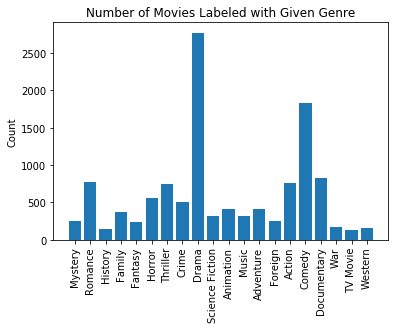

In [189]:
genres = list(unique_genres)
counts = [sum(i in c['genres'] for c in TMDB_dictionary.values()) for i in genres]
place_holder = range(len(genres))
                     
fig, axs = plt.subplots(1)
axs.bar(place_holder, counts)
plt.xticks(place_holder, genres)
axs.set_title("Number of Movies Labeled with Given Genre")
axs.set_ylabel('Count')

for label in axs.get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment("center")

plt.show()

In [241]:
genre_pairs = []
for i in range(len(genres)):
    for j in range(i+1,len(genres)):
        gen_1 = [genres[i] in c['genres'] for c in TMDB_dictionary.values()]
        gen_2 = [genres[j] in c['genres'] for c in TMDB_dictionary.values()]
        genre_pairs.append([genres[i],genres[j],sum(gen_1[l] == gen_2[l] == 1 for l in range(len(gen_2)))])
            

labels = [str(i)+str(j) for i in genres for j in genres if i != j]
counts = [i[2] for i in genre_pairs]


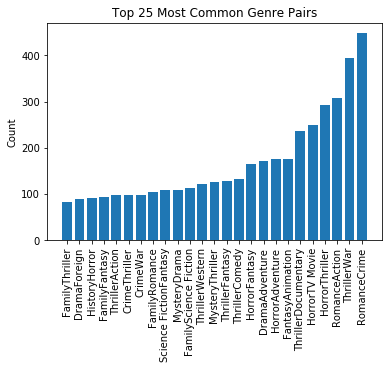

In [253]:
#find top 10
idx = np.argsort(counts)[-25:]
new_counts = [counts[i] for i in idx]
p = [labels[i] for i in idx]
place = range(len(p))
                     
fig, axs = plt.subplots(1)
axs.bar(place, new_counts)
plt.xticks(place, p)
axs.set_title("Top 25 Most Common Genre Pairs")
axs.set_ylabel('Count')

for label in axs.get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment("center")

plt.show()

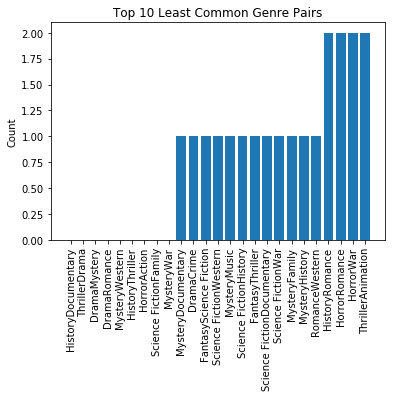

In [252]:
#find bottom 10
idx = np.argsort(counts)[:25]
new_counts = [counts[i] for i in idx]
p = [labels[i] for i in idx]
place = range(len(p))
                     
fig, axs = plt.subplots(1)
axs.bar(place, new_counts)
plt.xticks(place, p)
axs.set_title("Top 25 Least Common Genre Pairs")
axs.set_ylabel('Count')

for label in axs.get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment("center")

plt.show()